In [1]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.signal

$$\theta(x,t;k) = xk + 4k^3t$$

Below code numerically computes the two-soliton solution of the $KdV$ equation and generates the graphs of $u$

In [2]:
def theta(x, t, k):
    return (k * x + 4 * k**3 * t)

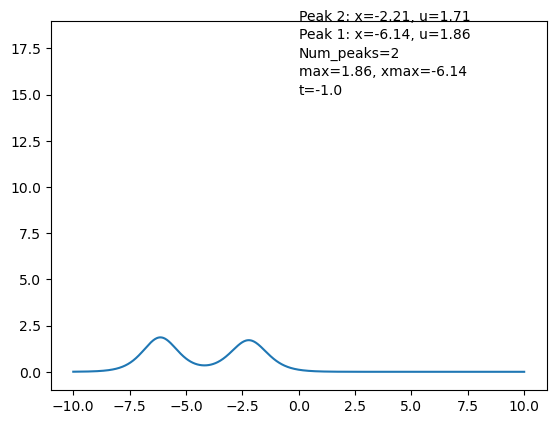

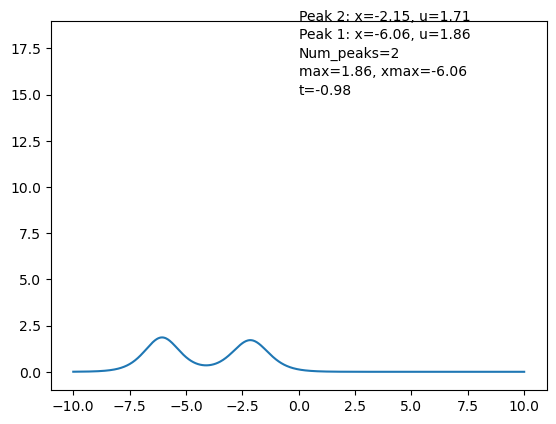

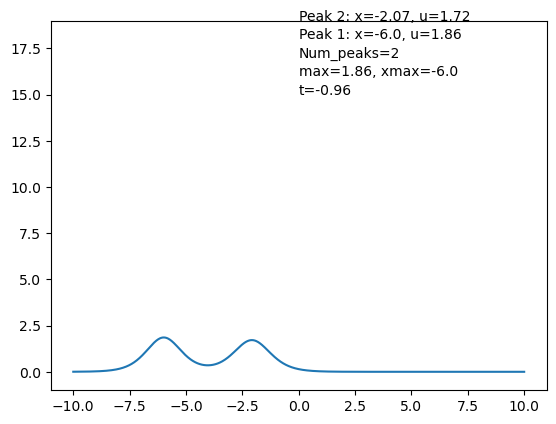

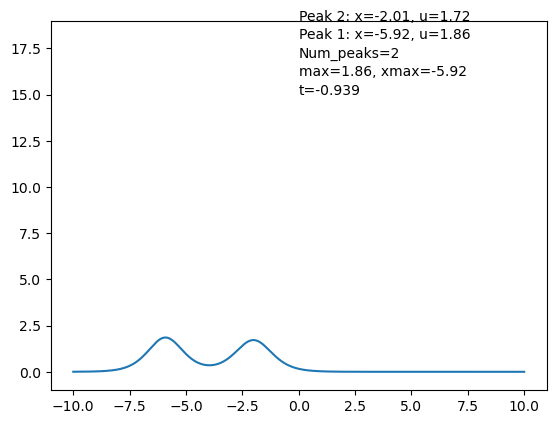

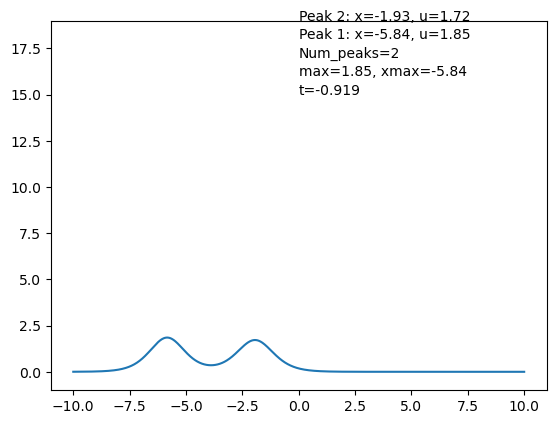

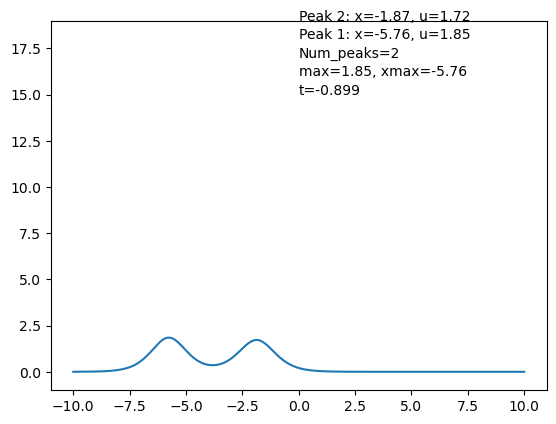

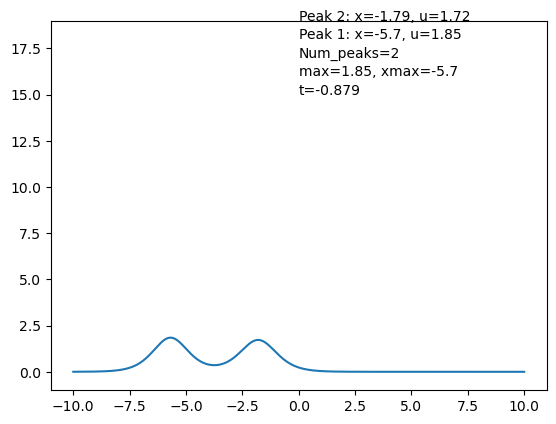

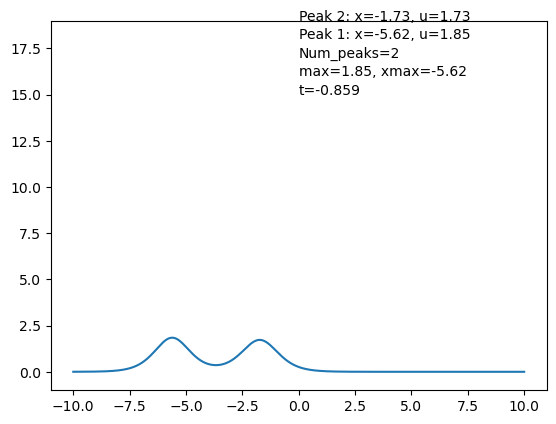

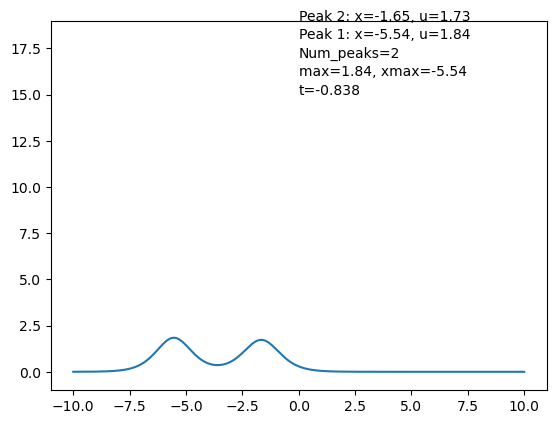

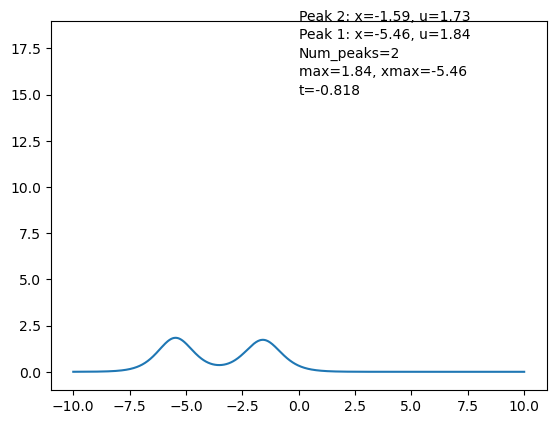

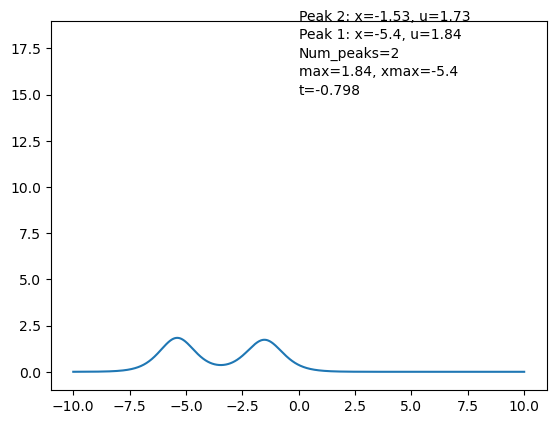

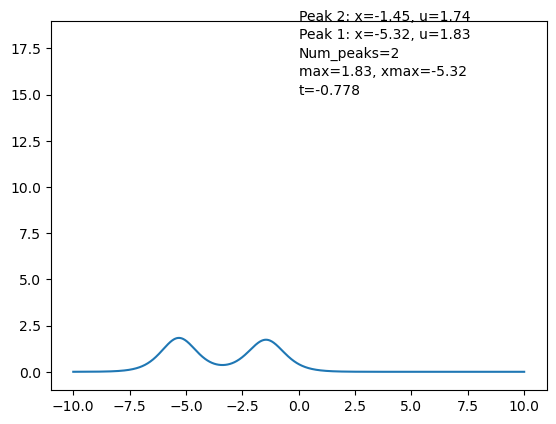

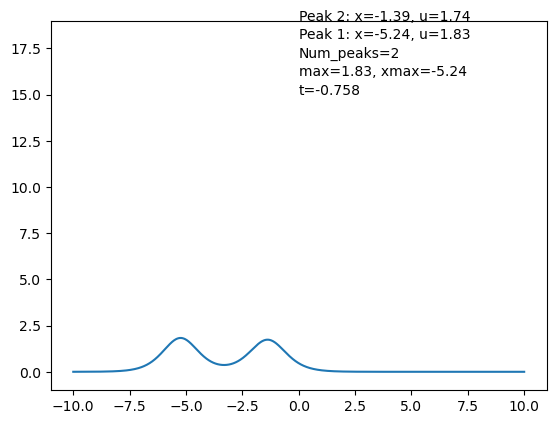

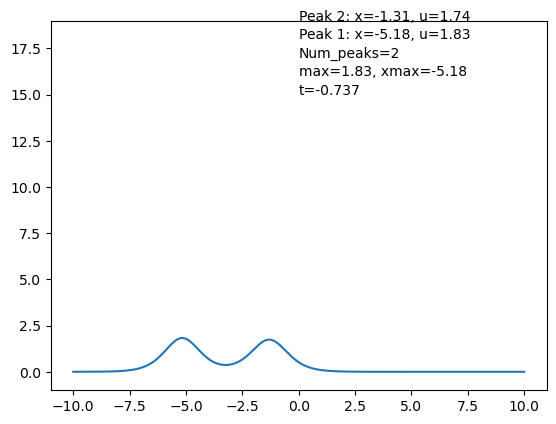

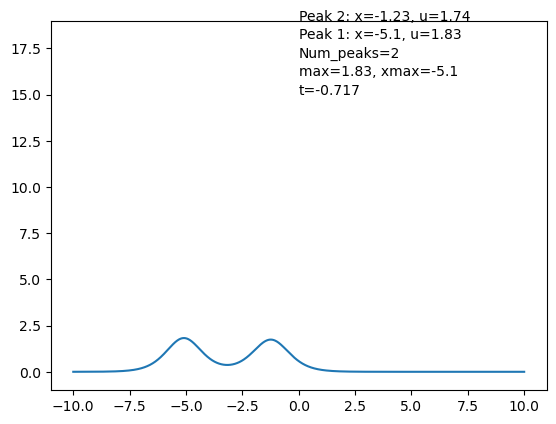

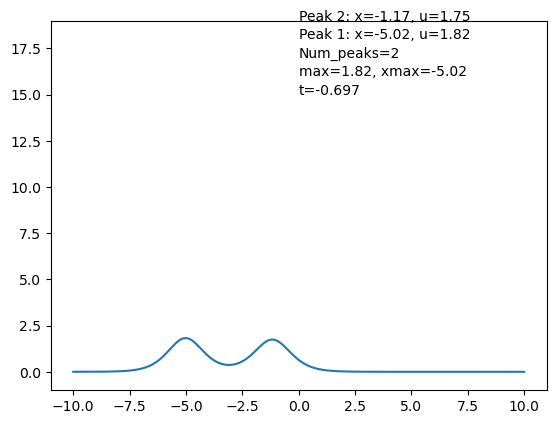

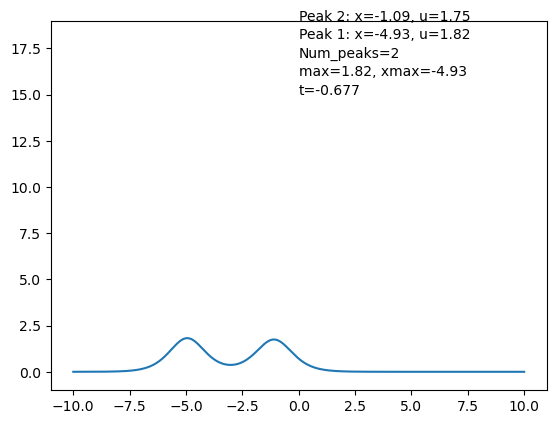

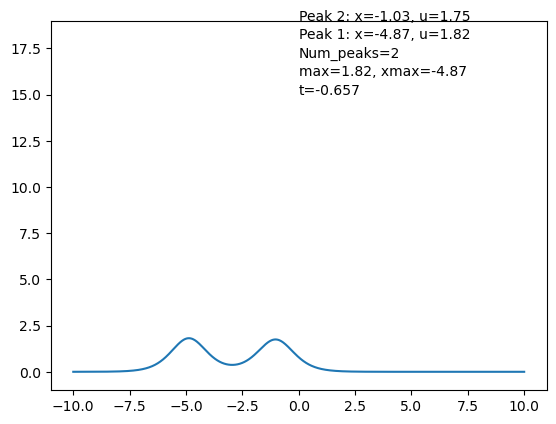

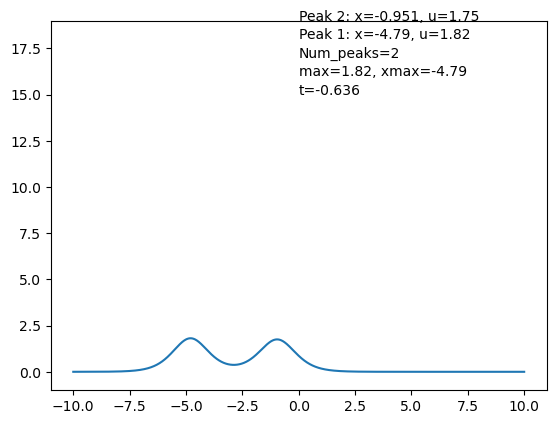

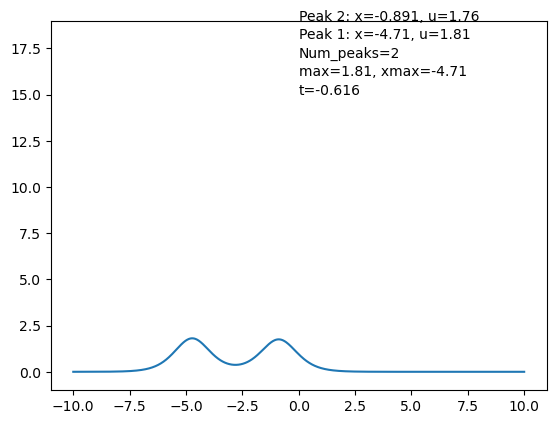

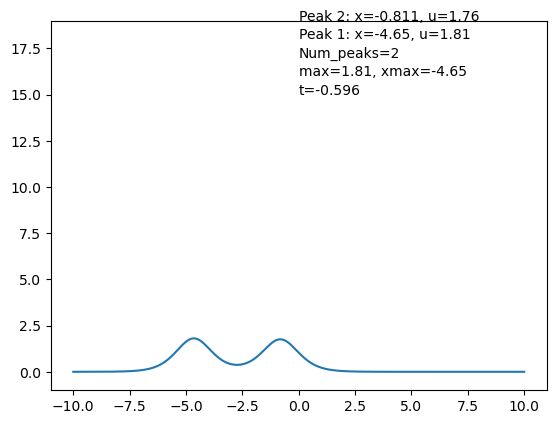

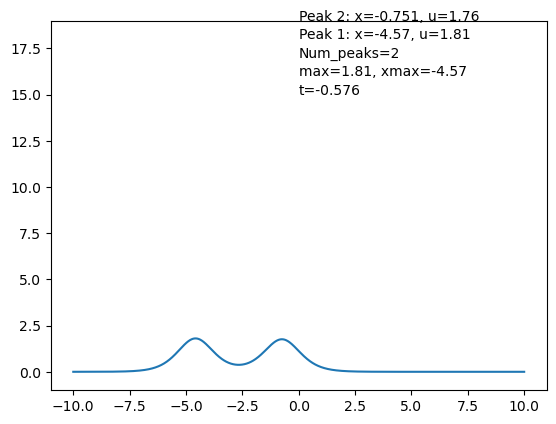

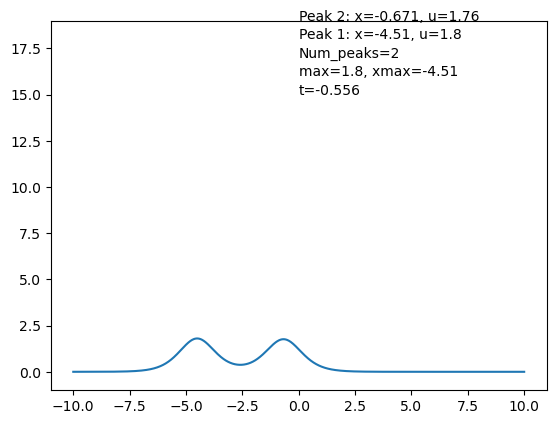

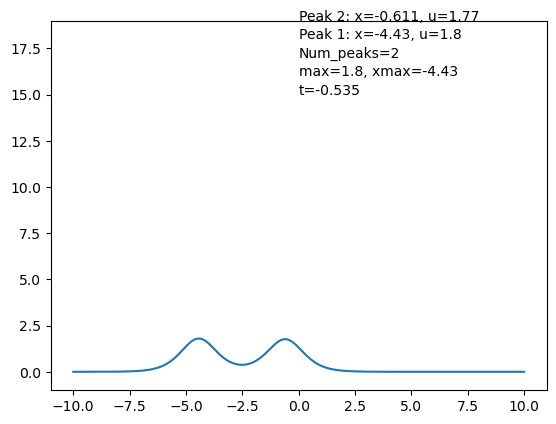

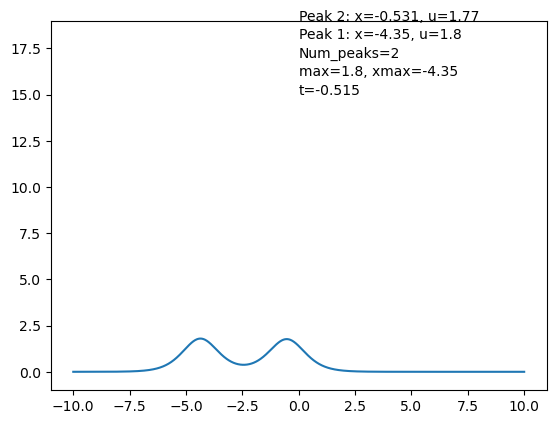

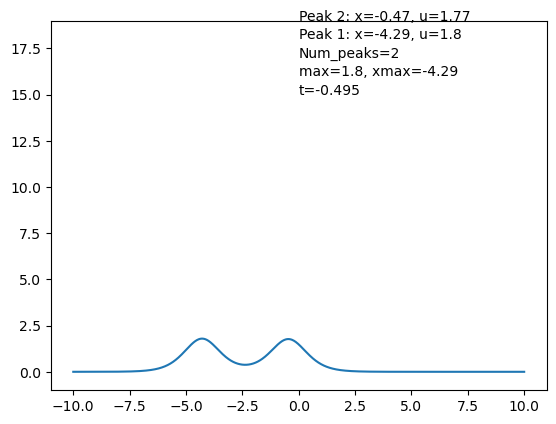

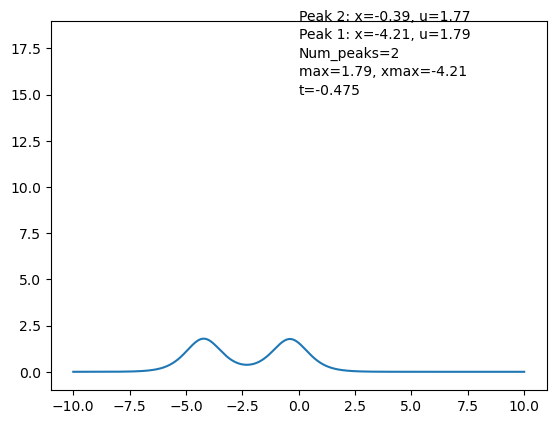

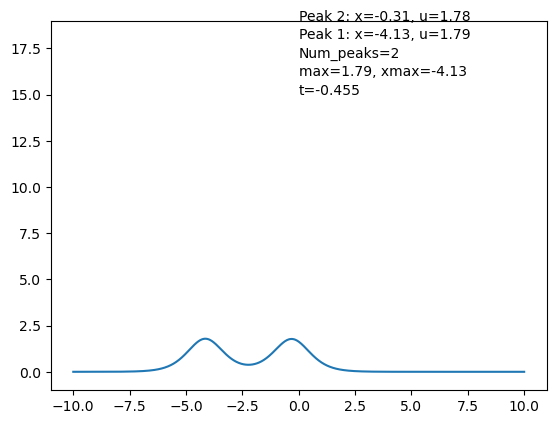

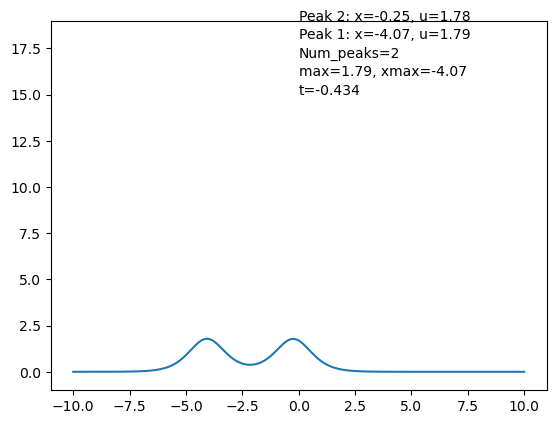

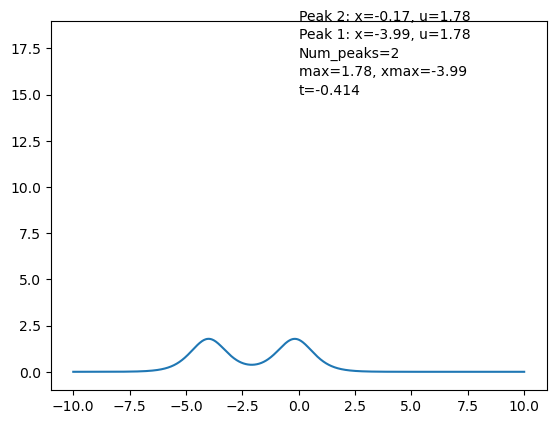

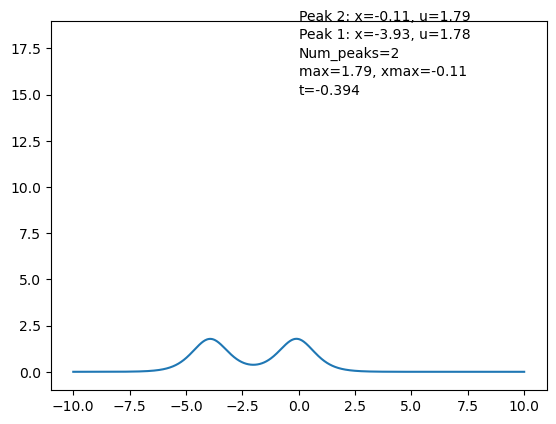

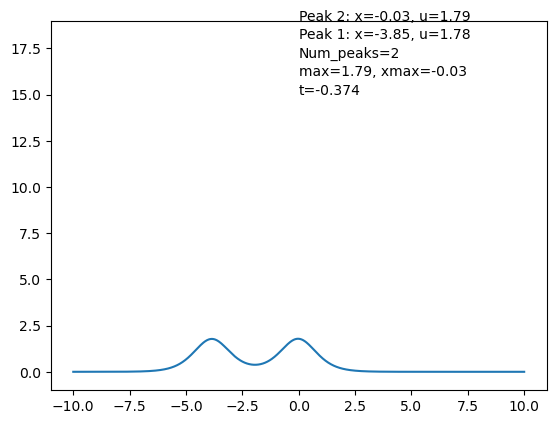

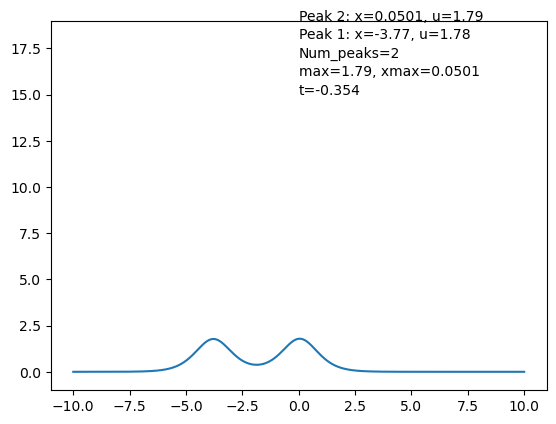

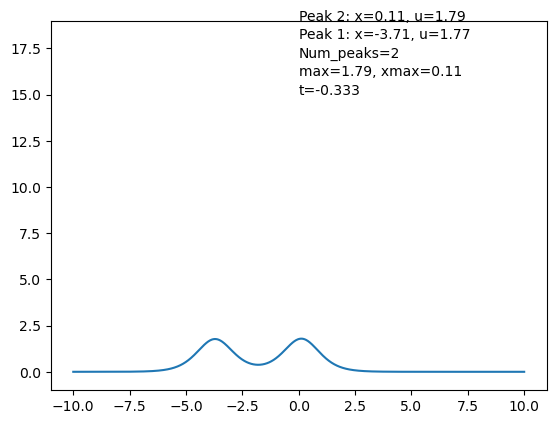

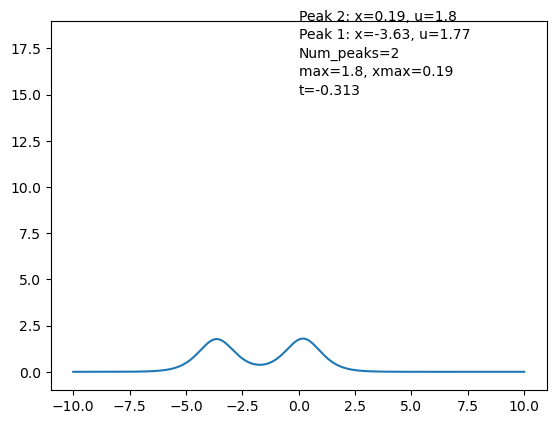

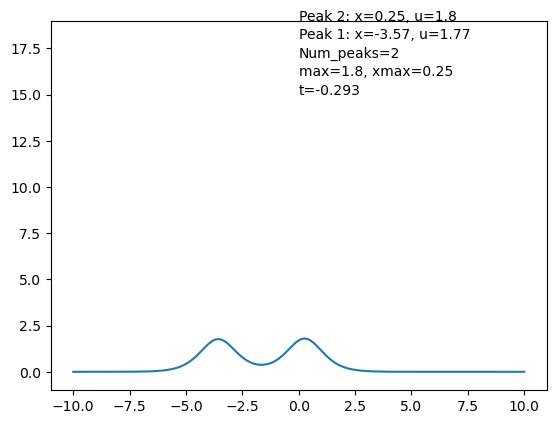

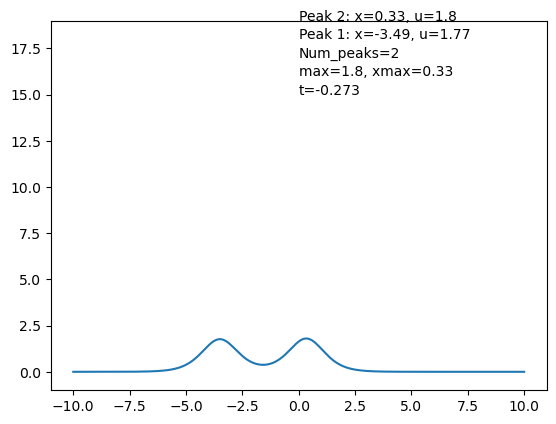

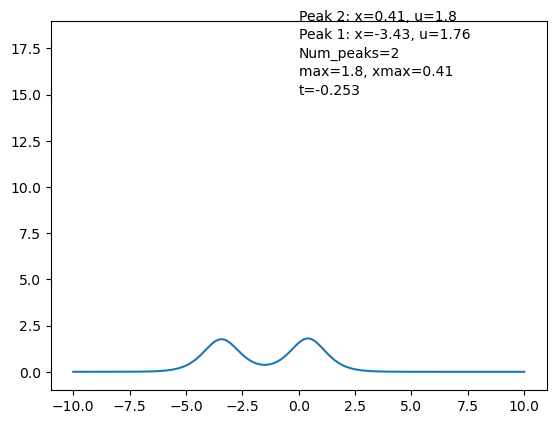

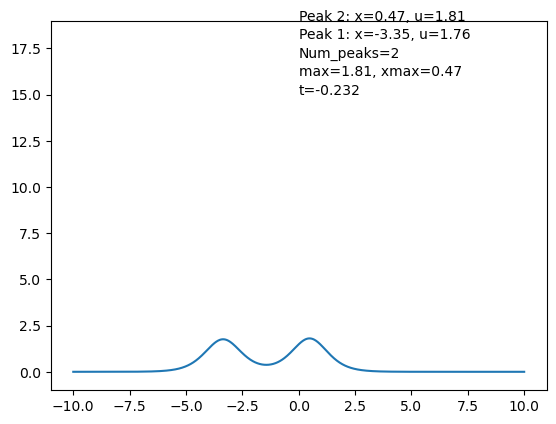

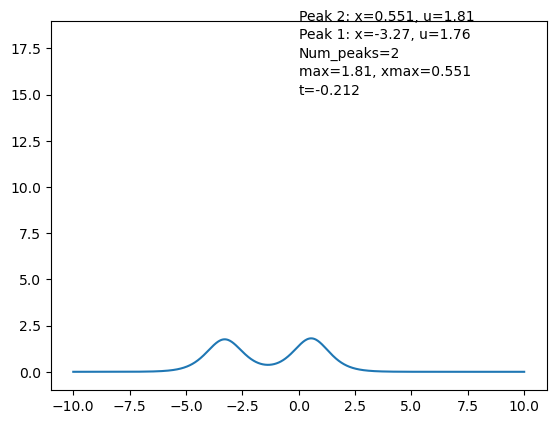

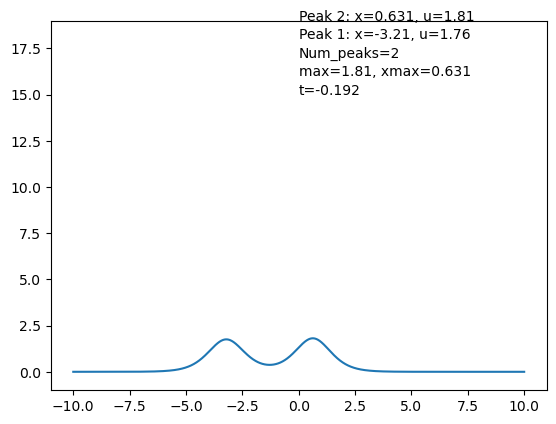

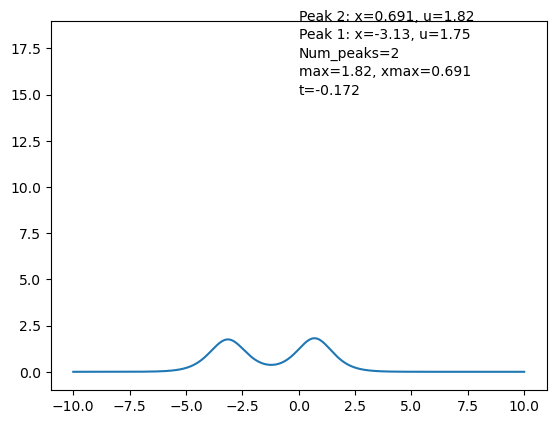

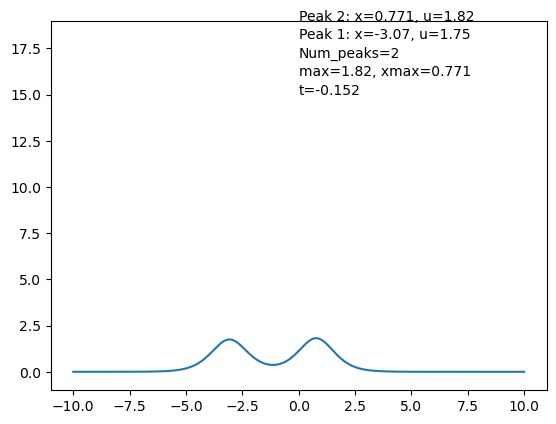

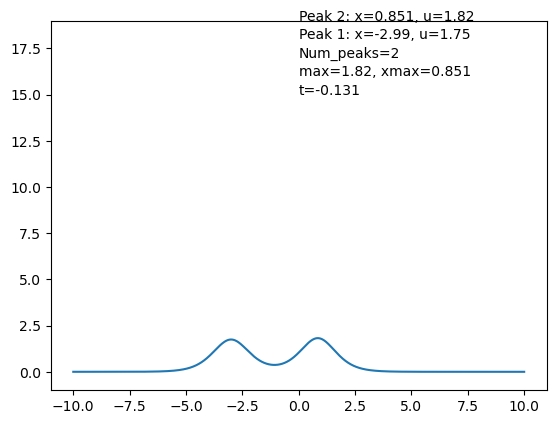

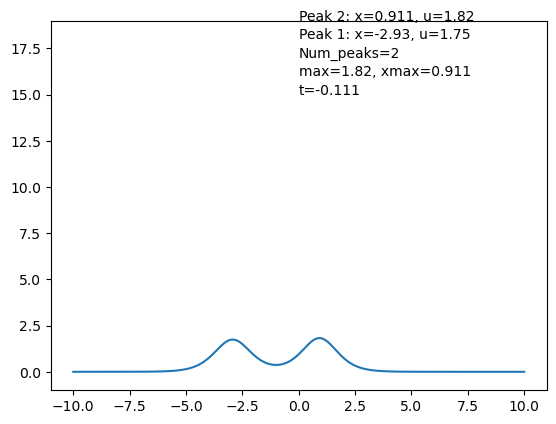

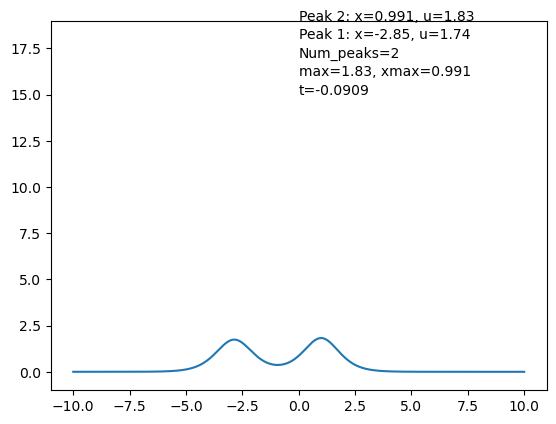

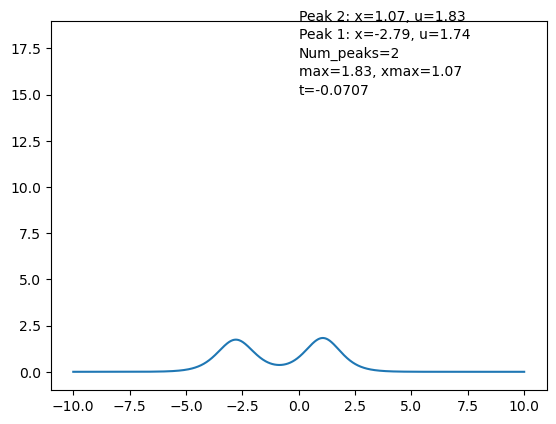

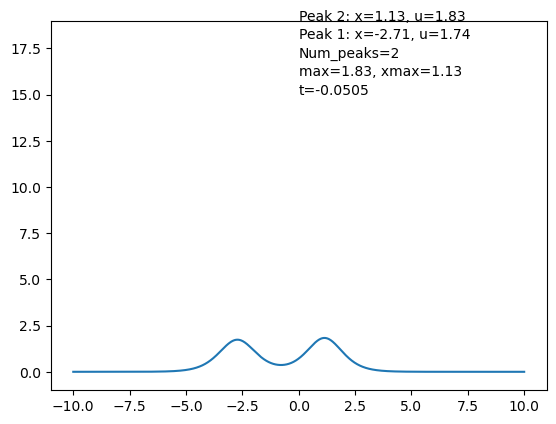

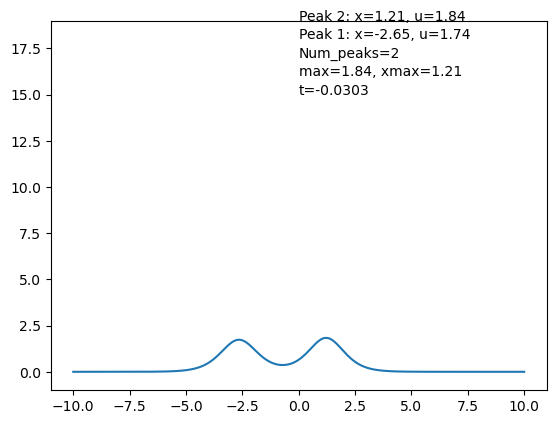

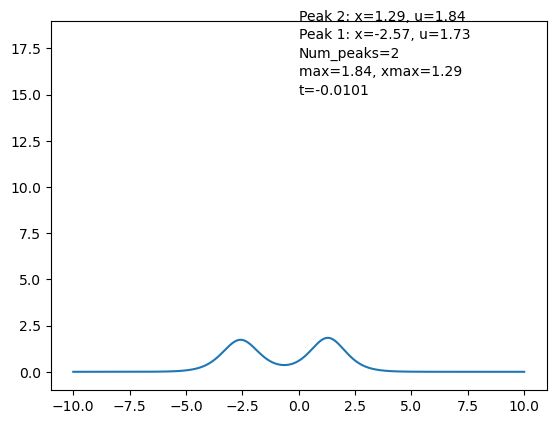

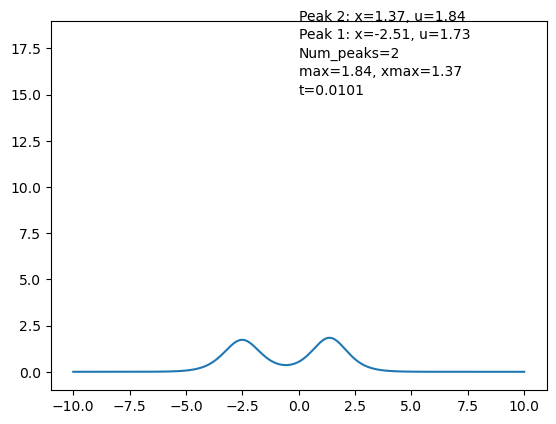

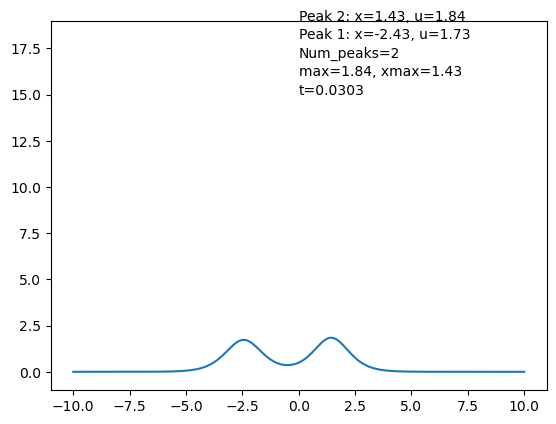

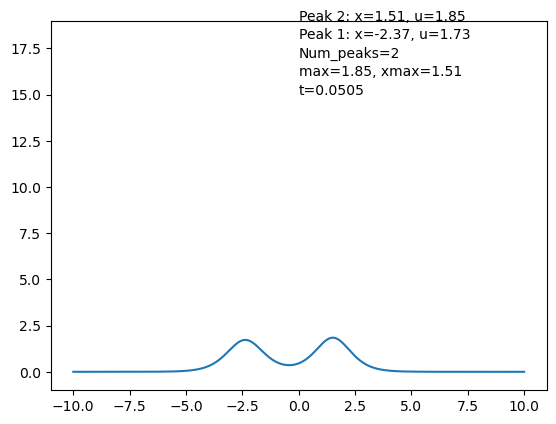

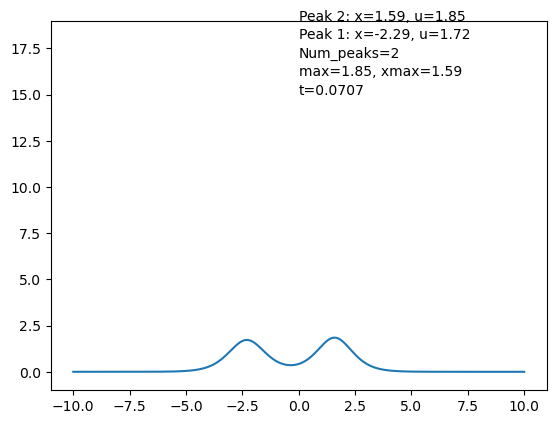

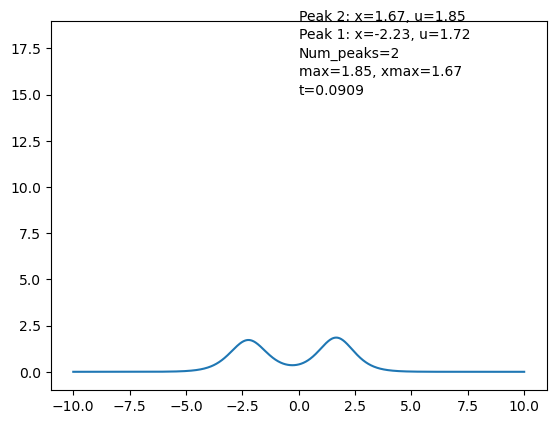

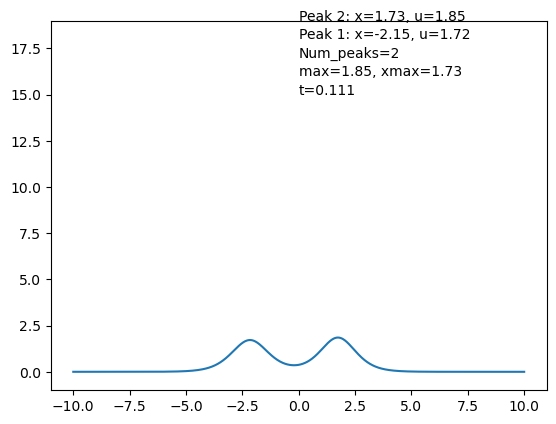

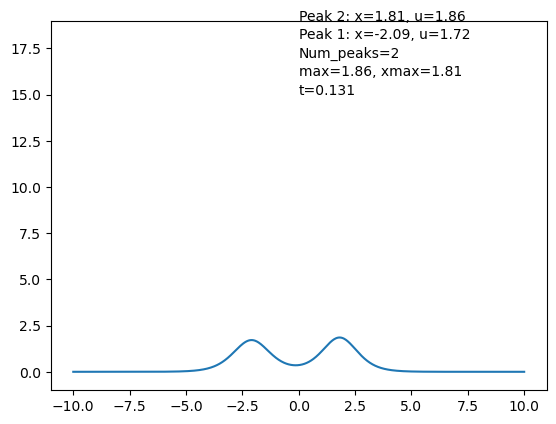

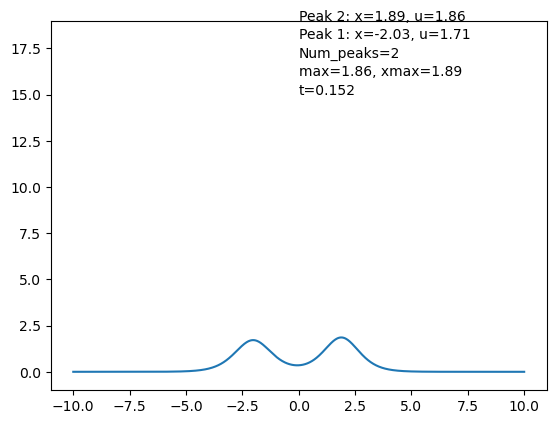

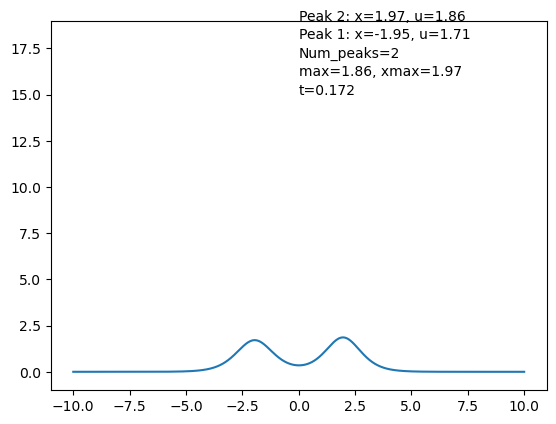

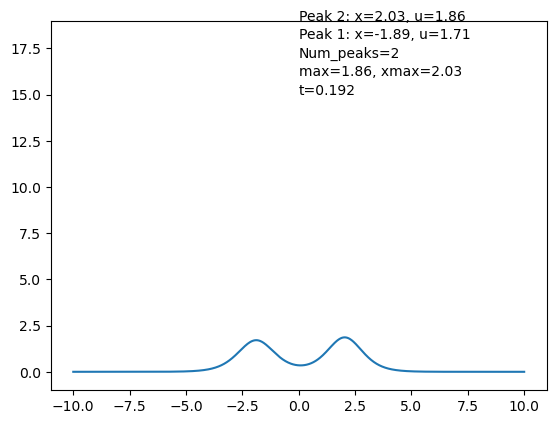

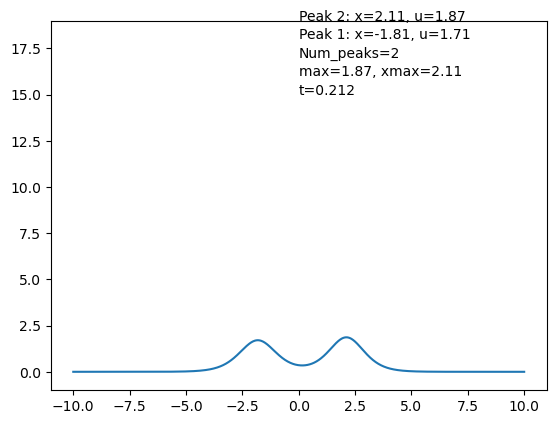

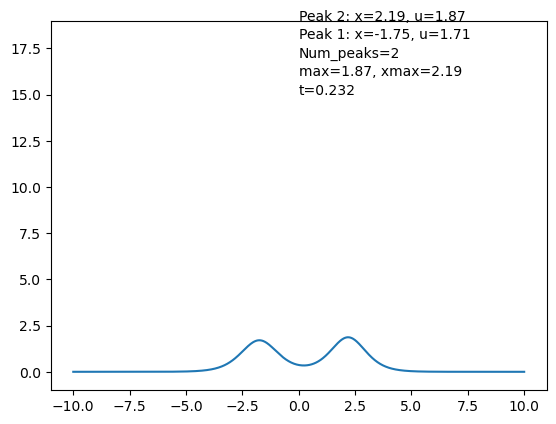

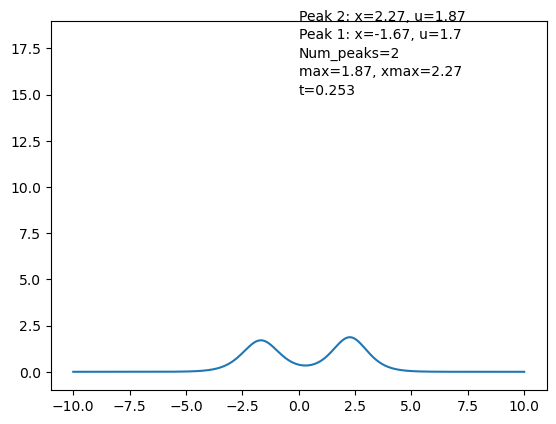

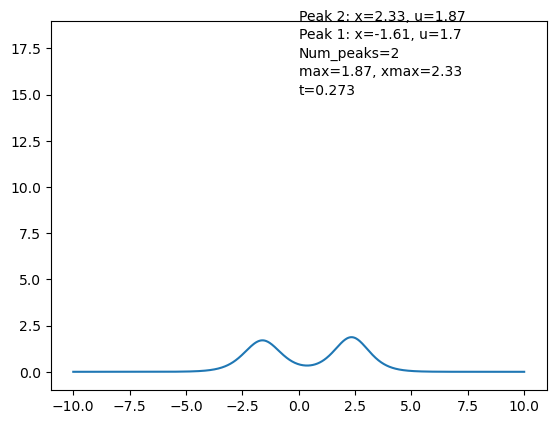

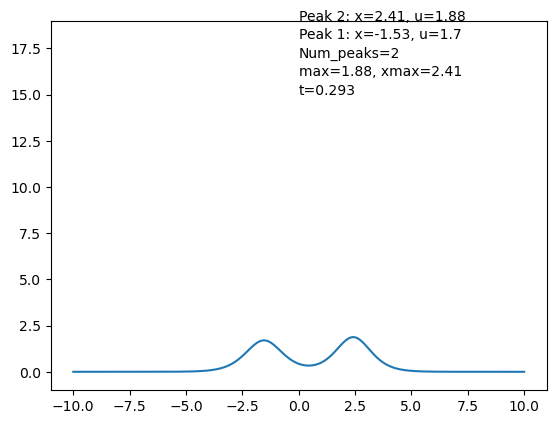

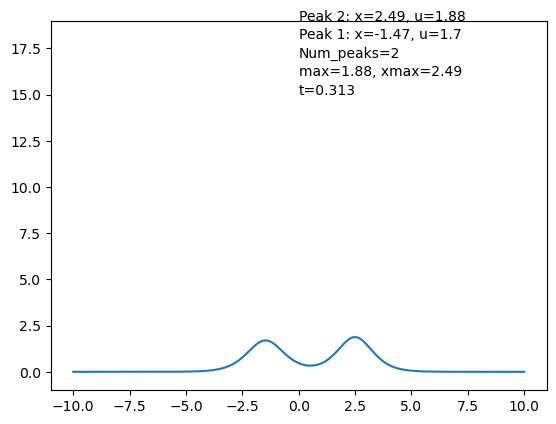

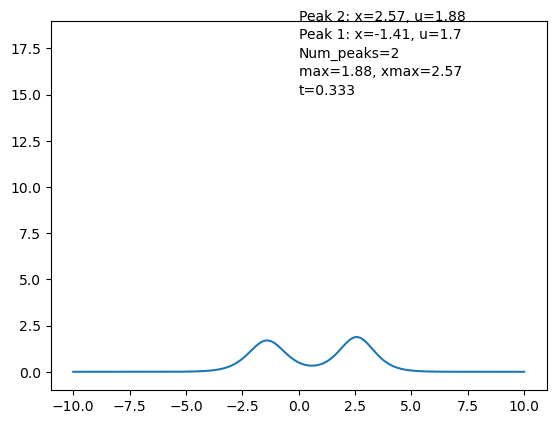

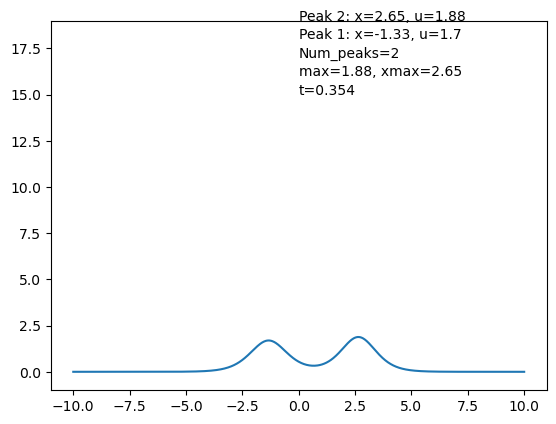

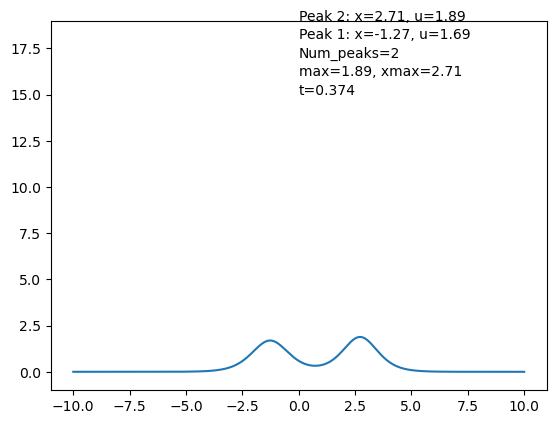

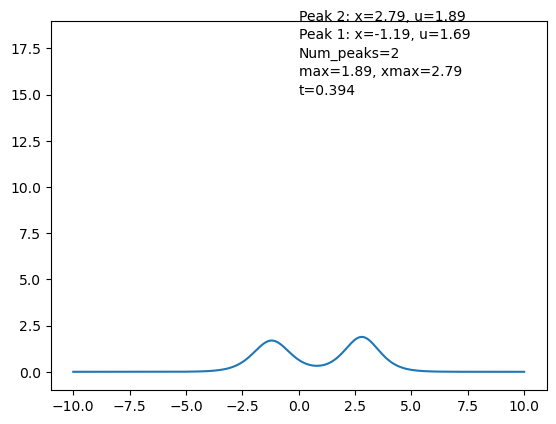

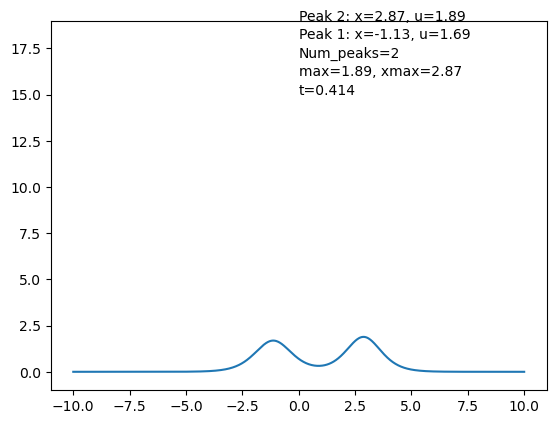

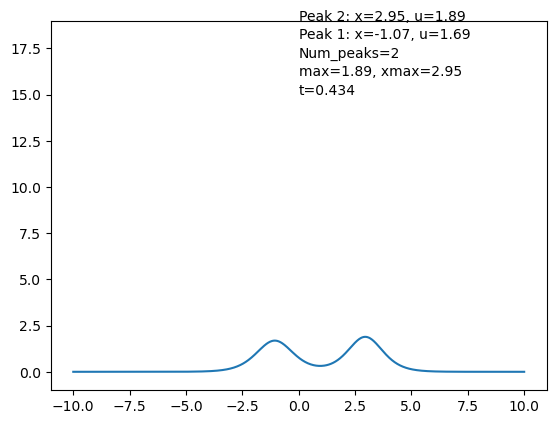

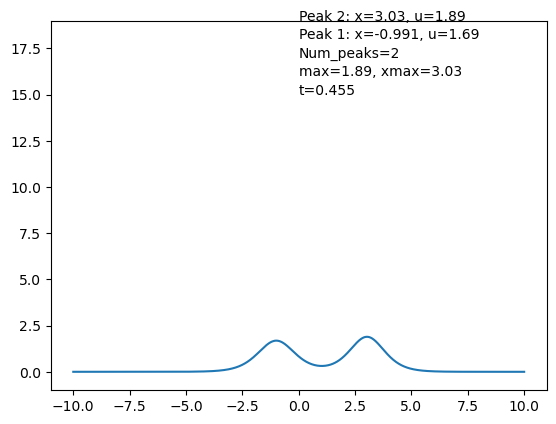

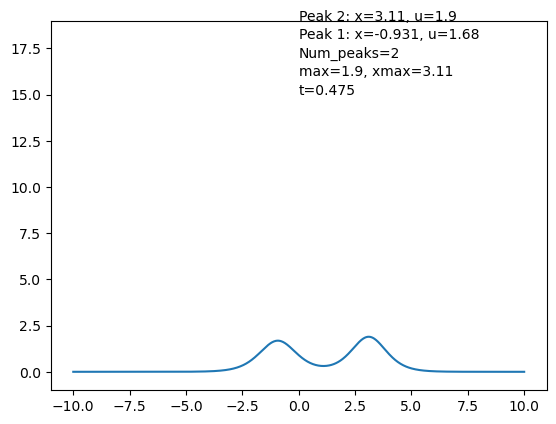

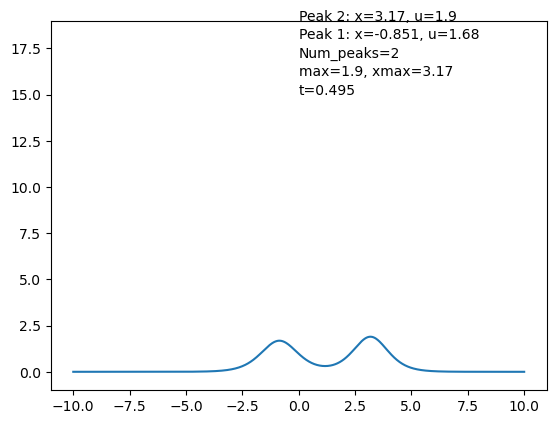

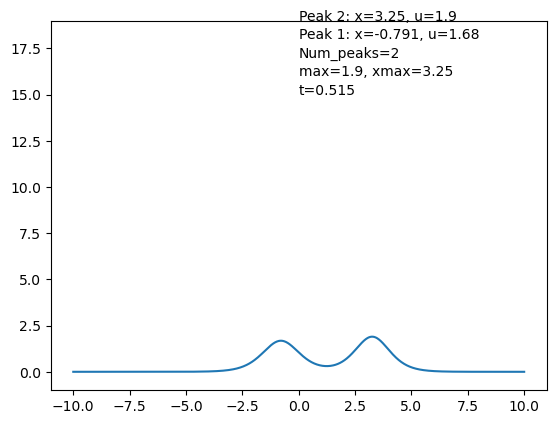

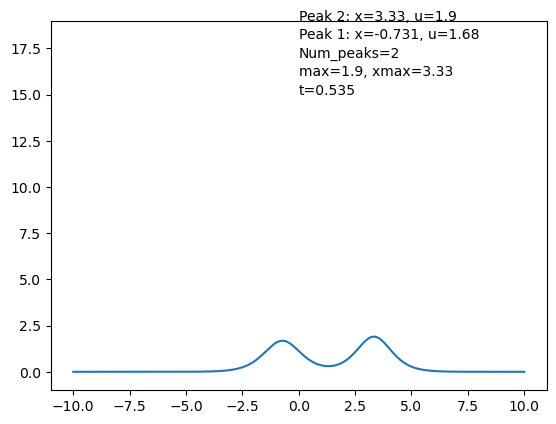

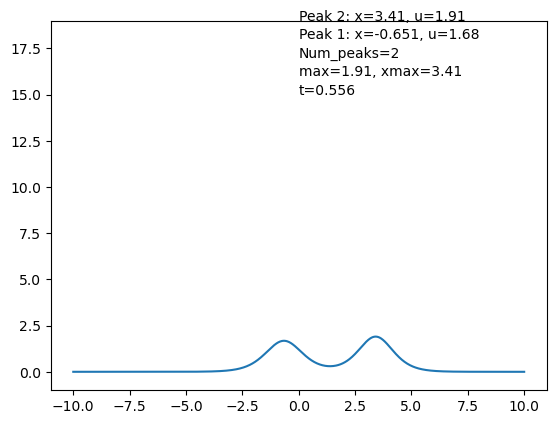

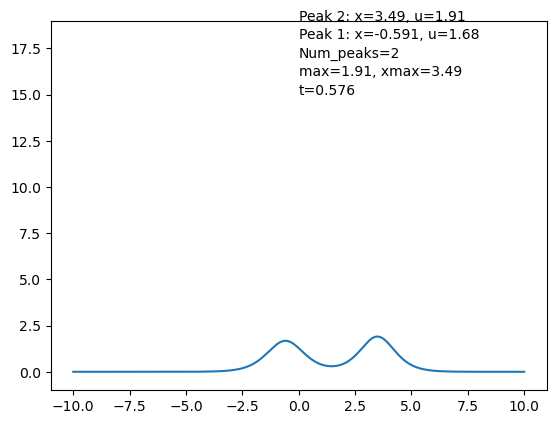

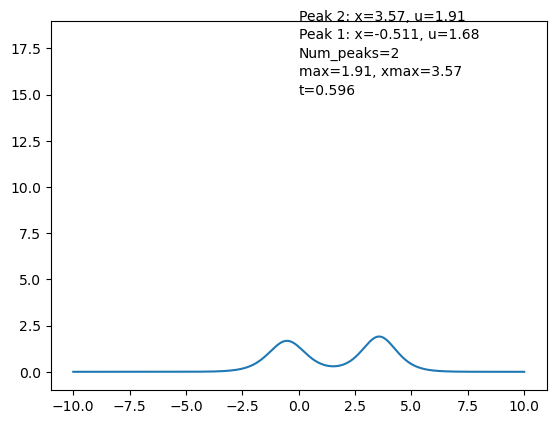

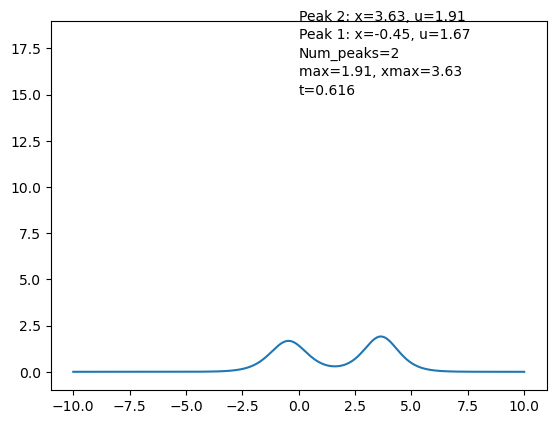

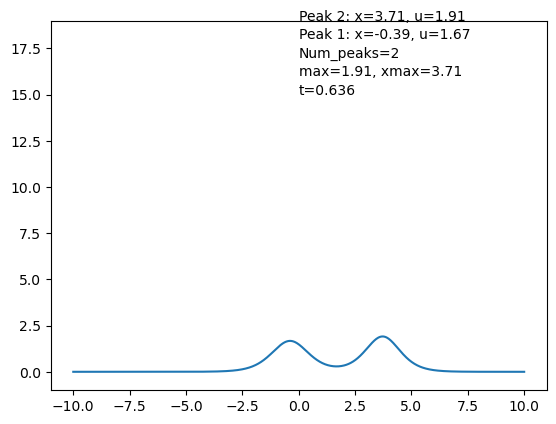

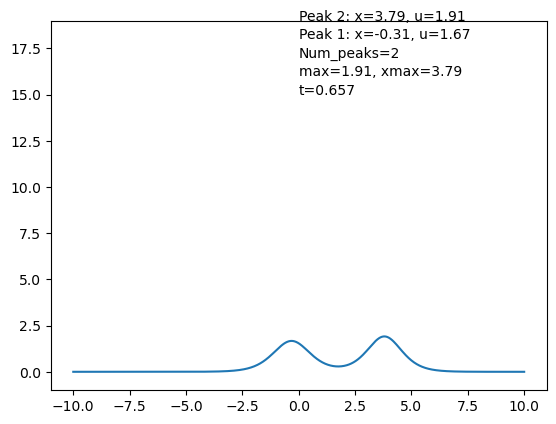

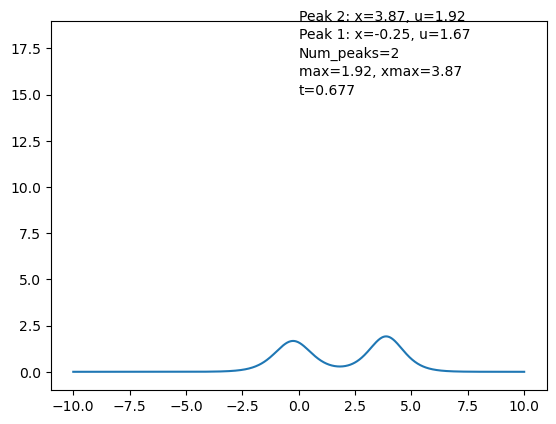

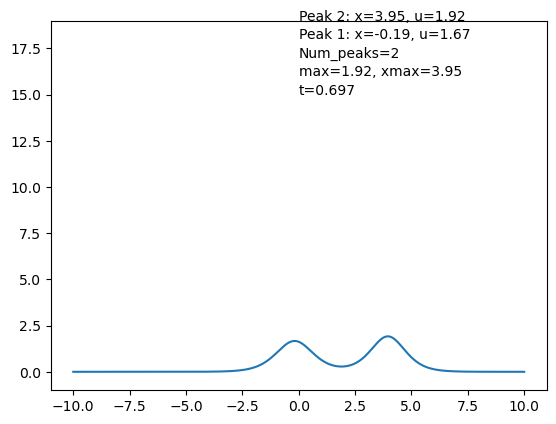

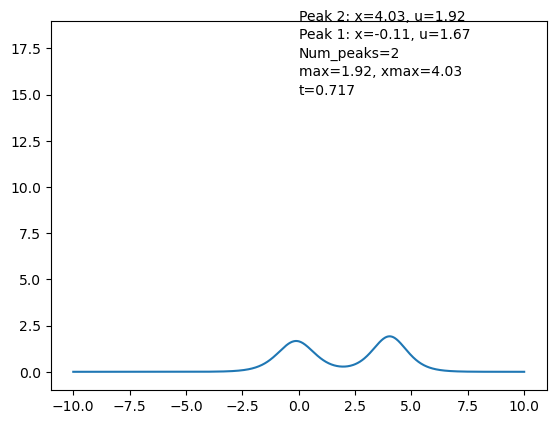

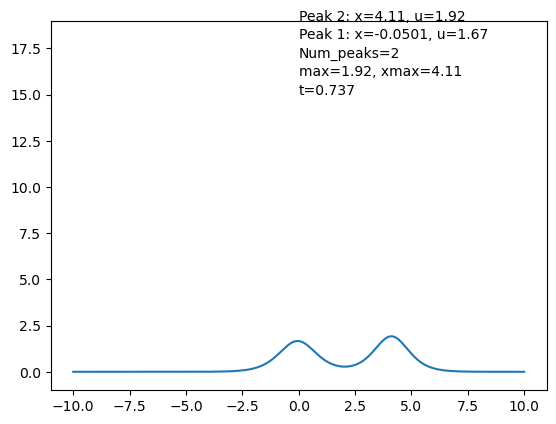

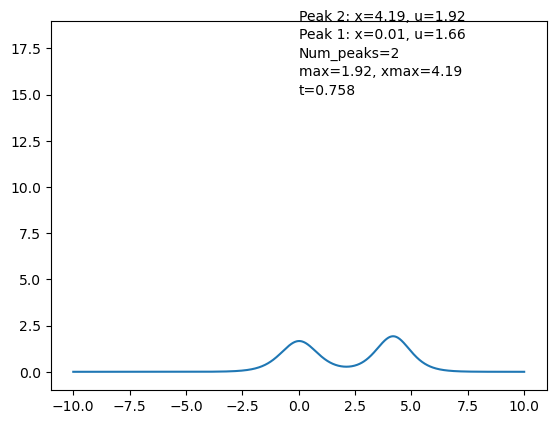

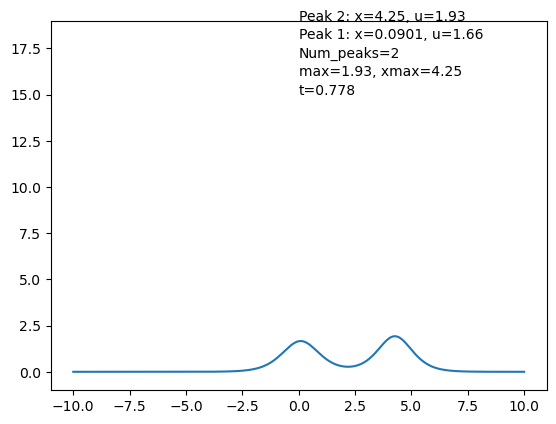

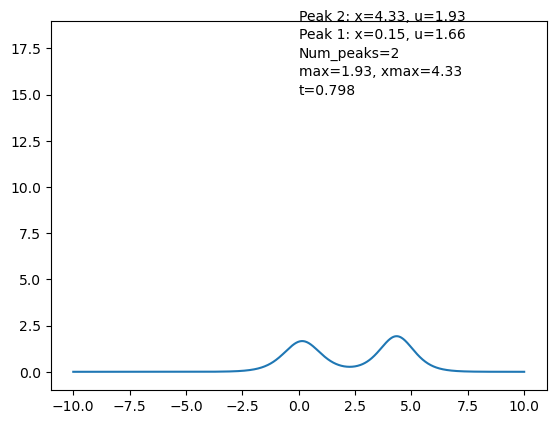

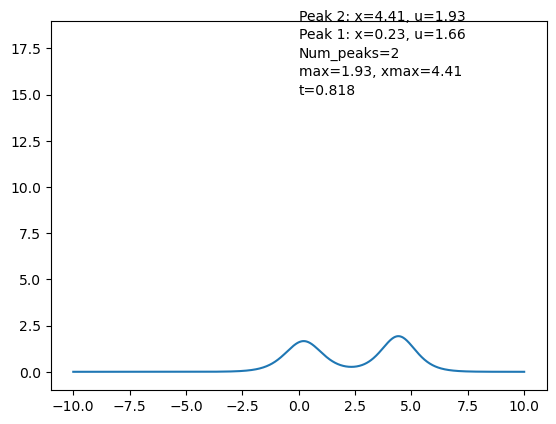

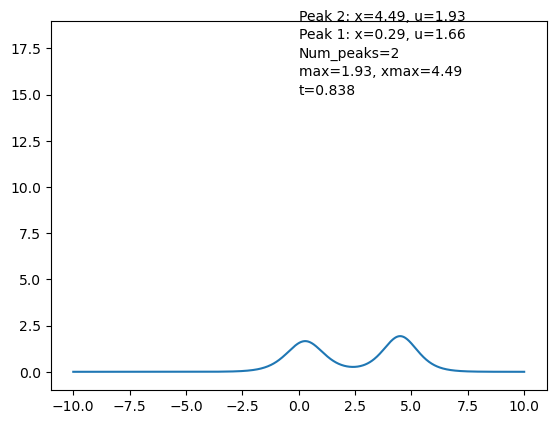

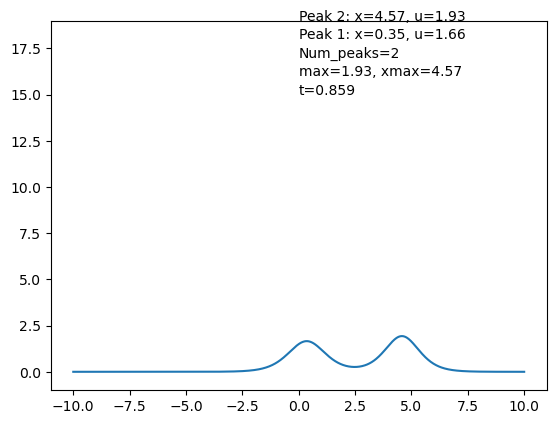

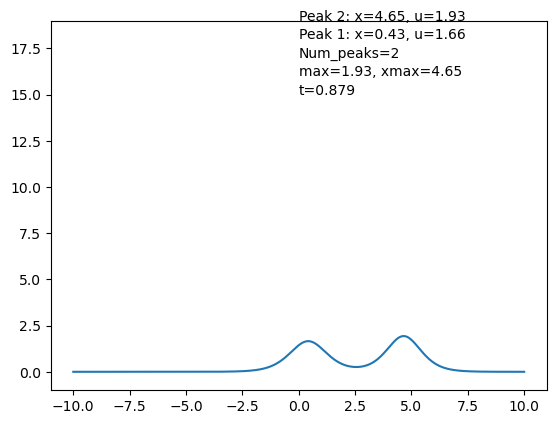

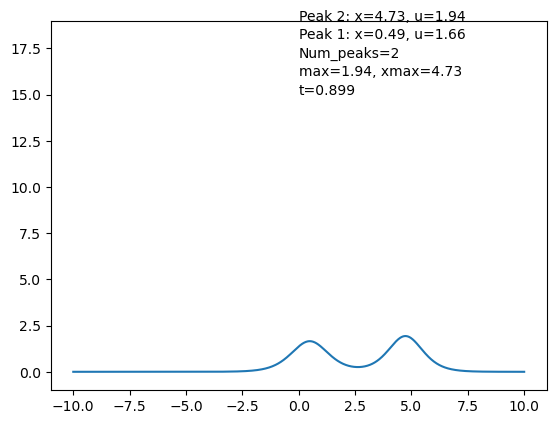

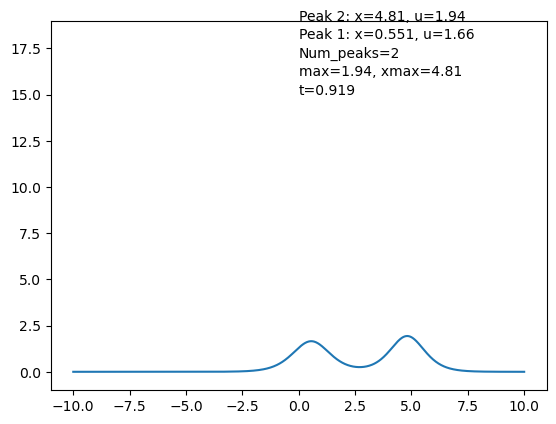

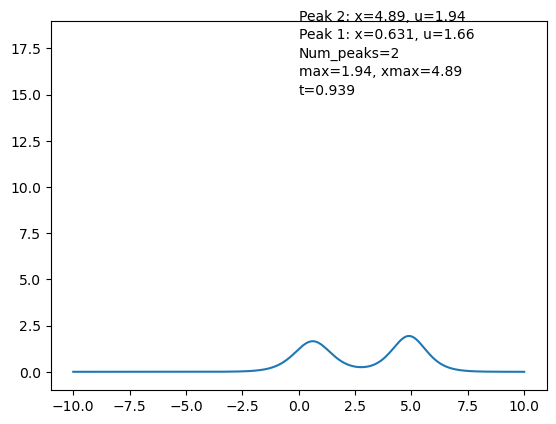

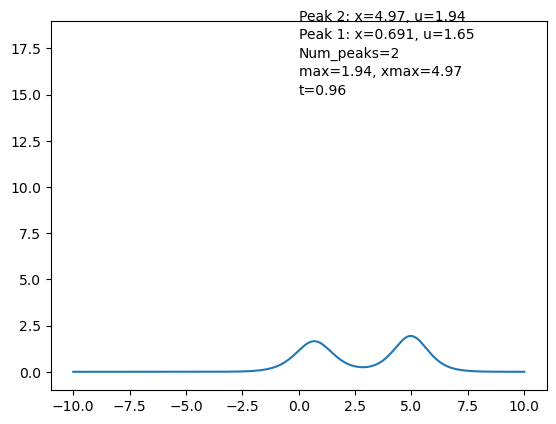

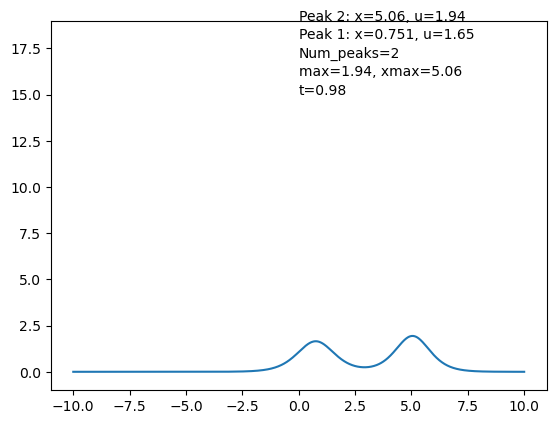

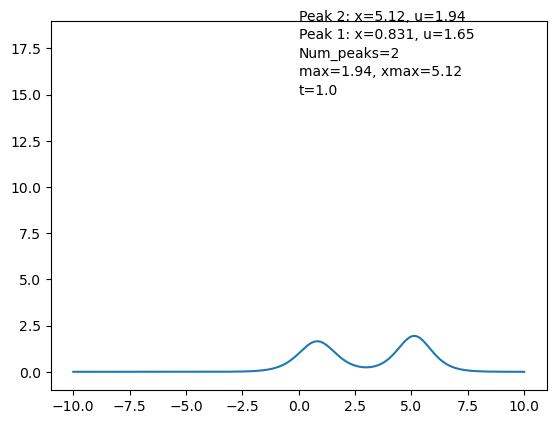

In [3]:
kappa1 = 1; gamma1 = 4;
kappa2 = 0.9; gamma2 = 3;

tarr = np.linspace(-1, 1, 100)

umaxarr = []
xmaxarr = []


Nx = 1000
xarr = np.linspace(-10, 10, Nx)
uarr = np.zeros(Nx)

for t in tarr:
    j = 0
    for x in xarr:
        matrix_size = 2

        Mat = np.zeros((2,3), dtype=float)

        theta1 = np.real(2j*theta(x, t, 1j*kappa1))
        if ( theta1 <= 0):
            exp1 = np.exp(theta1)
            Mat[0][0] = 1 + exp1 * gamma1**2 / (2*kappa1)
            Mat[0][1] = exp1 * gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2 * exp1
        else:
            exp1 = np.exp(-theta1)
            Mat[0][0] = exp1 + gamma1**2 / (2*kappa1)
            Mat[0][1] = gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2

        theta2 = np.real(2j*theta(x, t, 1j*kappa2))
        if (theta2 <= 0):
            exp2 = np.exp(theta2)
            Mat[1][0] = exp2 * gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = 1 + exp2 * gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2 * exp2
        else:
            exp2 = np.exp(-theta2)
            Mat[1][0] = gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = exp2 + gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2
    
        alphas = np.linalg.solve(Mat[:, :2], Mat[:, 2])
        alphas

        u = 4 * (alphas[0] * kappa1 + alphas[1] * kappa2) - 2 * (alphas[0] + alphas[1])**2
        uarr[j] = u
        j += 1
    plt.plot(xarr, uarr)    
    plt.ylim((-1, 19))
    
    
    umax = np.max(uarr)
    xmax = xarr[np.argmax(uarr)]
    peaks = scipy.signal.find_peaks(uarr)
    Npeaks = peaks[0].size

    
    plt.text(0, 15, "t={:.3}".format(t))
    plt.text(0, 16, "max={:.3}, xmax={:.3}".format(umax, xmax))
    plt.text(0, 17, "Num_peaks={}".format(Npeaks))
    for i in range(Npeaks):
        index = peaks[0][i]
        plt.text(0, 18+i, "Peak {}: x={:.3}, u={:.3}".format(i + 1, xarr[index], uarr[index]))

    
    plt.show()

    umaxarr.append(np.max(uarr))
    xmaxarr.append(xarr[np.argmax(uarr)])
    
    #print(u, exp1, exp2, alphas, theta1, theta2)

In [32]:
umaxarr = np.array(umaxarr)
xmaxarr = np.array(xmaxarr)

np.min(umaxarr), np.max(umaxarr)

(np.float64(1.3897070791762116), np.float64(1.9428217487026371))

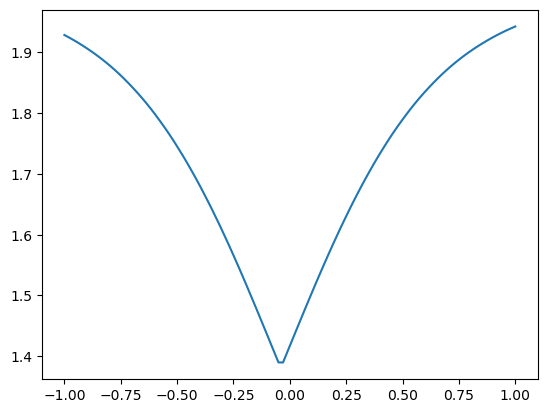

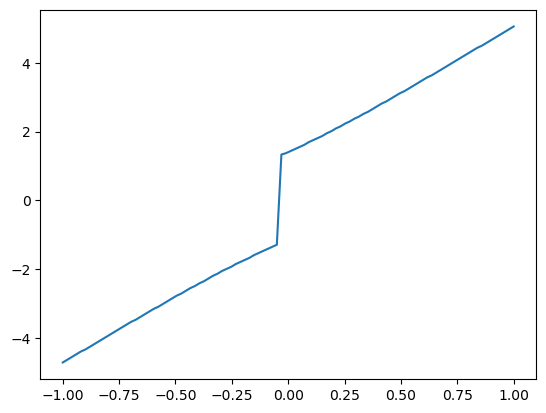

In [33]:
plt.plot(tarr, umaxarr)
plt.show()

plt.plot(tarr, xmaxarr)

In [42]:
np.max(xmaxarr[1:] - xmaxarr[:-1])

np.float64(0.8208208208208205)

In [43]:
xmaxarr

array([-4.07407407, -3.99399399, -3.91391391, -3.85385385, -3.77377377,
       -3.71371371, -3.63363363, -3.55355355, -3.49349349, -3.41341341,
       -3.33333333, -3.27327327, -3.19319319, -3.13313313, -3.05305305,
       -2.97297297, -2.91291291, -2.83283283, -2.75275275, -2.69269269,
       -2.61261261, -2.53253253, -2.47247247, -2.39239239, -2.33233233,
       -2.25225225, -2.17217217, -2.11211211, -2.03203203, -1.95195195,
       -1.89189189, -1.81181181, -1.75175175, -1.67167167, -1.59159159,
       -1.53153153, -1.45145145, -1.39139139, -1.31131131, -1.25125125,
       -1.17117117, -1.11111111, -1.03103103, -0.97097097, -0.89089089,
       -0.83083083, -0.75075075, -0.69069069, -0.63063063, -0.57057057,
       -0.49049049, -0.43043043, -0.39039039, -0.33033033,  0.49049049,
        0.55055055,  0.61061061,  0.67067067,  0.73073073,  0.79079079,
        0.87087087,  0.93093093,  1.01101101,  1.07107107,  1.13113113,
        1.21121121,  1.27127127,  1.35135135,  1.43143143,  1.49

In [44]:
for j in range(xmaxarr.size - 1):
    print(xmaxarr[j+1] - xmaxarr[j])

0.08008008008008005
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.08008008008008094
0.06006006006006004
0.08008008008008005
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.08008008008008094
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.08008008008008005
0.06006006006006004
0.06006006006006004
0.06006006006006004
0.08008008008008005


In [45]:
print(xmaxarr[1])

-3.9939939939939944


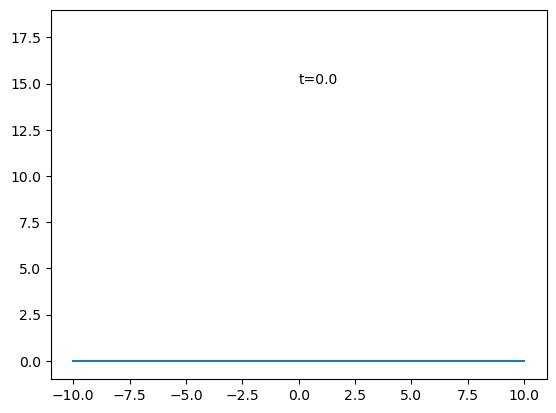

In [2]:
import numpy as np
import matplotlib.pyplot as plt

kappa1 = 3; gamma1 = 3;
kappa2 = 2; gamma2 = 4;

Nx = 1000
xarr = np.linspace(-10, 10, Nx)
uarr = np.zeros(Nx)

def theta(x, t, k):
    return (k * x + 4 * k**3 * t)

j = 0
t = 0.0
for x in xarr:
        matrix_size = 2

        Mat = np.zeros((2,3), dtype=float)

        theta1 = np.real(2j*theta(x, -0.2, 1j*kappa1))
        if ( theta1 <= 0):
            exp1 = np.exp(theta1)
            Mat[0][0] = 1 + exp1 * gamma1**2 / (2*kappa1)
            Mat[0][1] = exp1 * gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2 * exp1
        else:
            exp1 = np.exp(-theta1)
            Mat[0][0] = exp1 + gamma1**2 / (2*kappa1)
            Mat[0][1] = gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2

        theta2 = np.real(2j*theta(x, -0.2, 1j*kappa2))
        if (theta2 <= 0):
            exp2 = np.exp(theta2)
            Mat[1][0] = exp2 * gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = 1 + exp2 * gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2 * exp2
        else:
            exp2 = np.exp(-theta2)
            Mat[1][0] = gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = exp2 + gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2
    
        alphas = np.linalg.solve(Mat[:, :2], Mat[:, 2])
        alphas

        u = 4 * (alphas[0] * kappa1 + alphas[1] * kappa2) - 2 * (alphas[0] + alphas[1])**2
        uarr[j] = u
plt.plot(xarr, uarr)    
plt.ylim((-1, 19))
plt.text(0, 15, "t={:.3}".format(t))
plt.show()


In [7]:
np.max(uarr)

np.float64(12.711897735911116)

In [5]:
np.log(gamma1**2 / (2*kappa1))

np.float64(3.949763333410993)

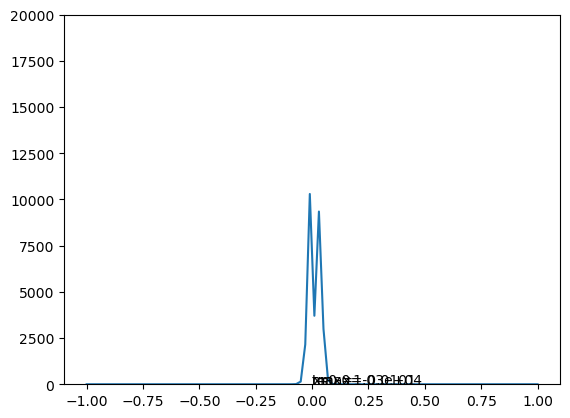

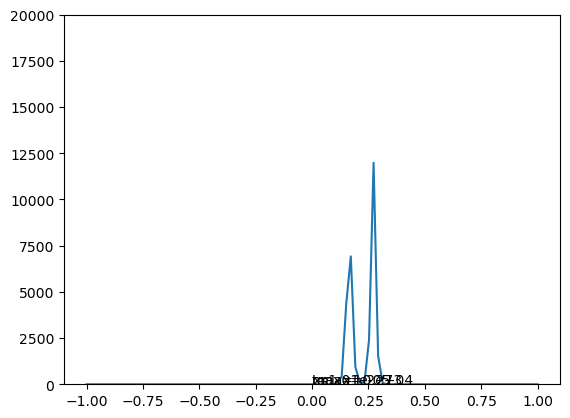

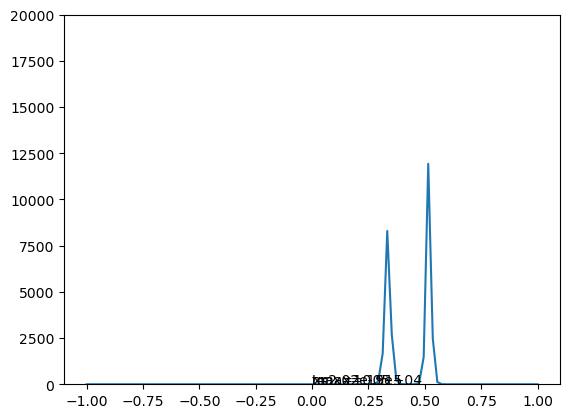

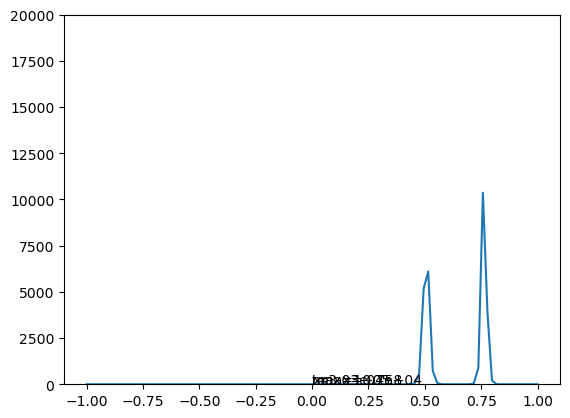

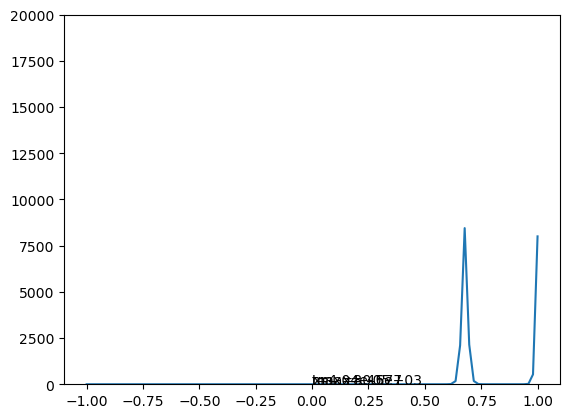

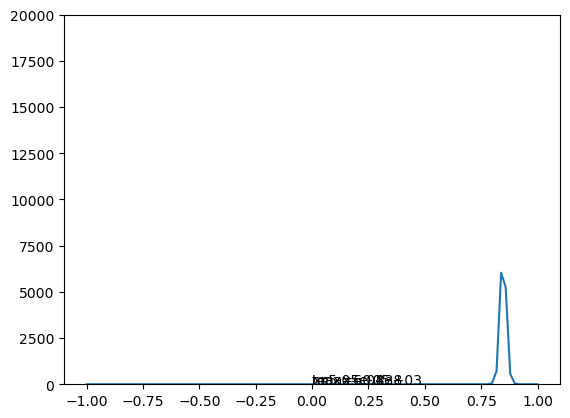

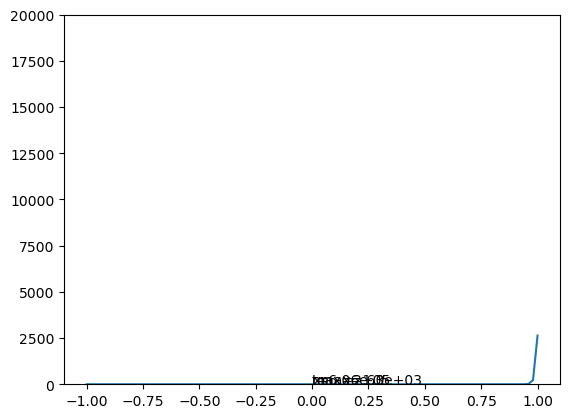

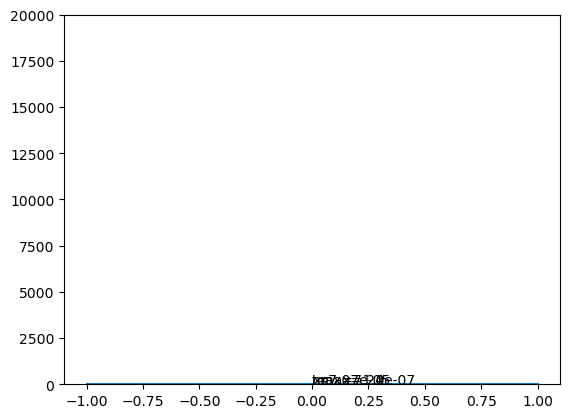

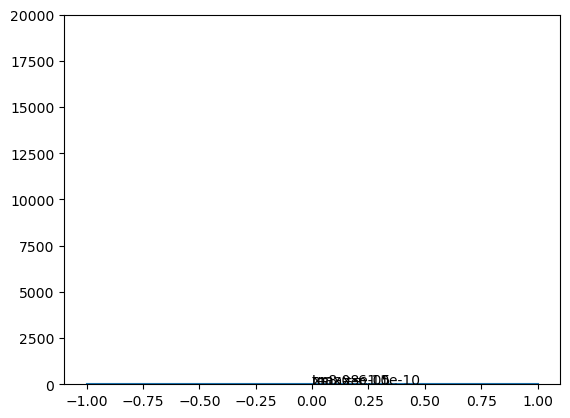

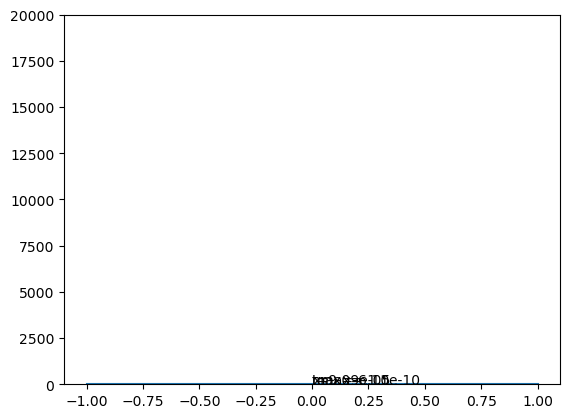

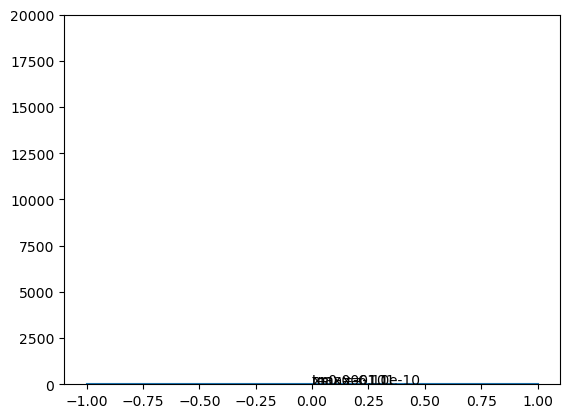

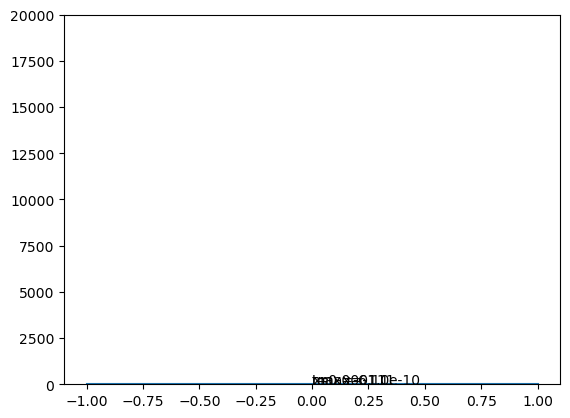

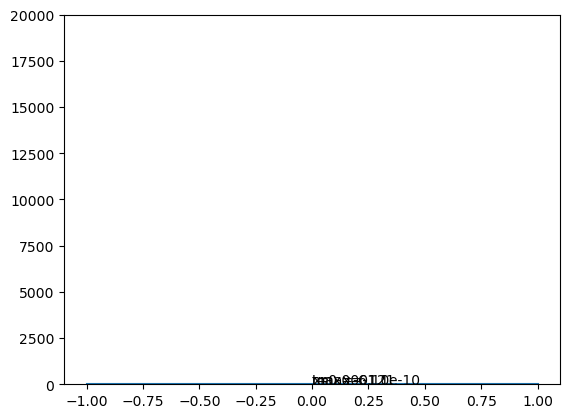

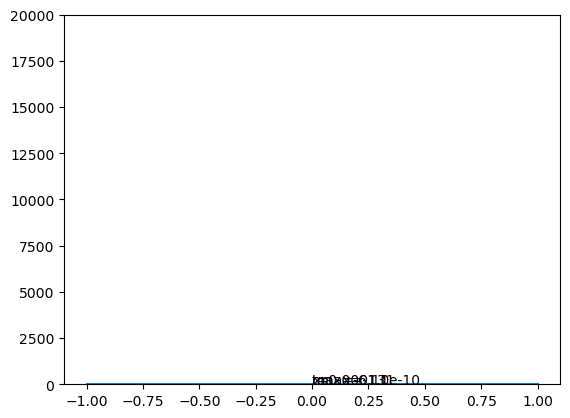

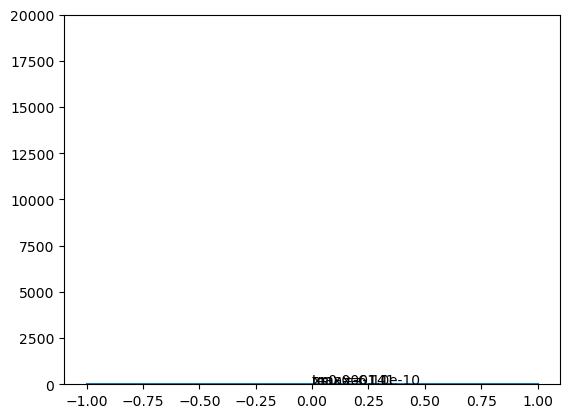

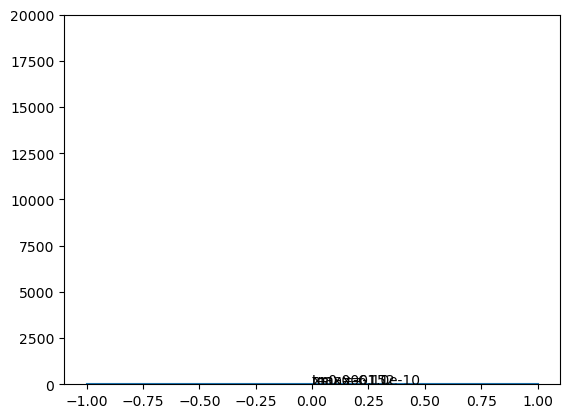

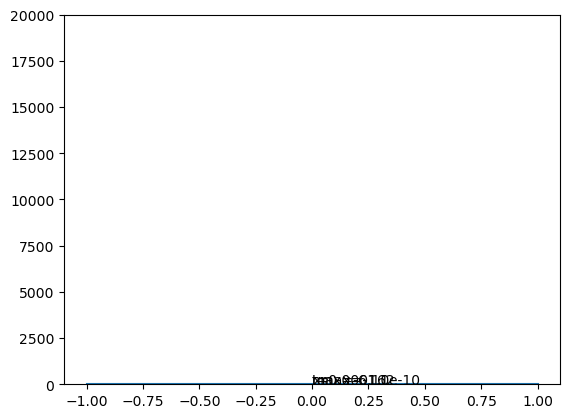

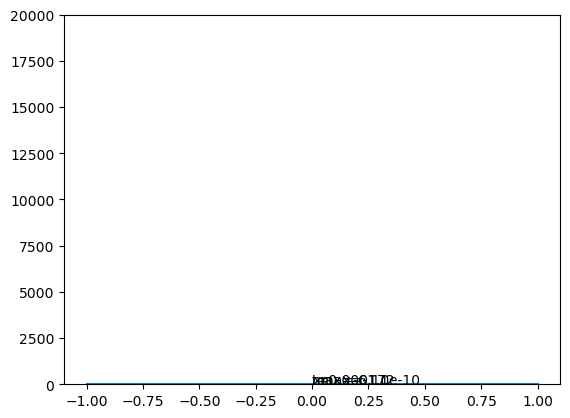

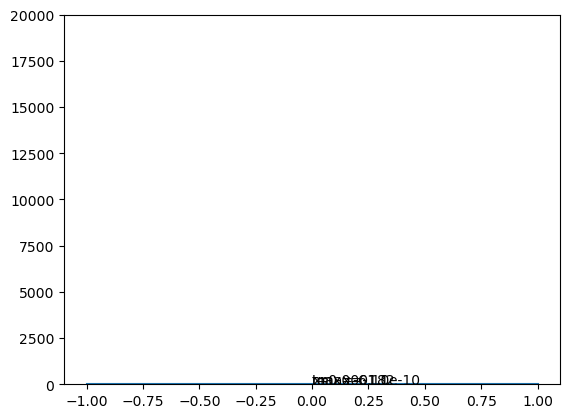

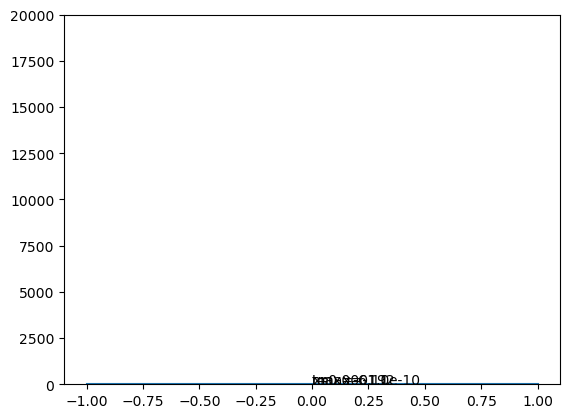

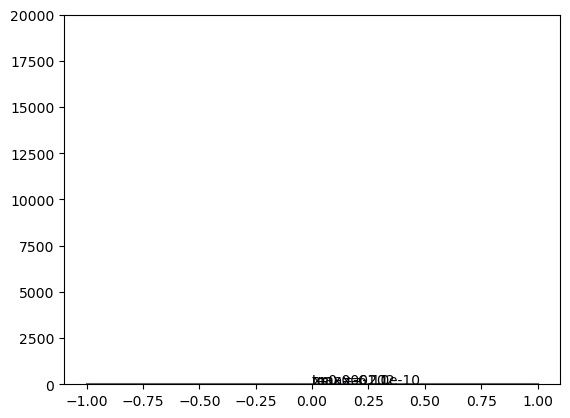

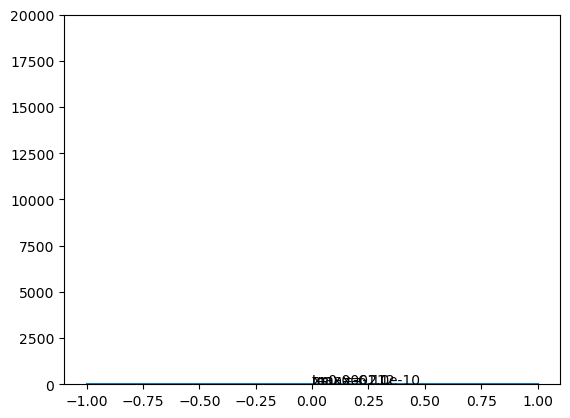

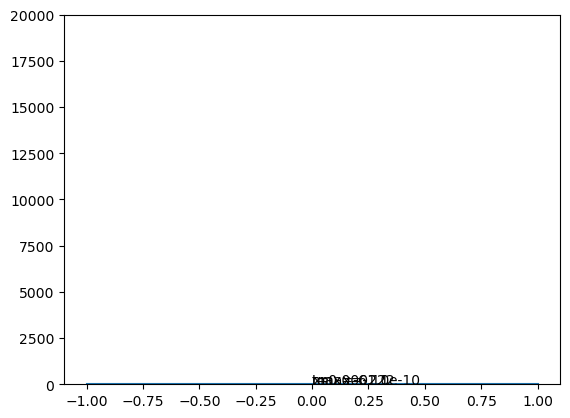

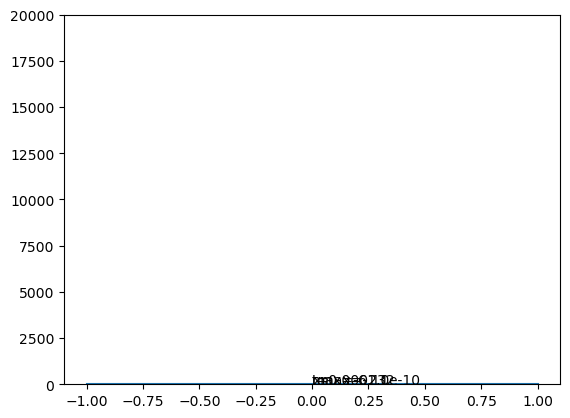

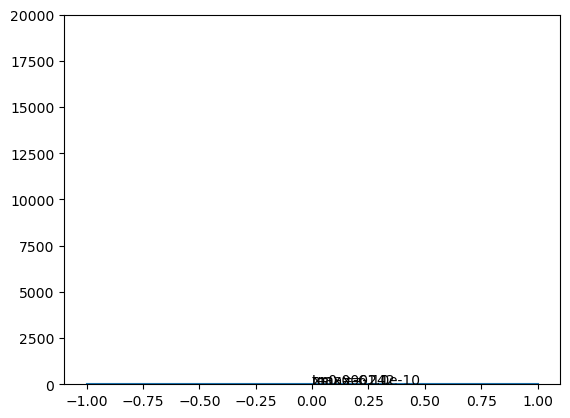

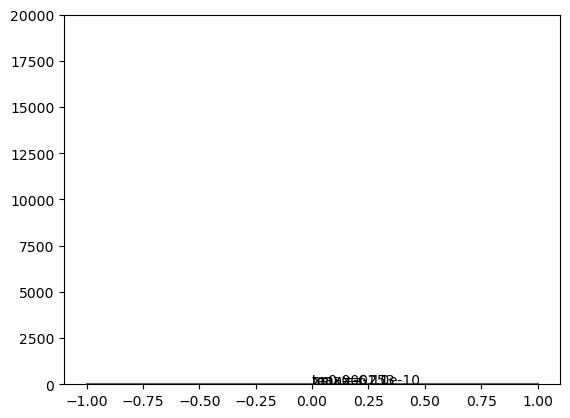

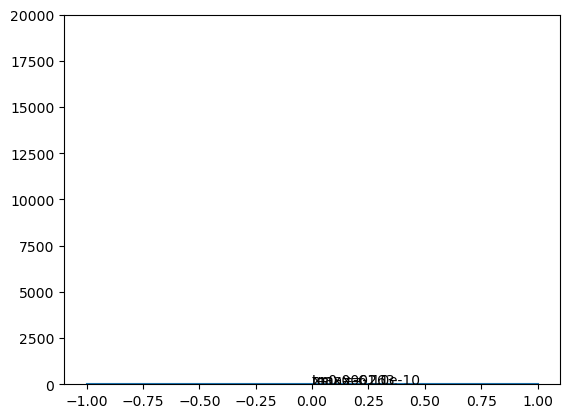

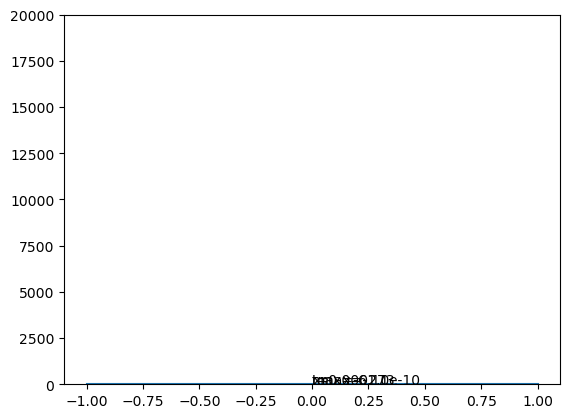

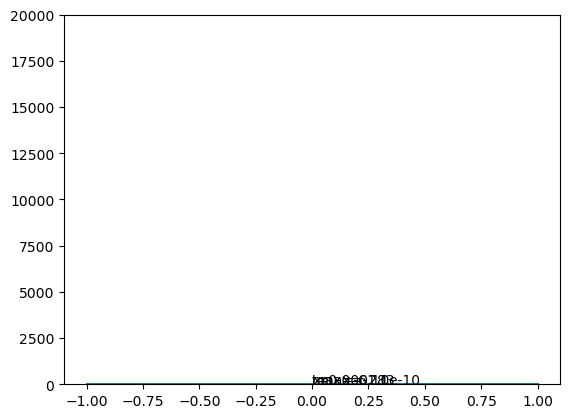

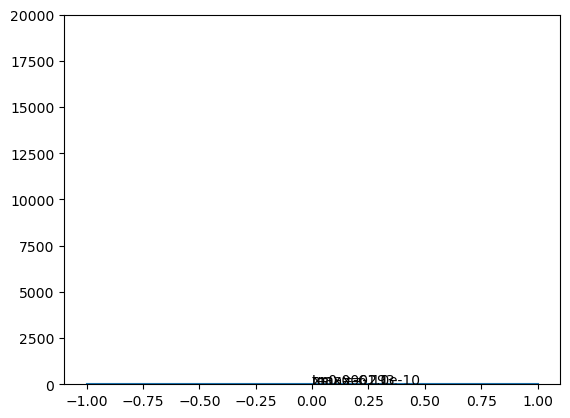

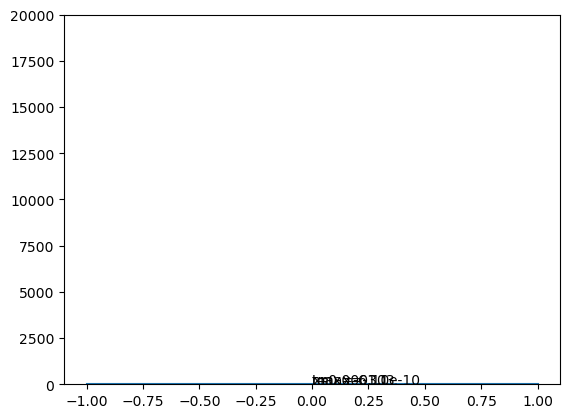

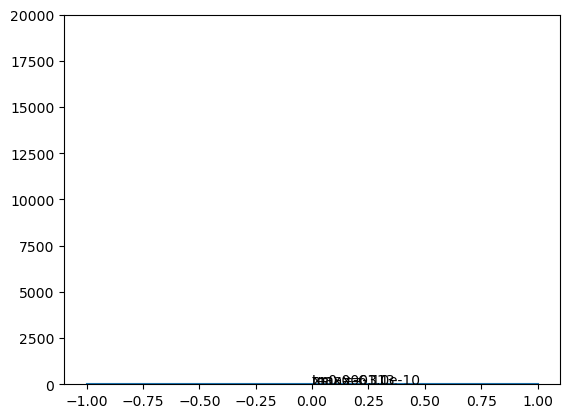

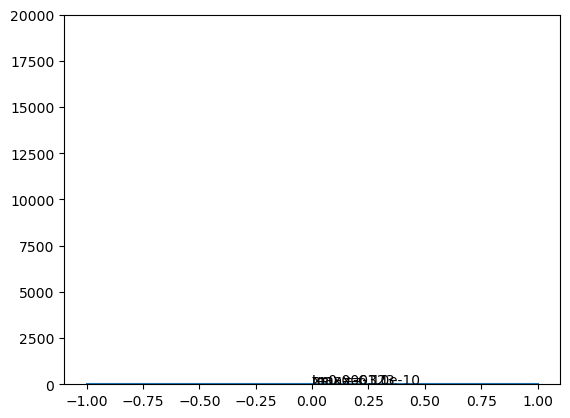

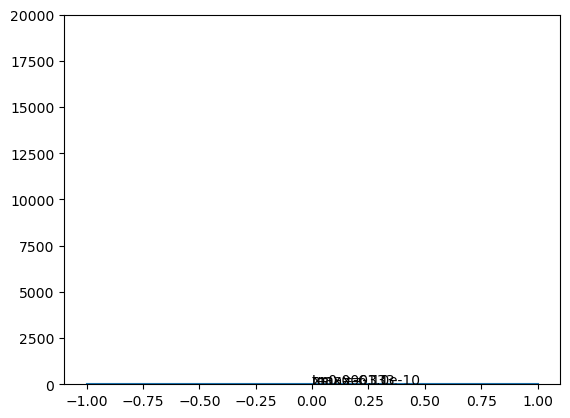

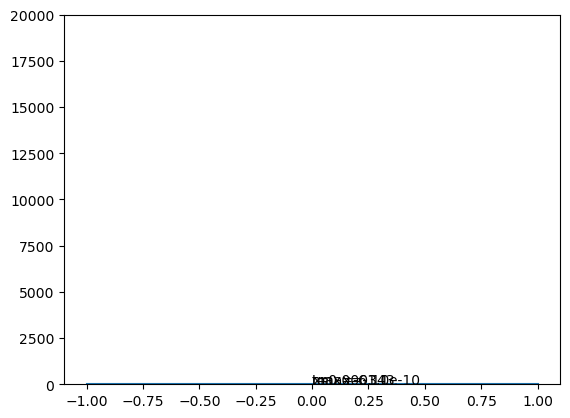

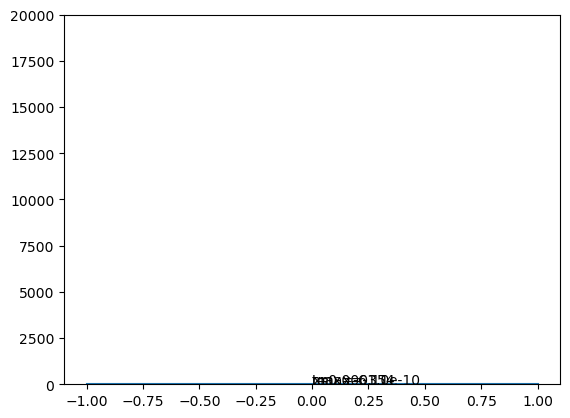

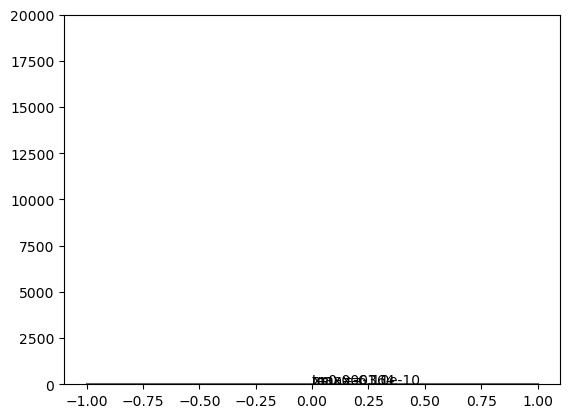

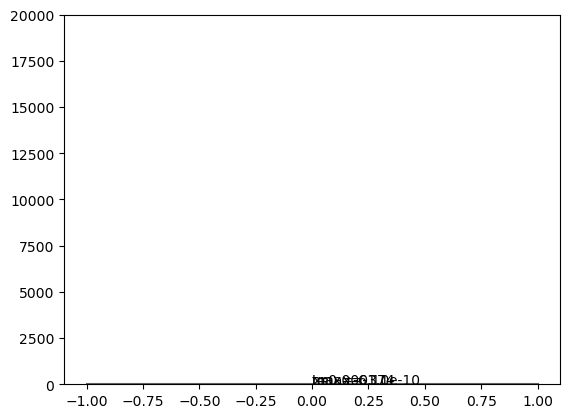

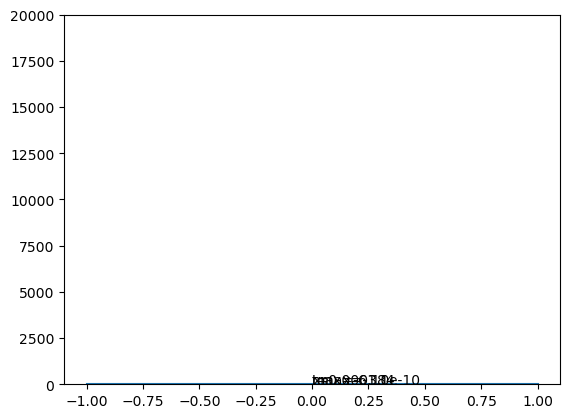

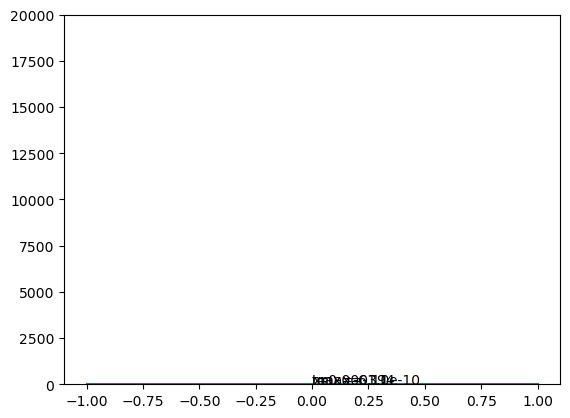

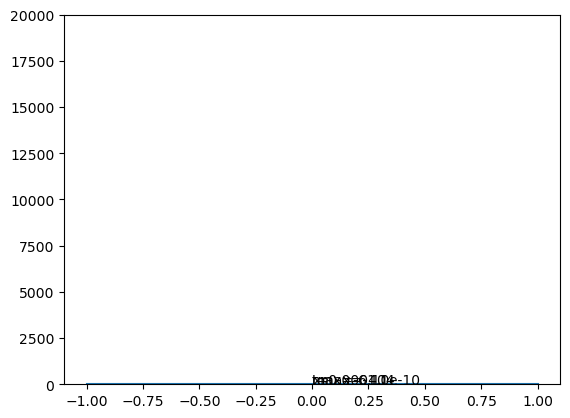

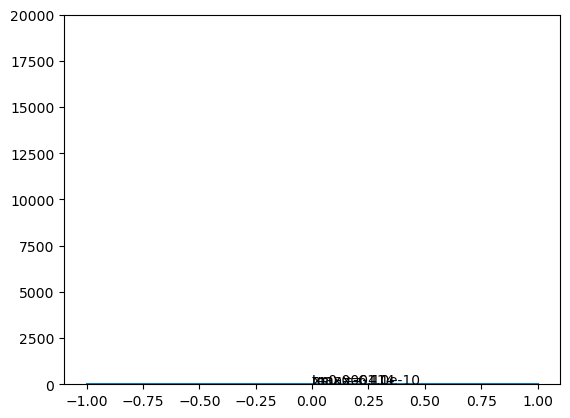

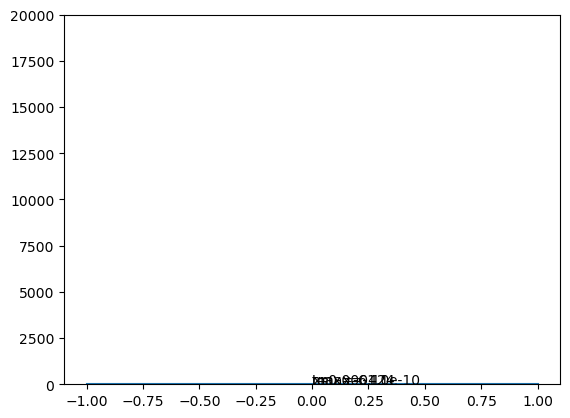

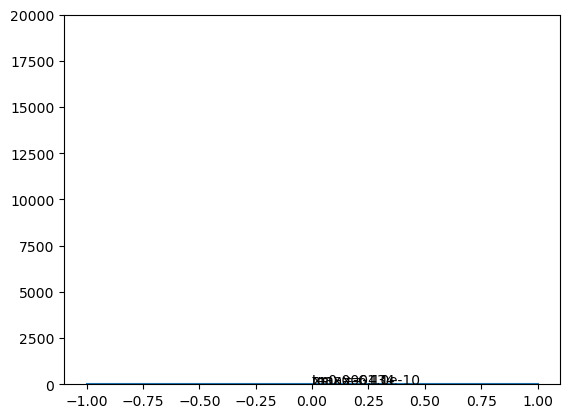

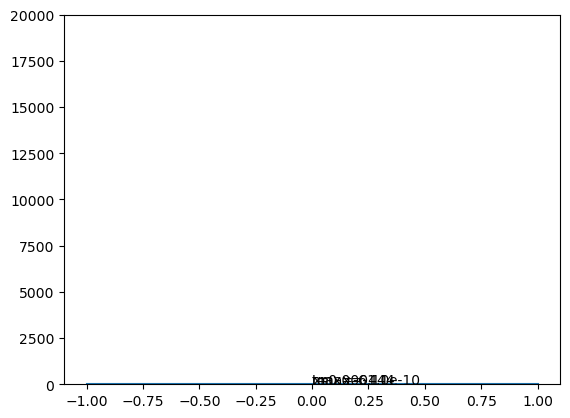

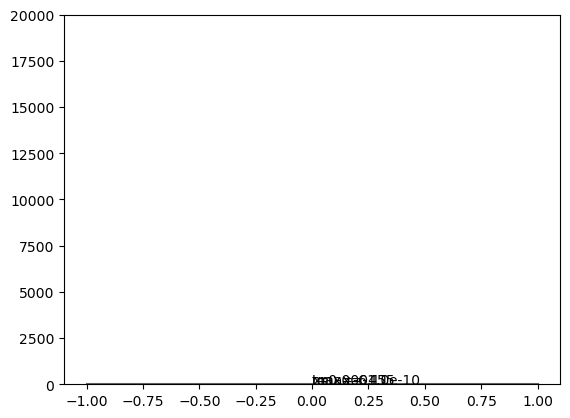

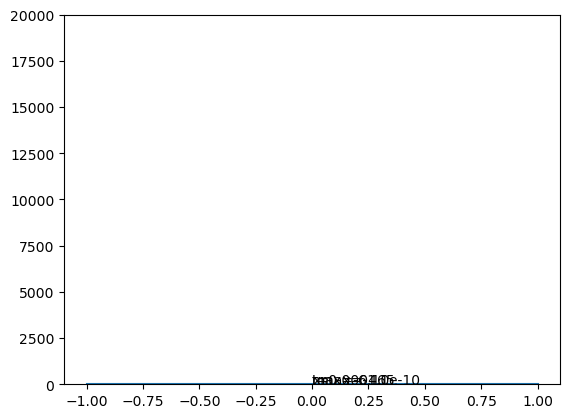

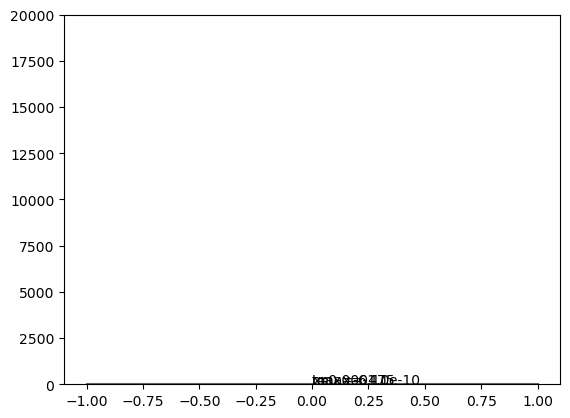

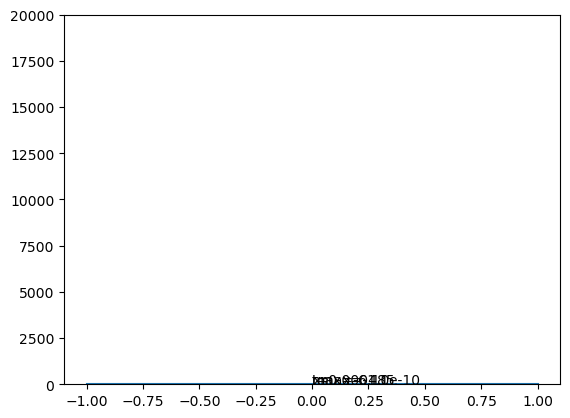

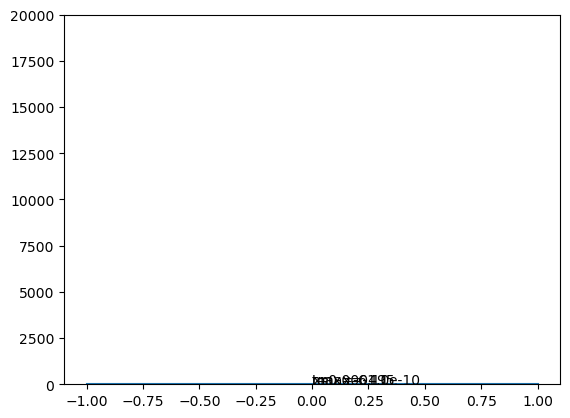

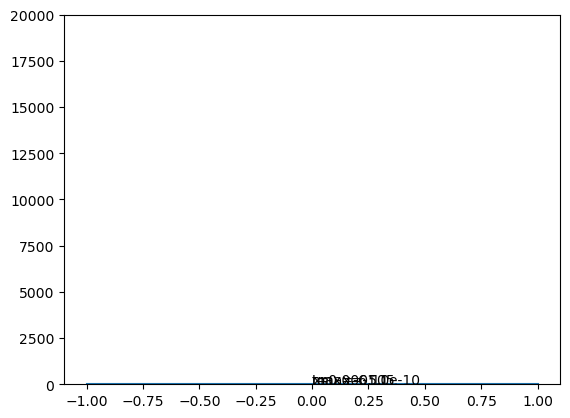

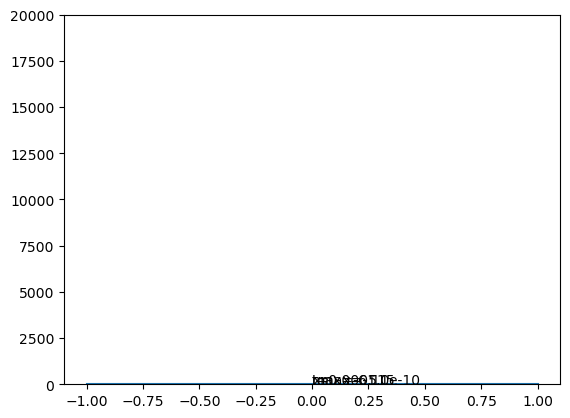

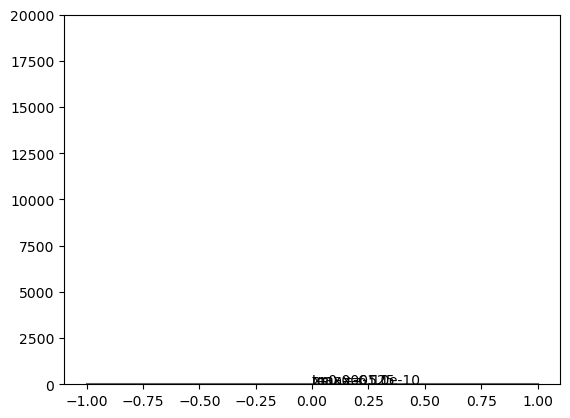

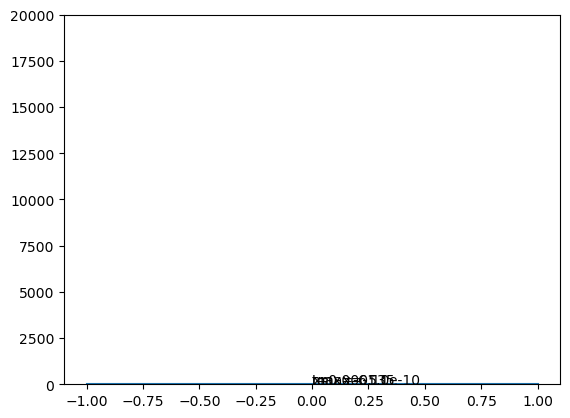

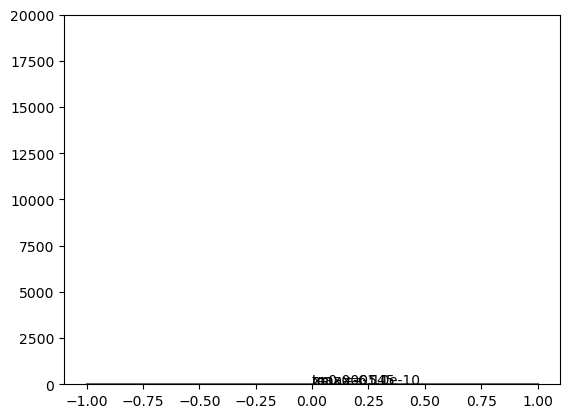

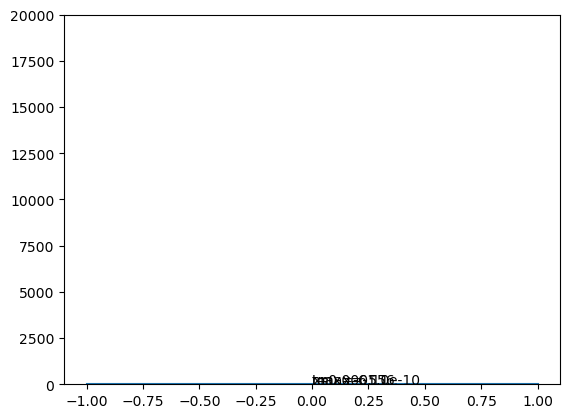

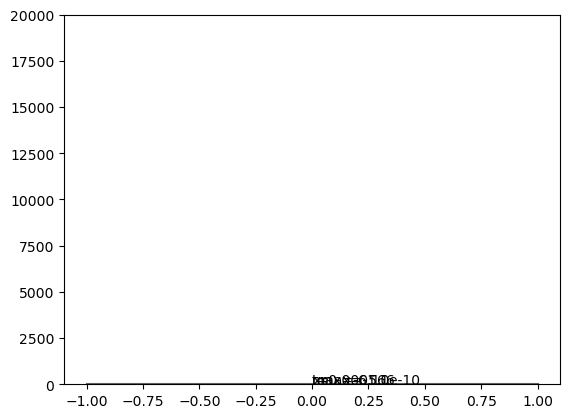

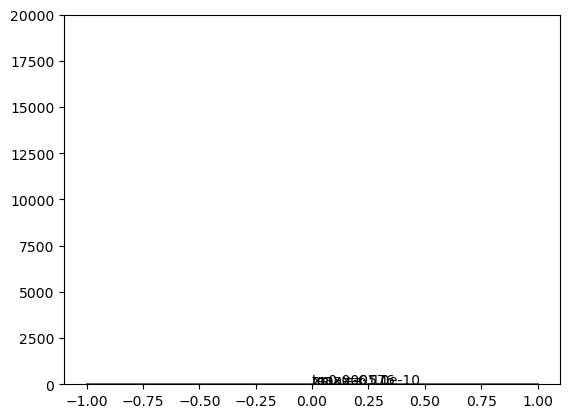

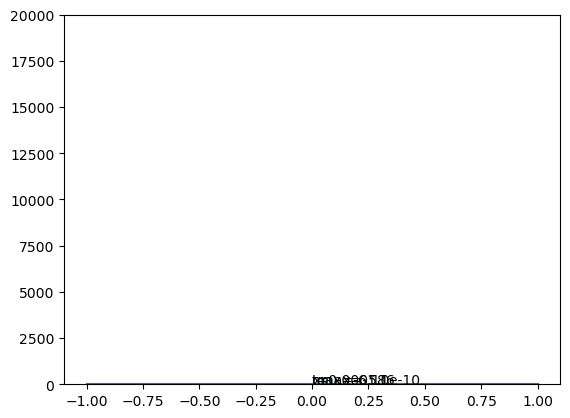

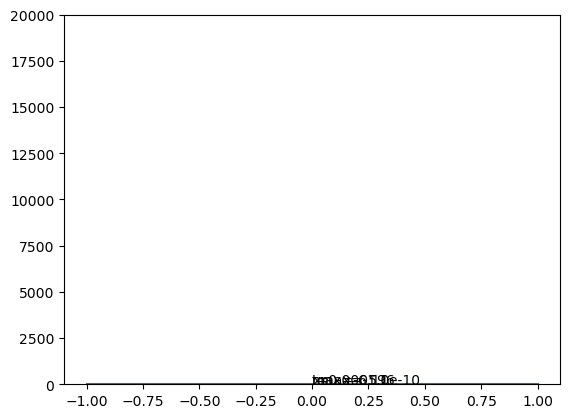

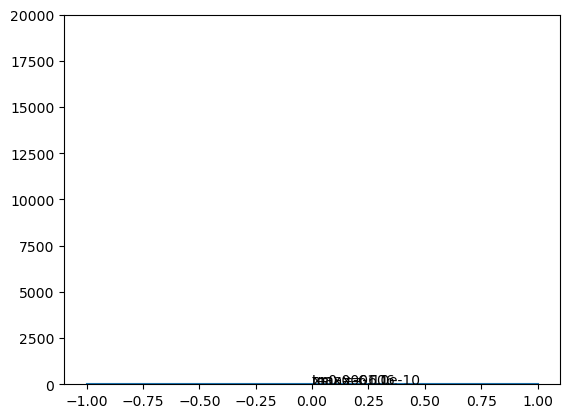

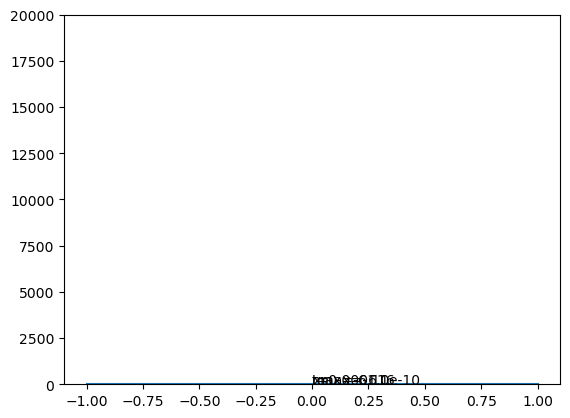

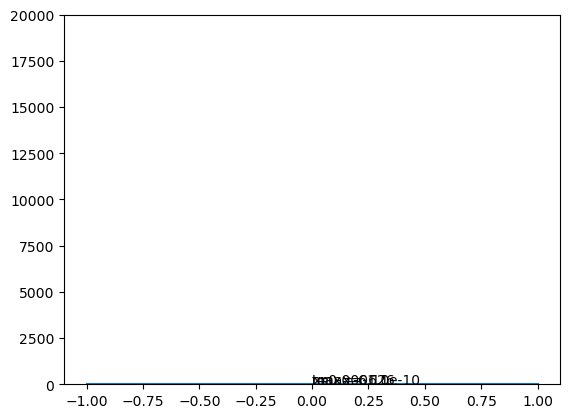

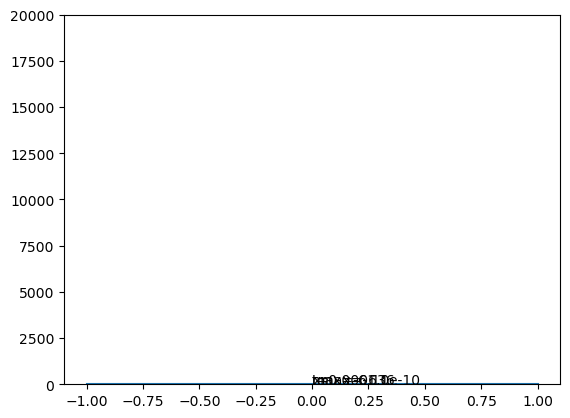

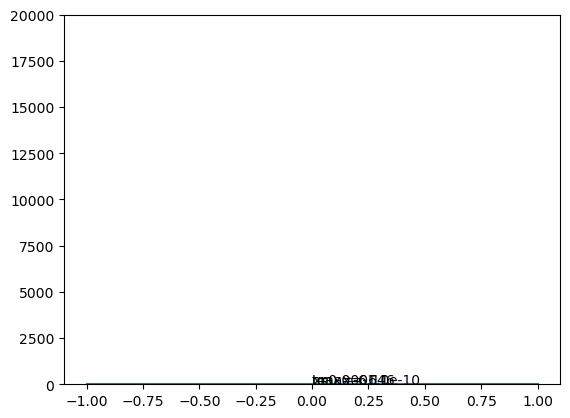

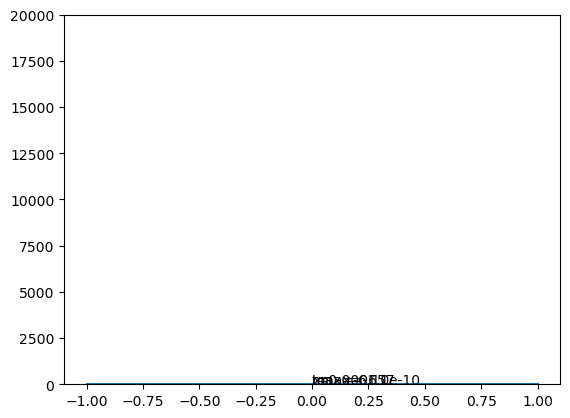

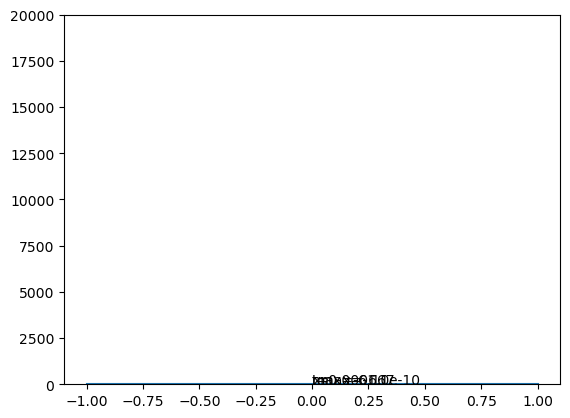

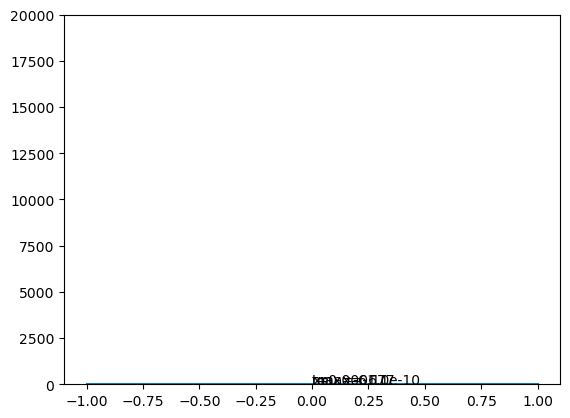

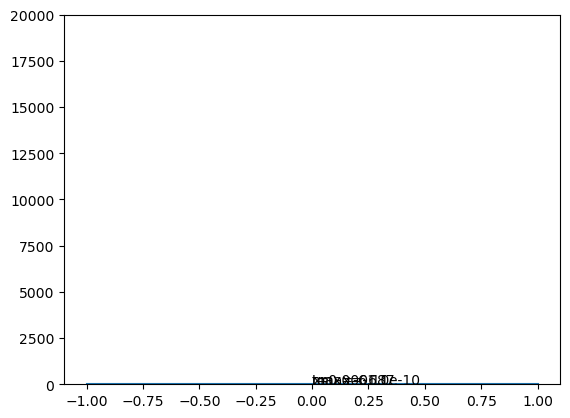

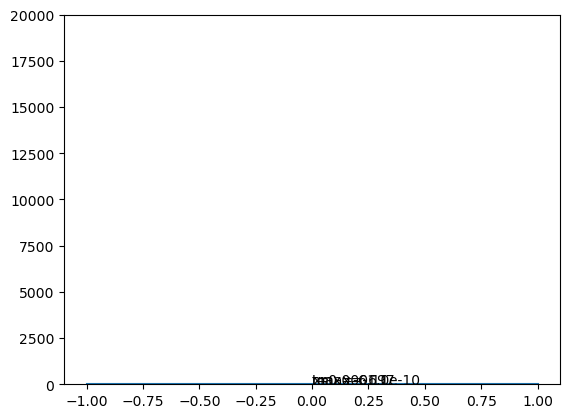

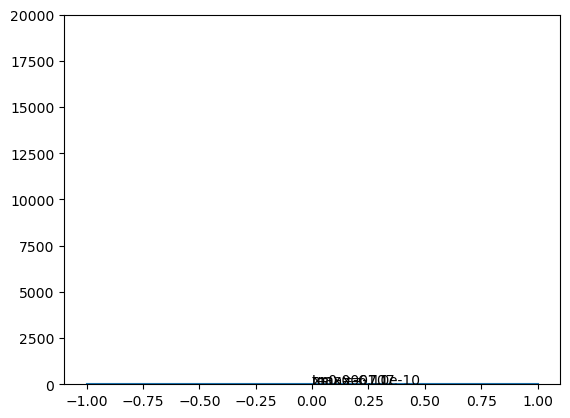

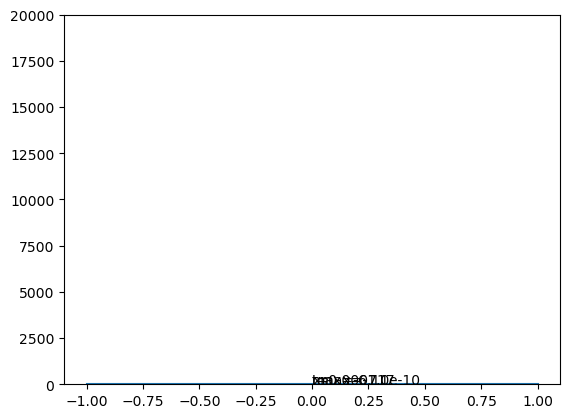

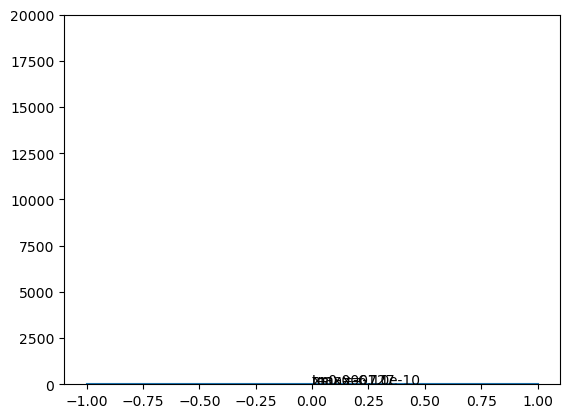

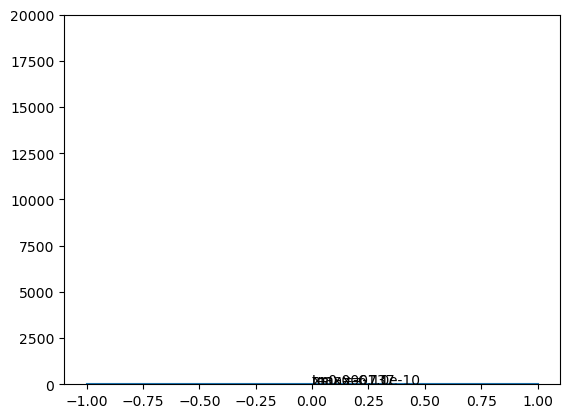

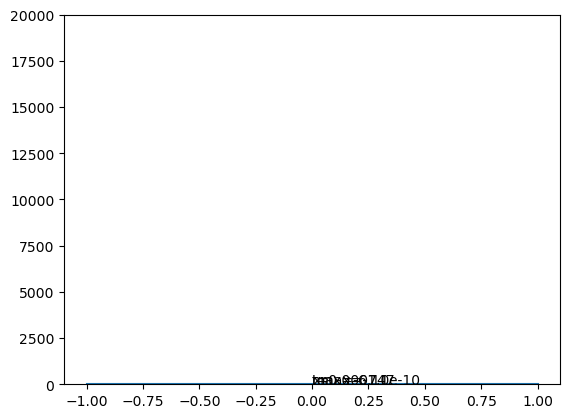

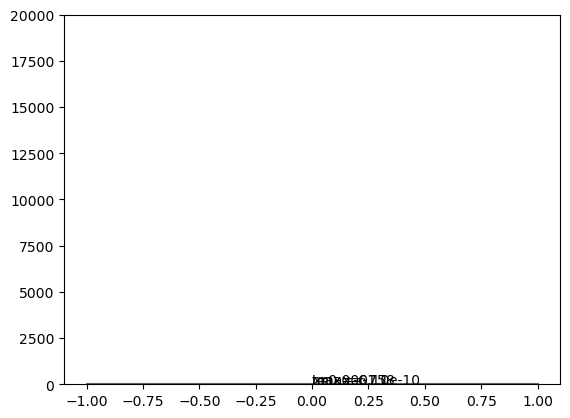

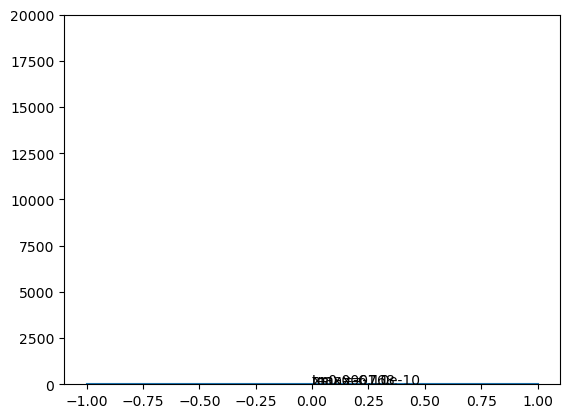

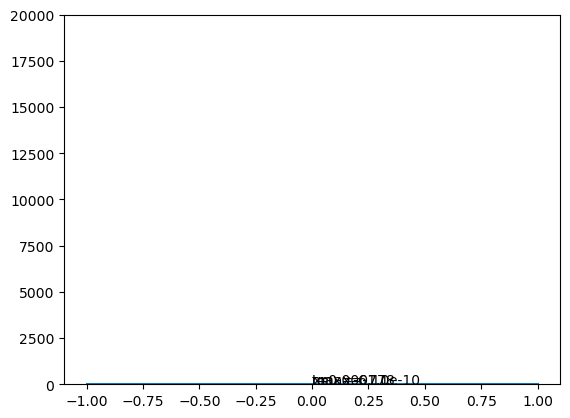

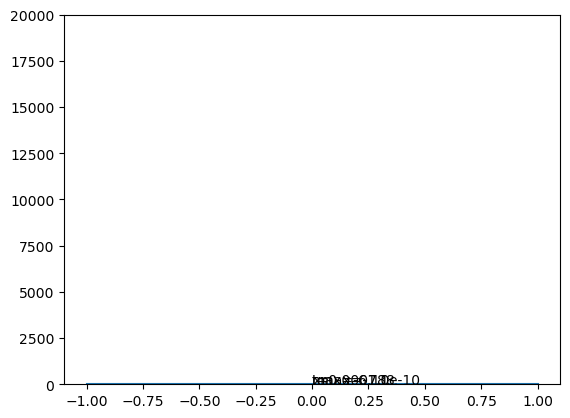

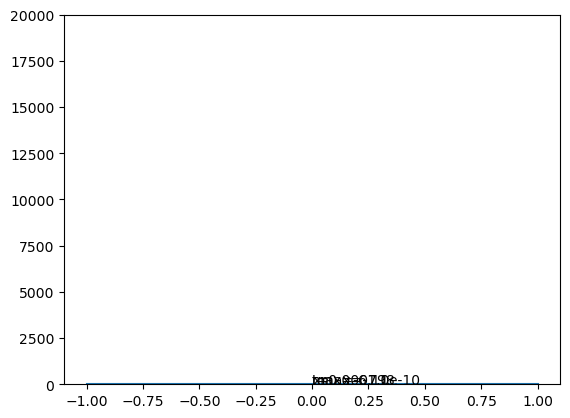

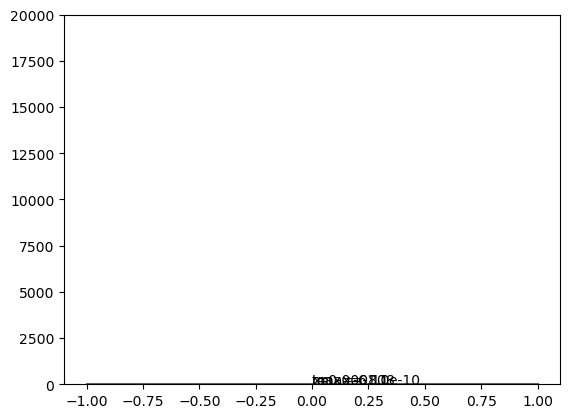

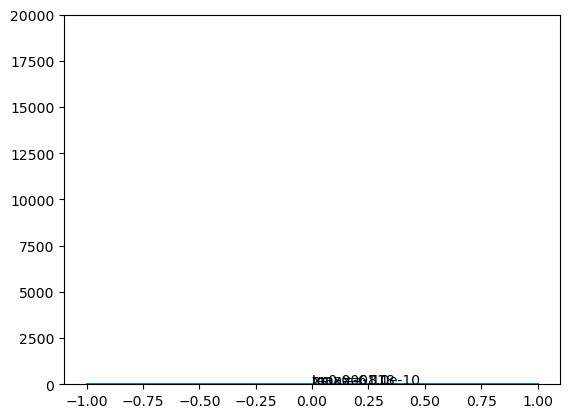

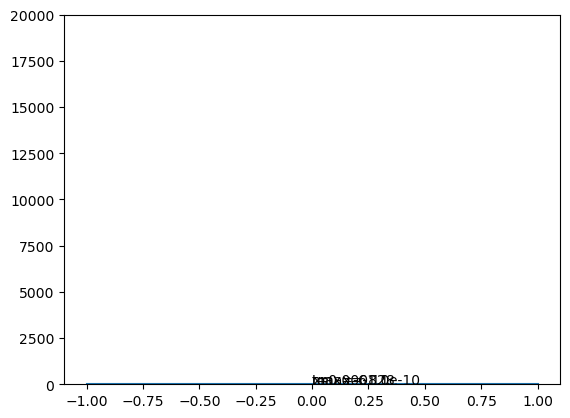

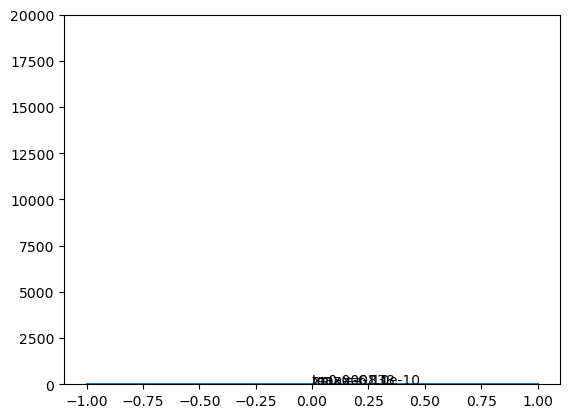

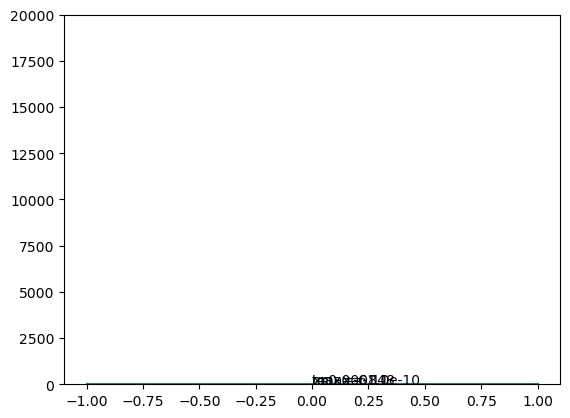

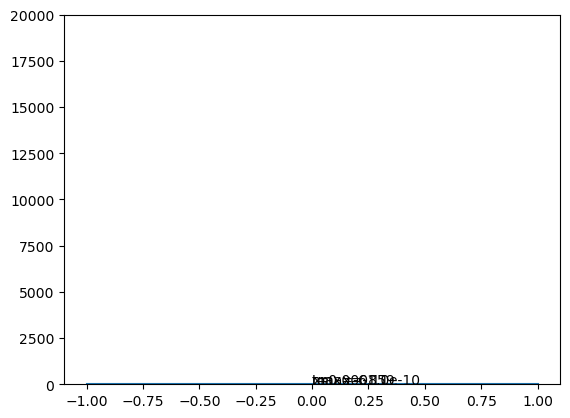

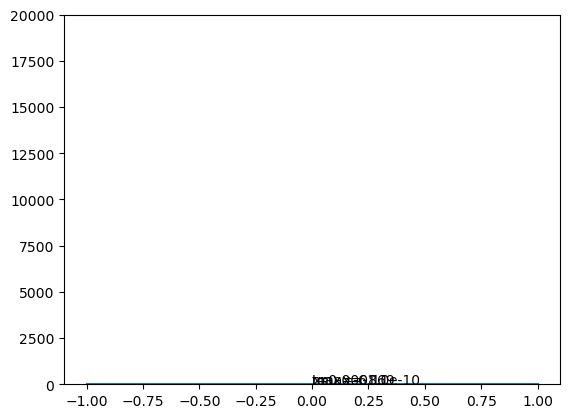

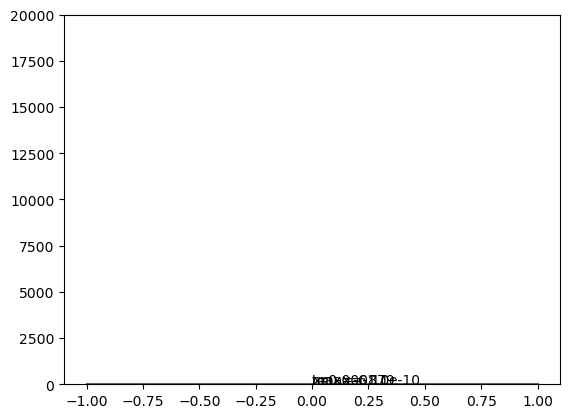

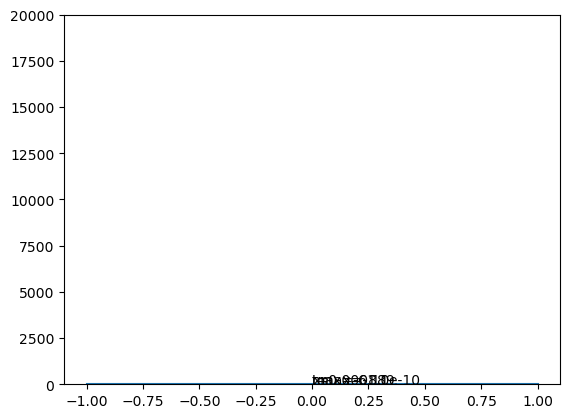

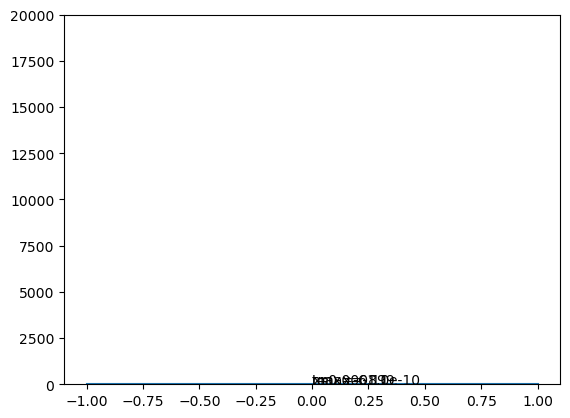

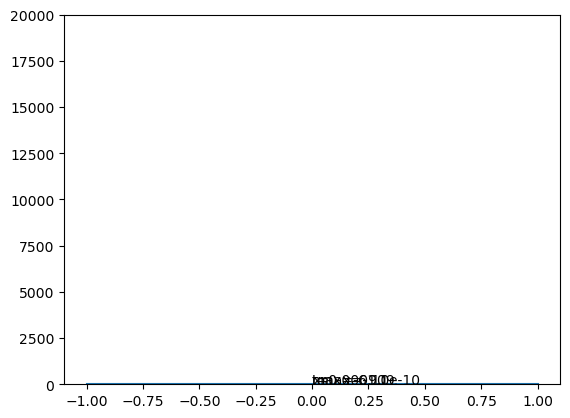

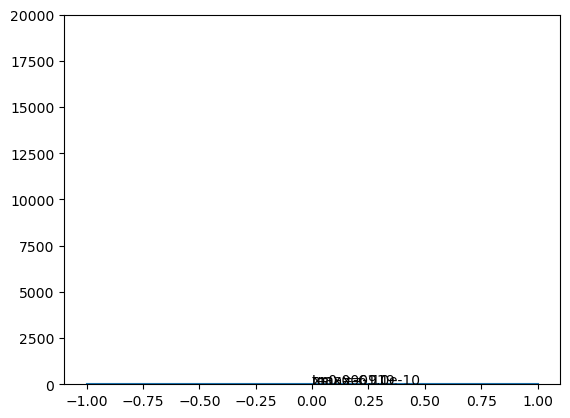

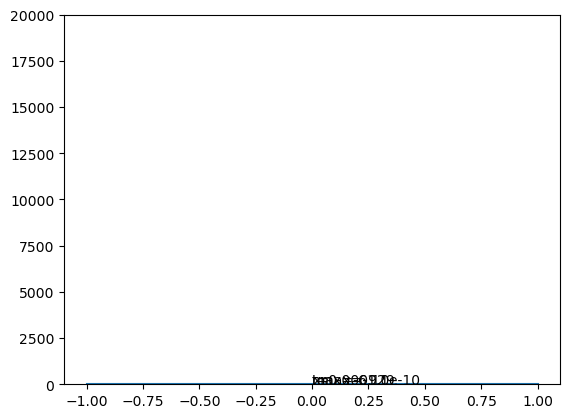

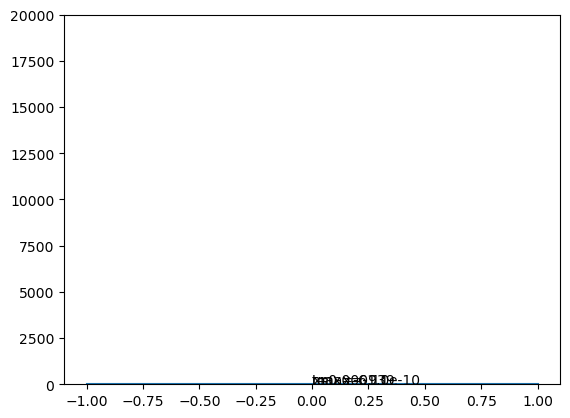

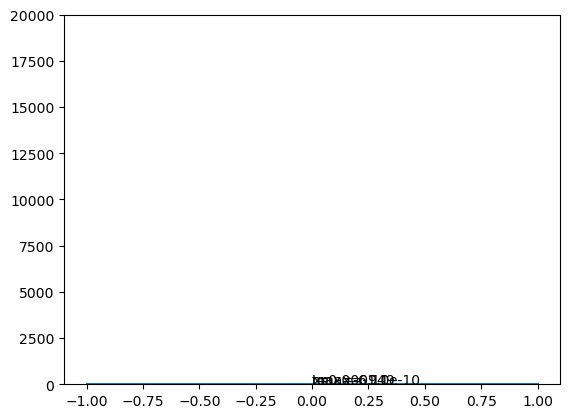

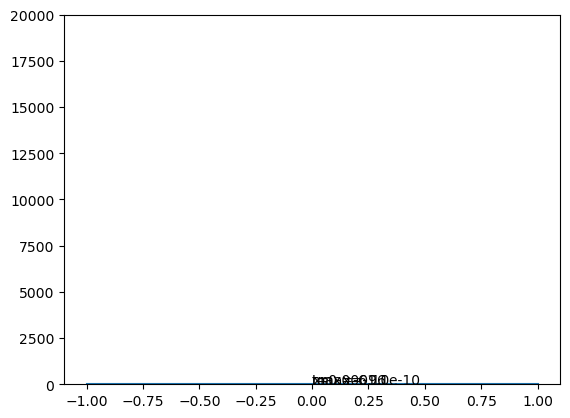

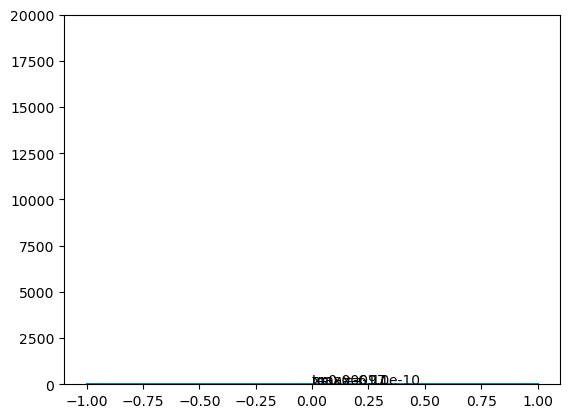

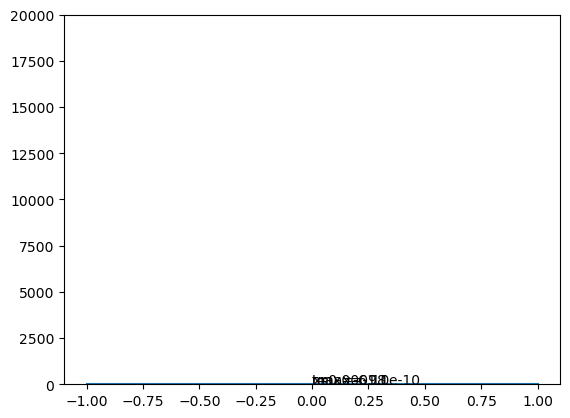

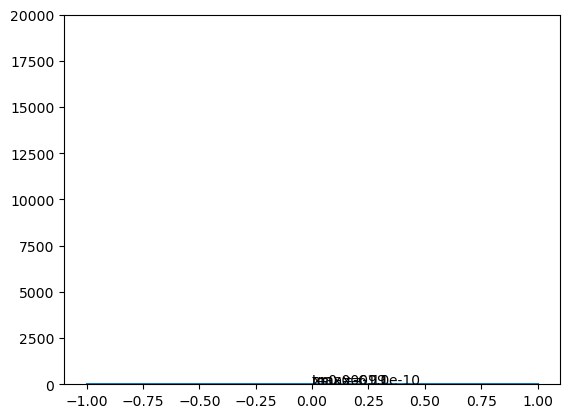

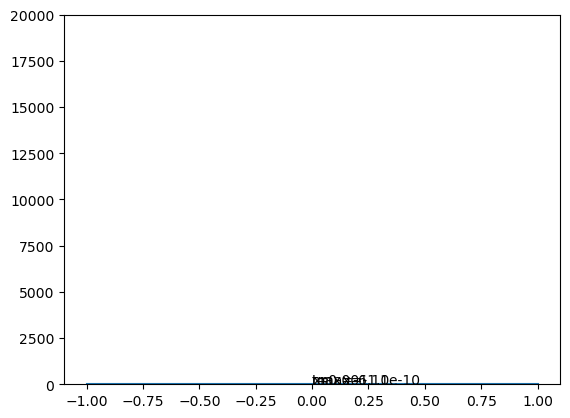

In [14]:
kappa1 = 78; gamma1 = 90;
kappa2 = 65; gamma2 = 85;

tarr = np.linspace(-0, 0.001, 100)

umaxarr = []
xmaxarr = []


Nx = 100
xarr = np.linspace(-1, 1, Nx)
uarr = np.zeros(Nx)

for t in tarr:
    j = 0
    for x in xarr:
        matrix_size = 2

        Mat = np.zeros((2,3), dtype=float)

        theta1 = np.real(2j*theta(x, t, 1j*kappa1))
        if ( theta1 <= 0):
            exp1 = np.exp(theta1)
            Mat[0][0] = 1 + exp1 * gamma1**2 / (2*kappa1)
            Mat[0][1] = exp1 * gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2 * exp1
        else:
            exp1 = np.exp(-theta1)
            Mat[0][0] = exp1 + gamma1**2 / (2*kappa1)
            Mat[0][1] = gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2

        theta2 = np.real(2j*theta(x, t, 1j*kappa2))
        if (theta2 <= 0):
            exp2 = np.exp(theta2)
            Mat[1][0] = exp2 * gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = 1 + exp2 * gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2 * exp2
        else:
            exp2 = np.exp(-theta2)
            Mat[1][0] = gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = exp2 + gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2
    
        alphas = np.linalg.solve(Mat[:, :2], Mat[:, 2])
        alphas

        u = 4 * (alphas[0] * kappa1 + alphas[1] * kappa2) - 2 * (alphas[0] + alphas[1])**2
        uarr[j] = u
        j += 1
    plt.plot(xarr, uarr)    
    plt.ylim((-1, 20000))
    plt.text(0, 15, "t={:.3}".format(t))
    plt.text(0, 16, "max={:.3}".format(np.max(uarr)))
    plt.text(0, 17, "xmax={:.3}".format(xarr[np.argmax(uarr)]))
    plt.show()

    umaxarr.append(np.max(uarr))
    xmaxarr.append(xarr[np.argmax(uarr)])

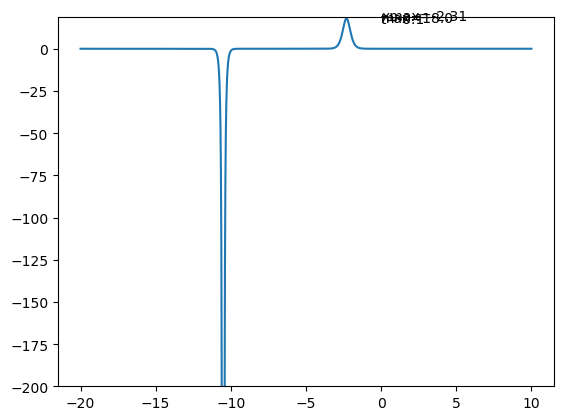

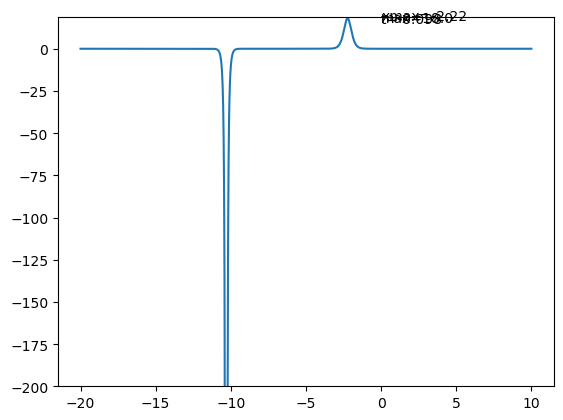

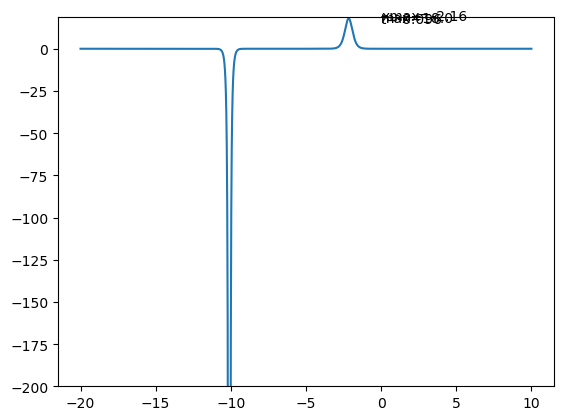

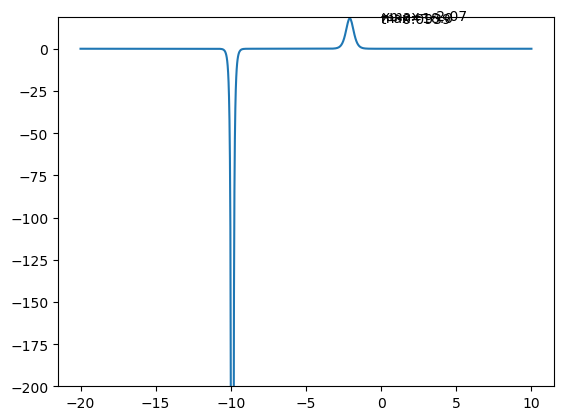

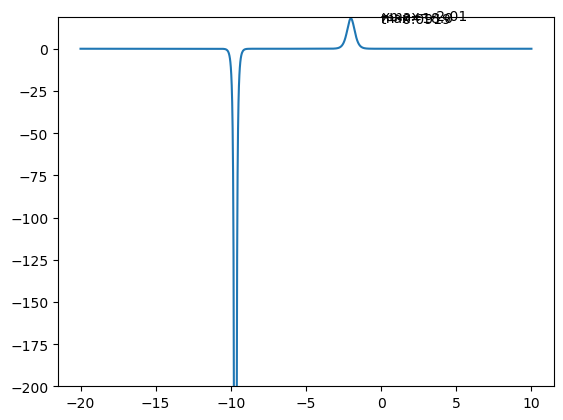

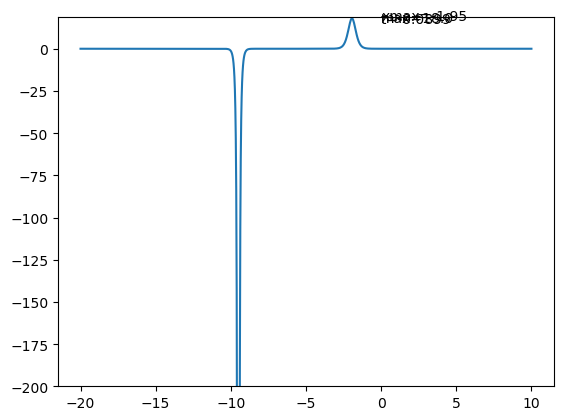

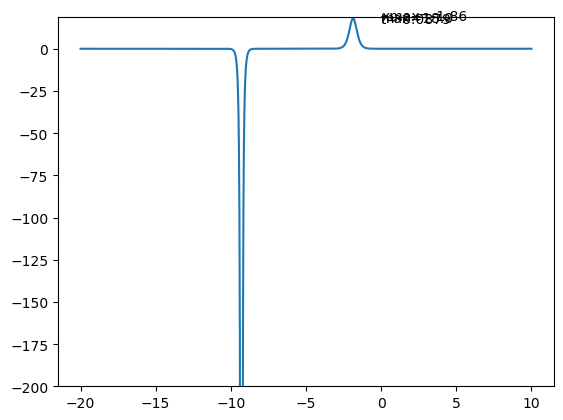

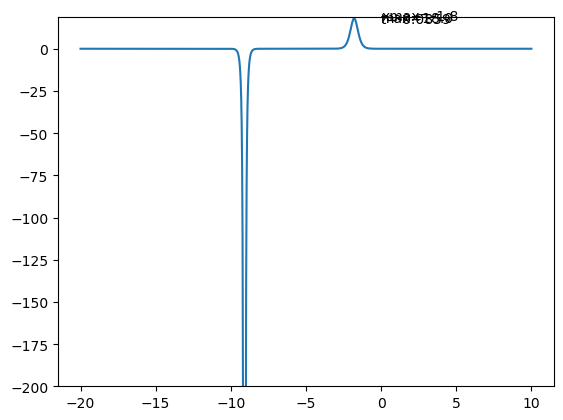

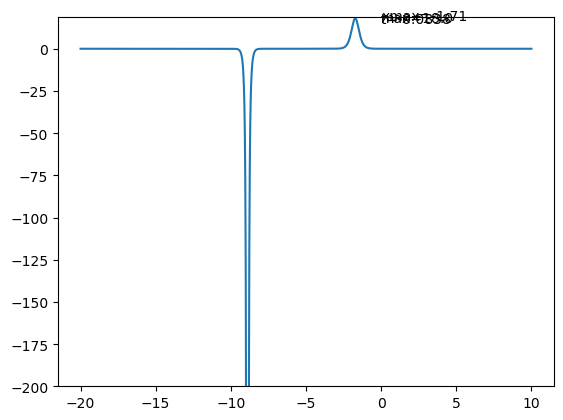

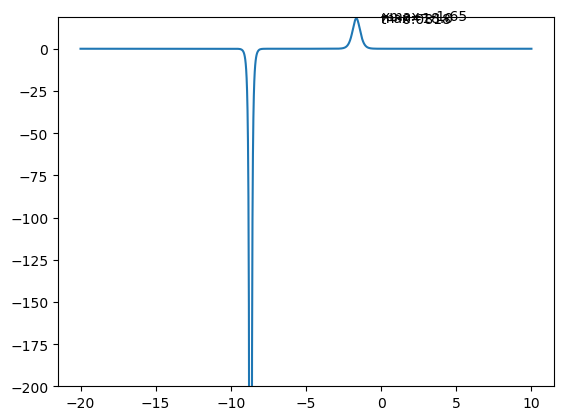

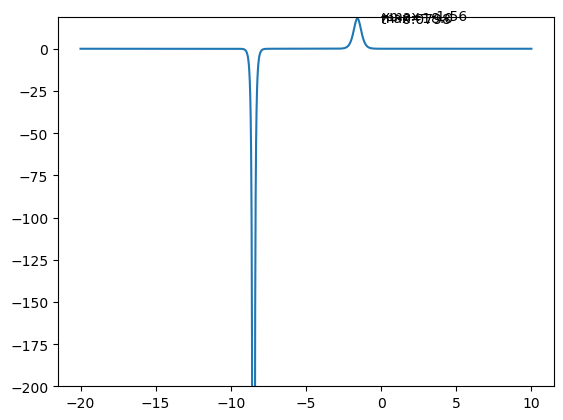

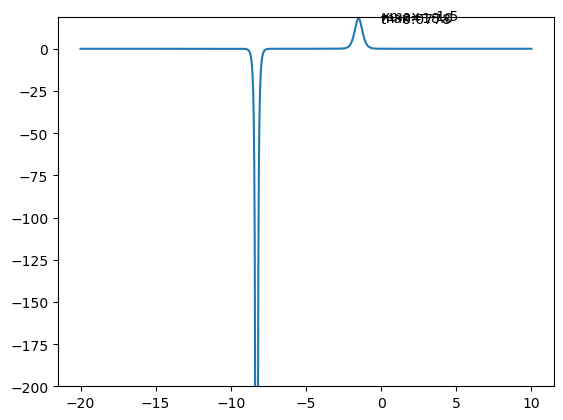

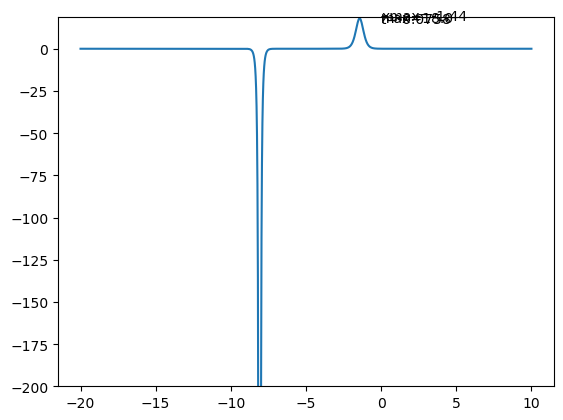

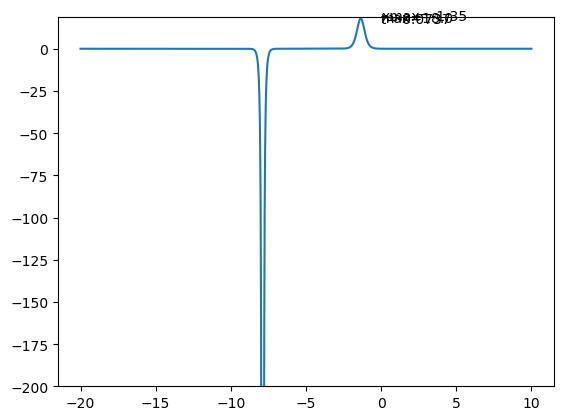

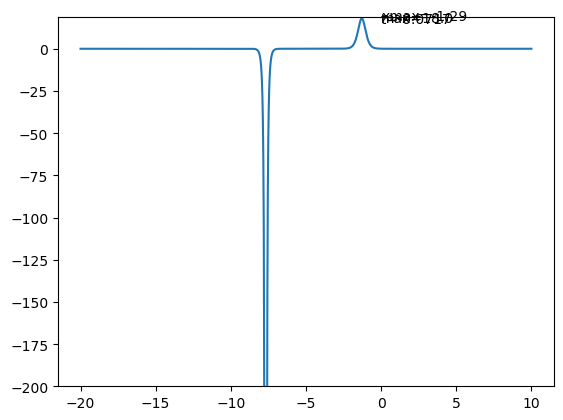

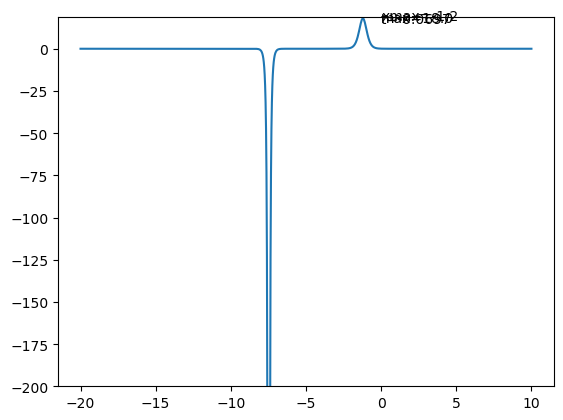

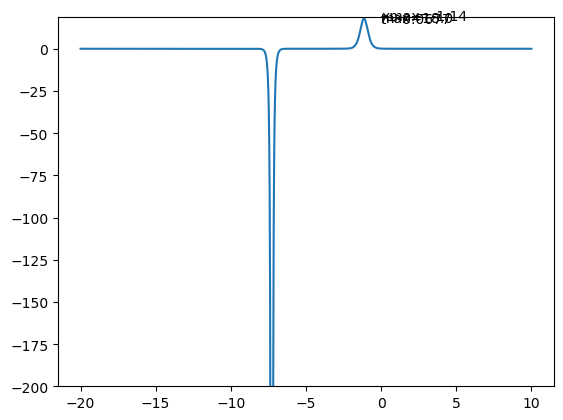

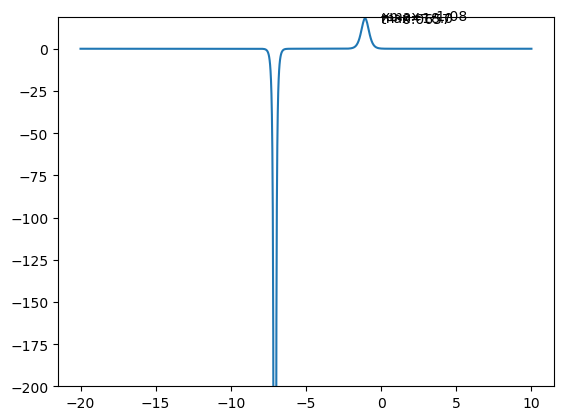

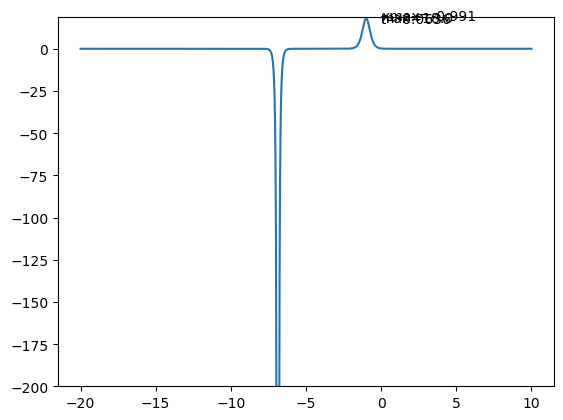

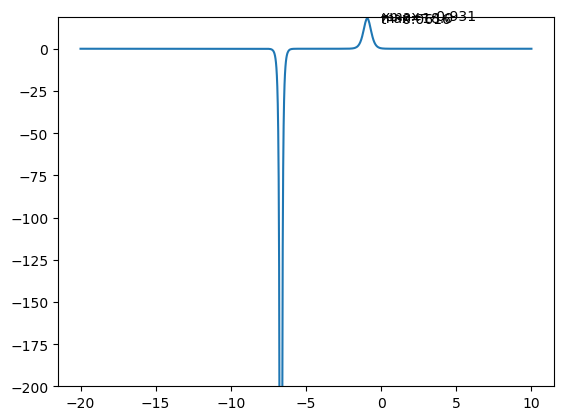

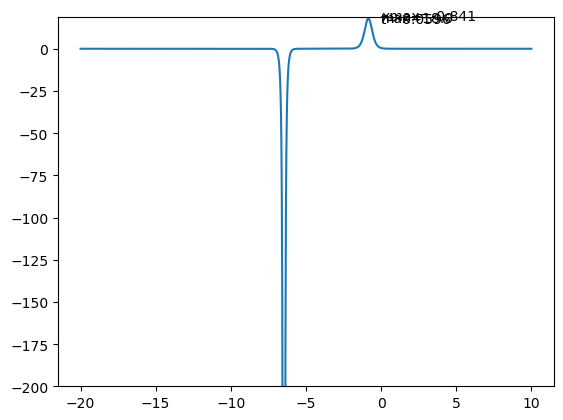

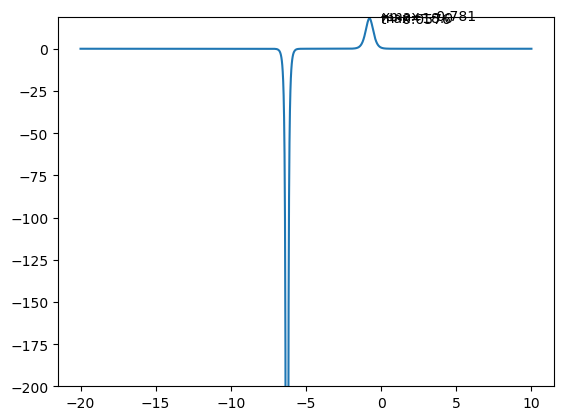

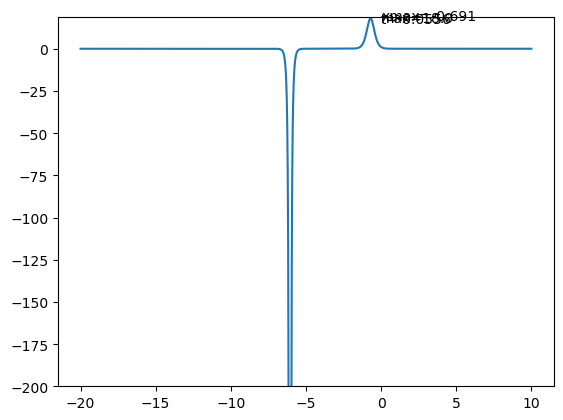

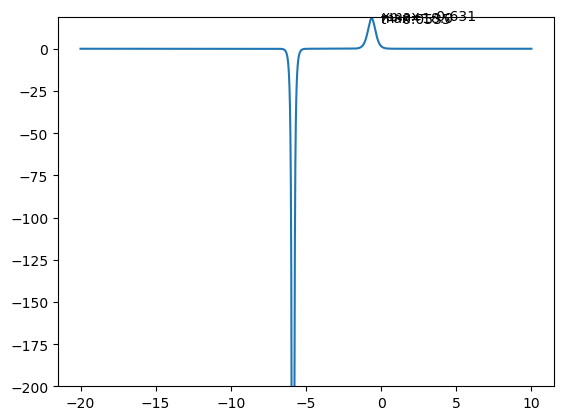

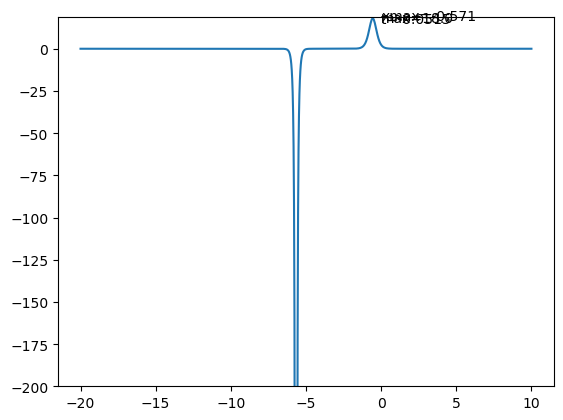

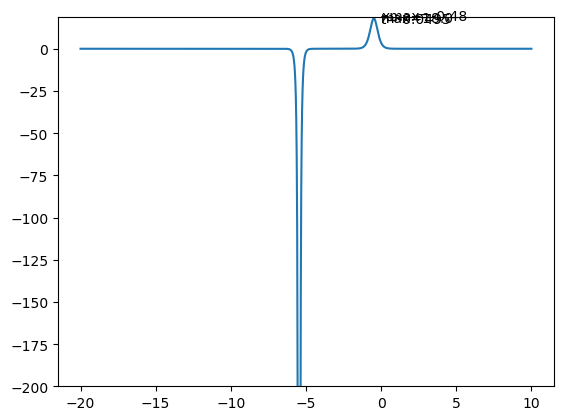

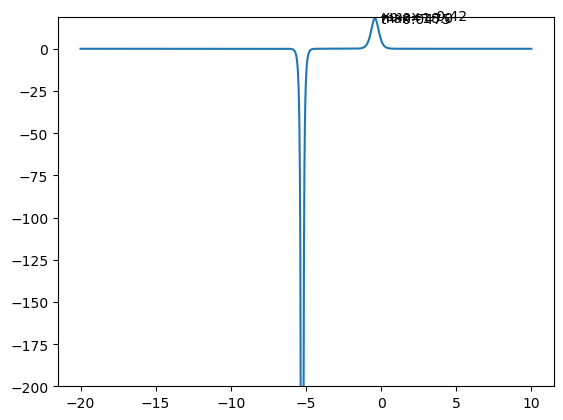

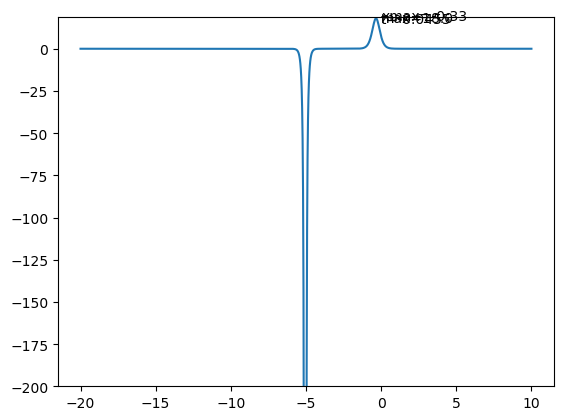

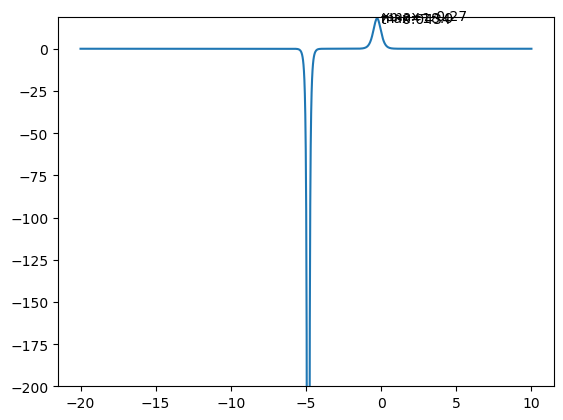

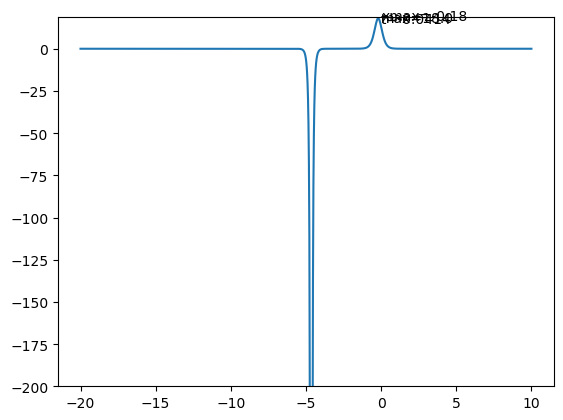

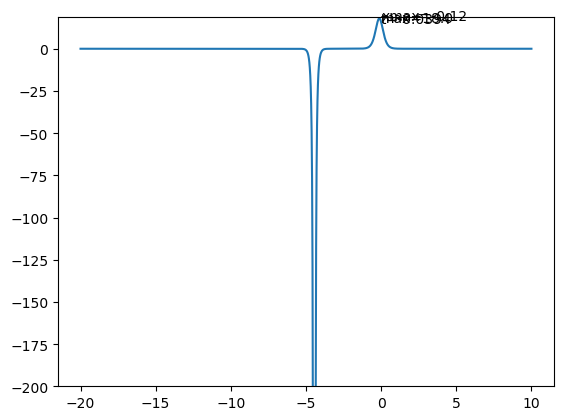

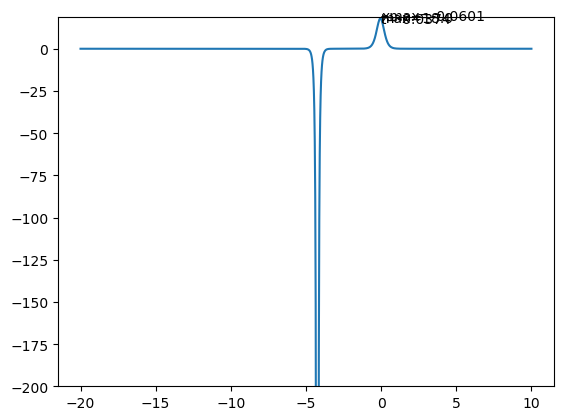

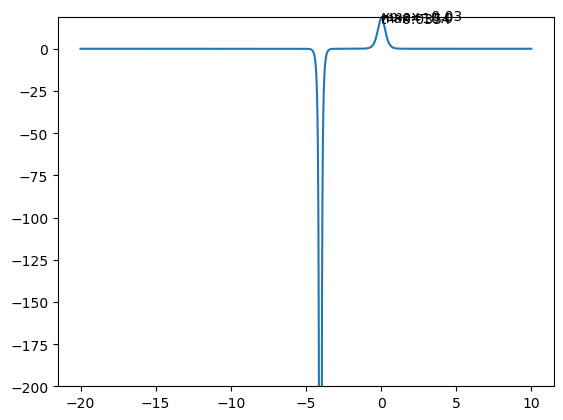

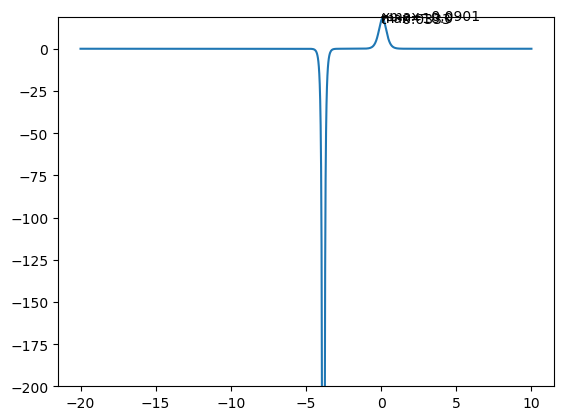

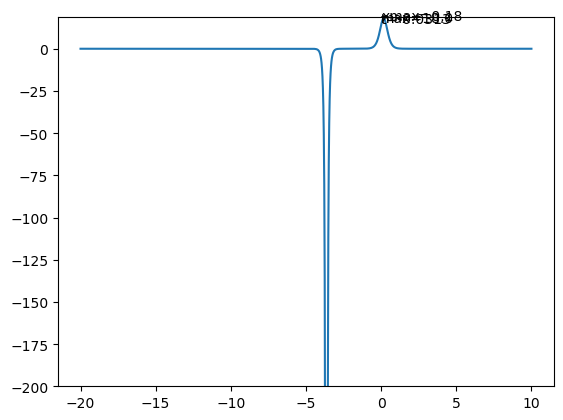

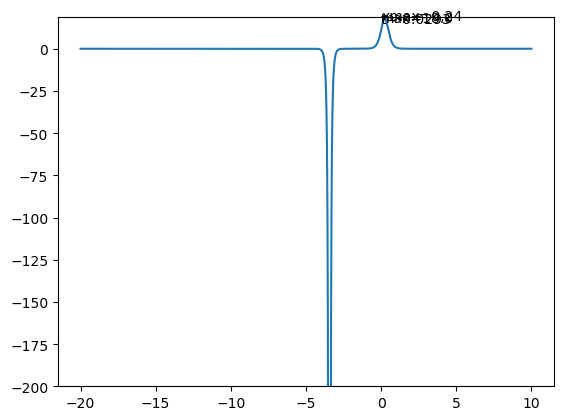

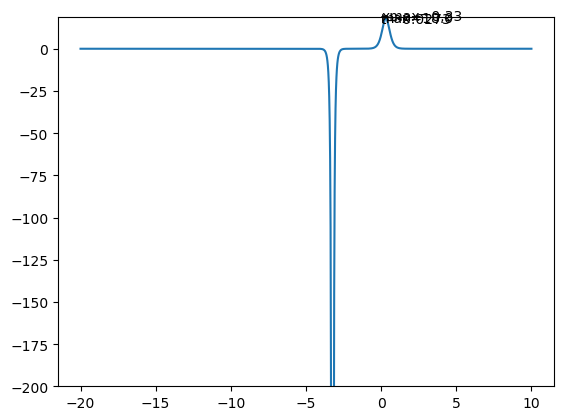

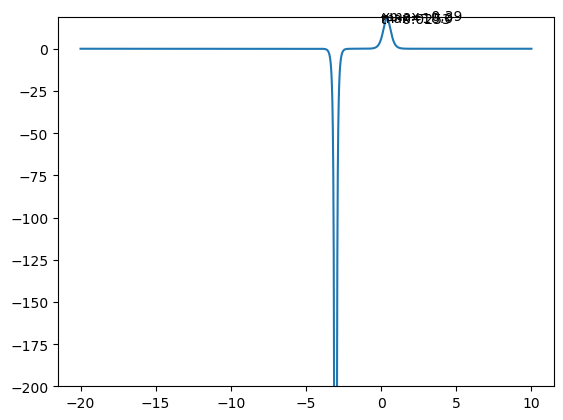

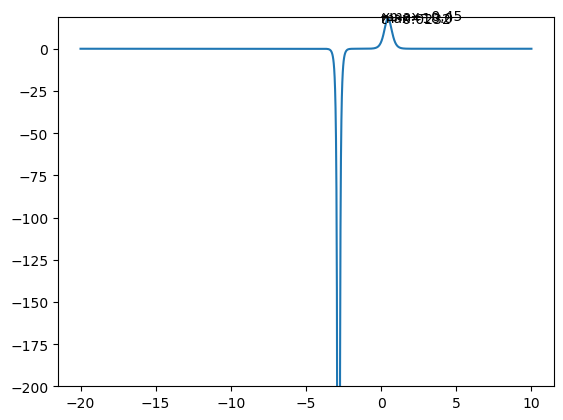

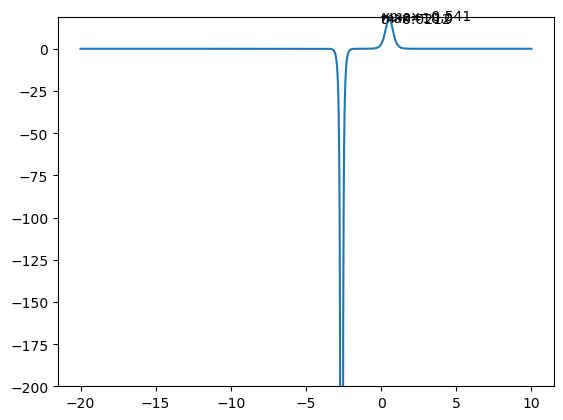

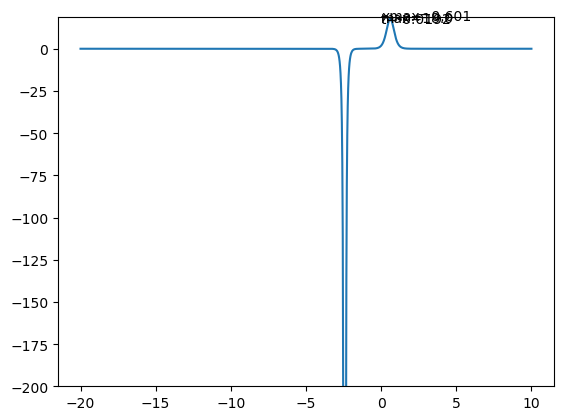

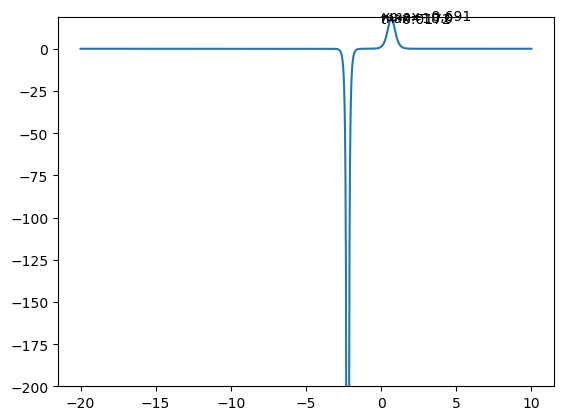

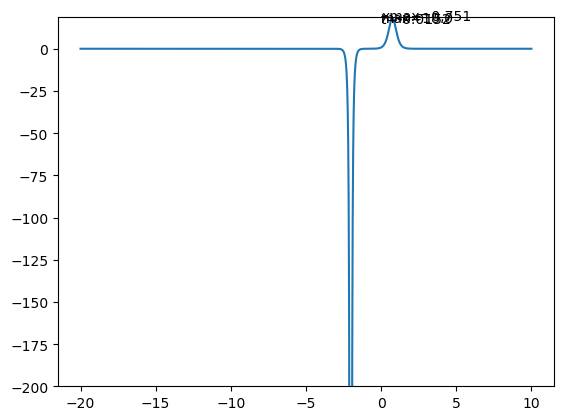

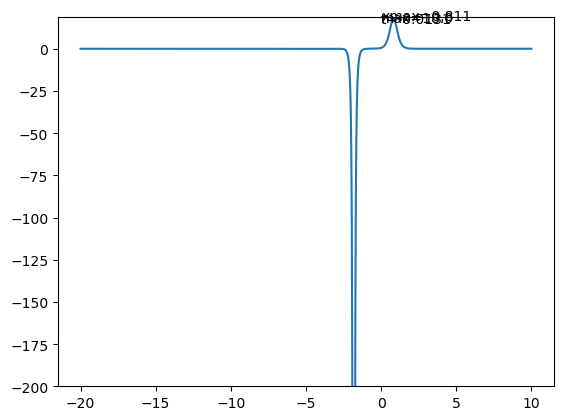

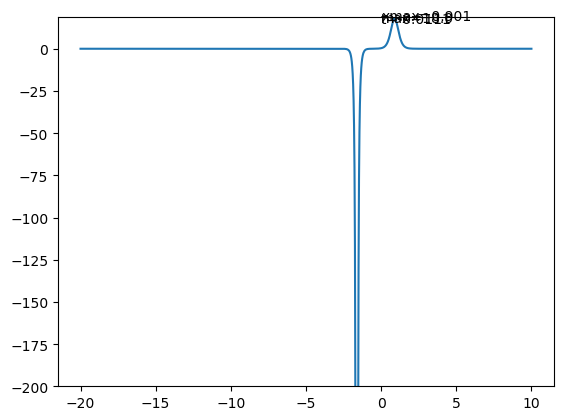

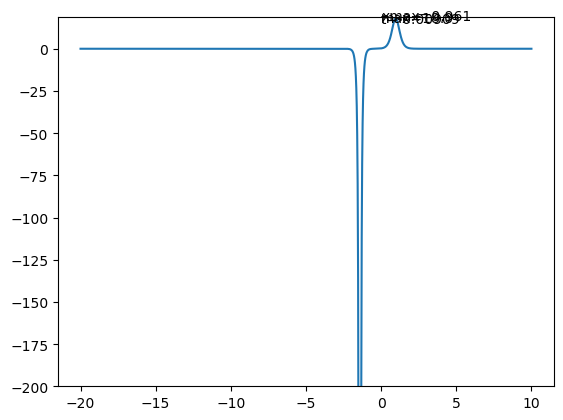

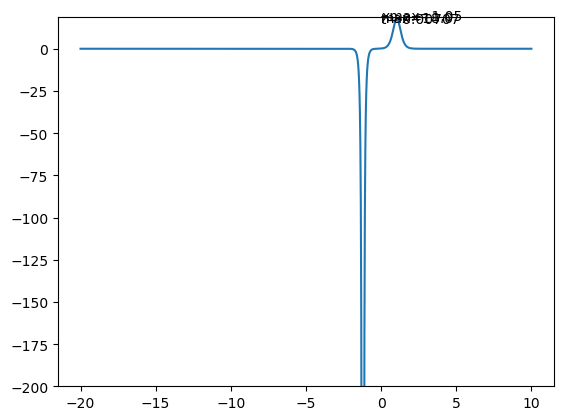

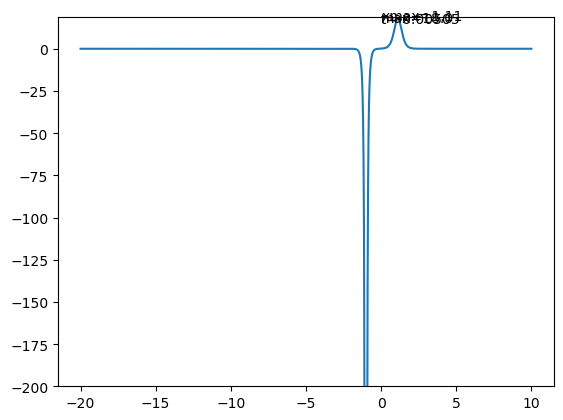

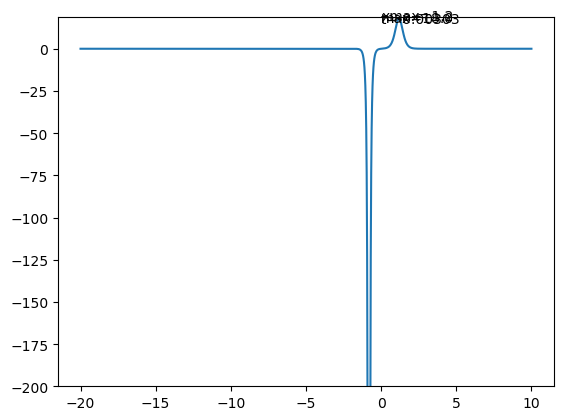

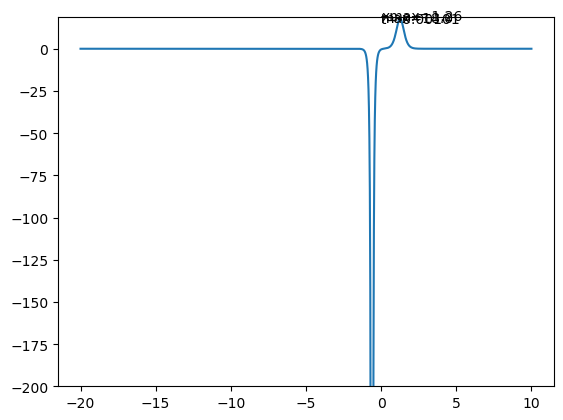

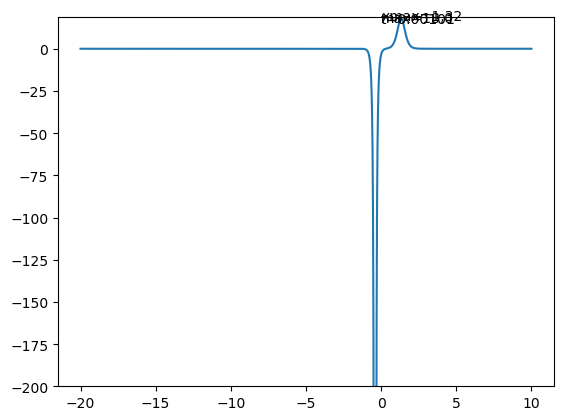

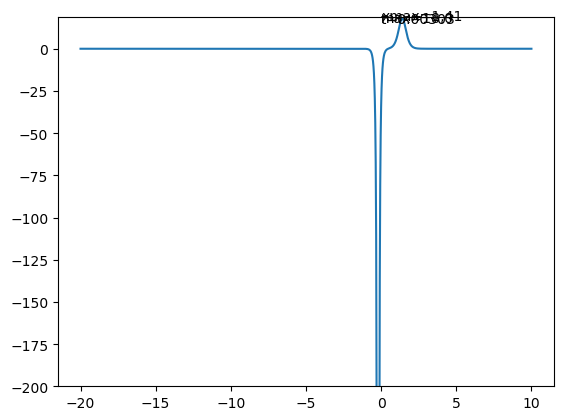

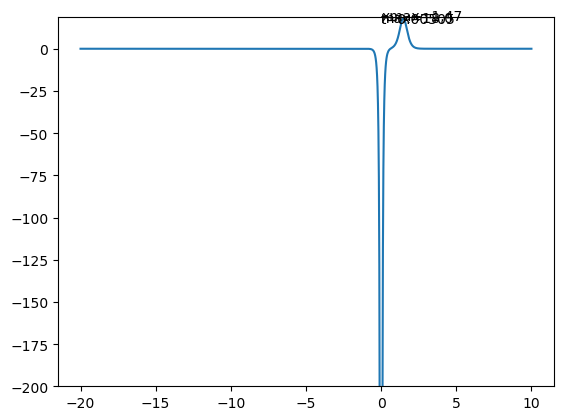

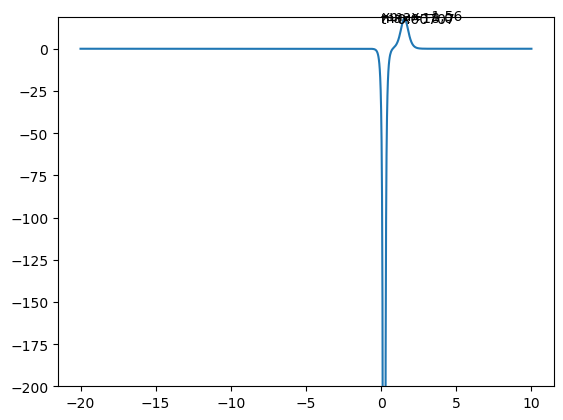

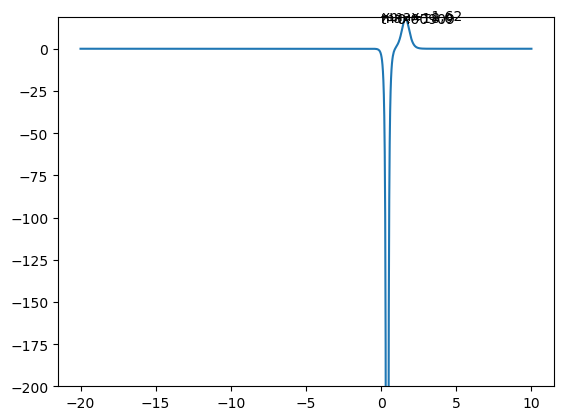

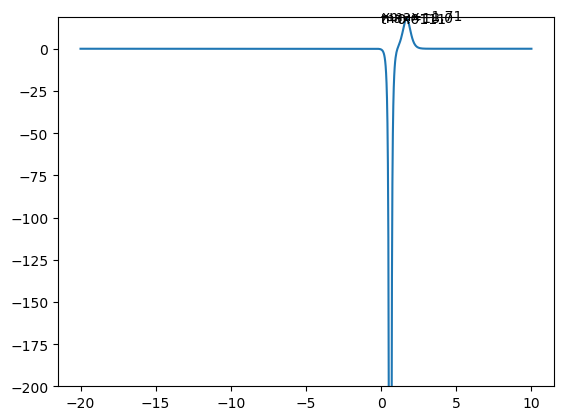

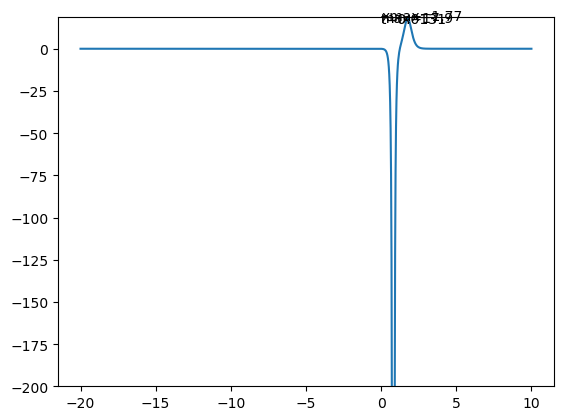

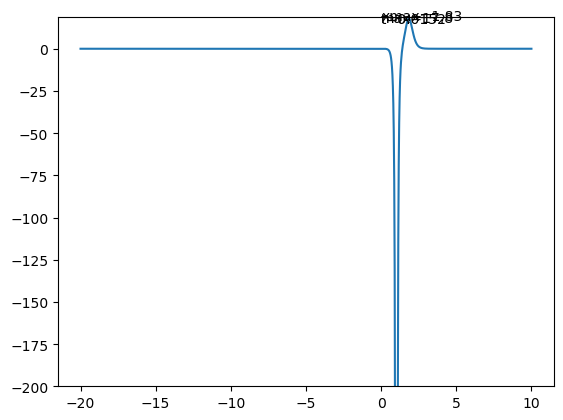

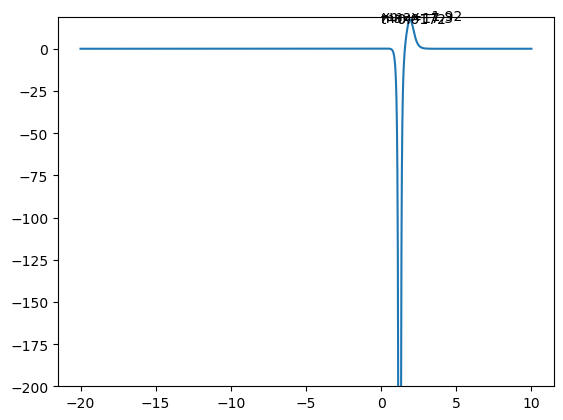

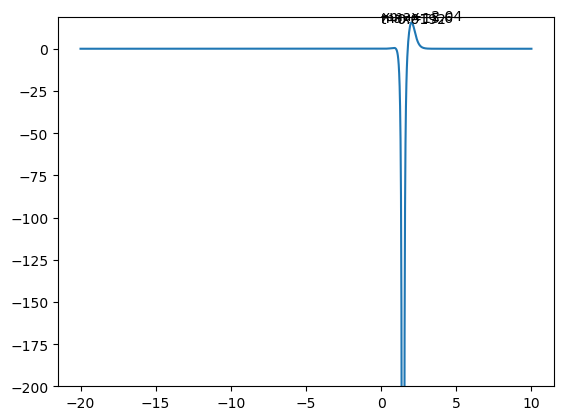

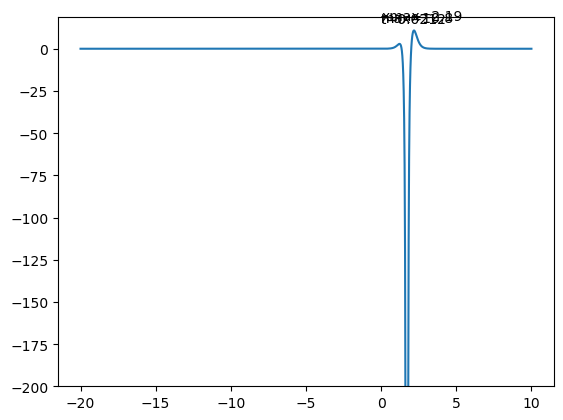

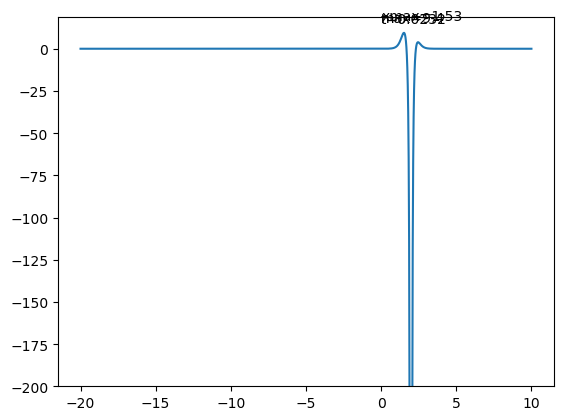

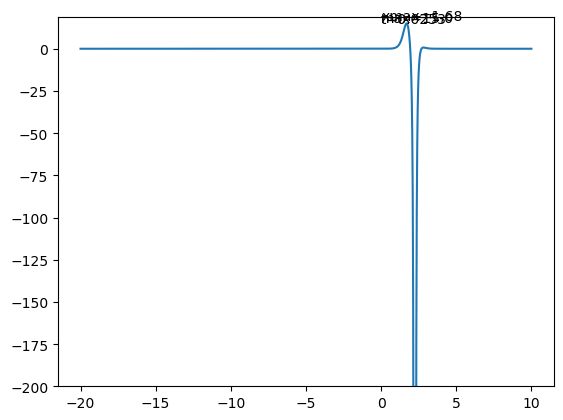

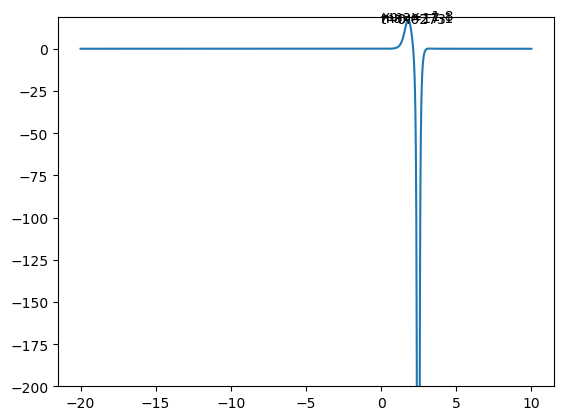

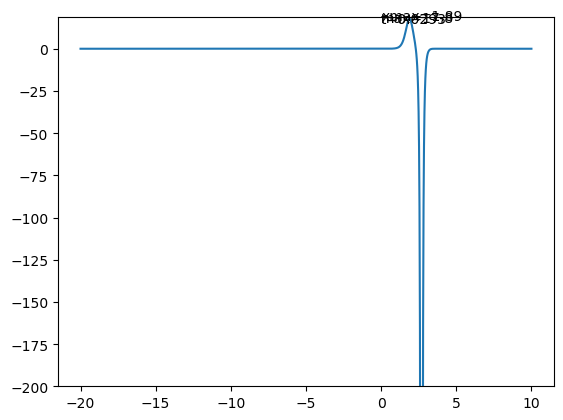

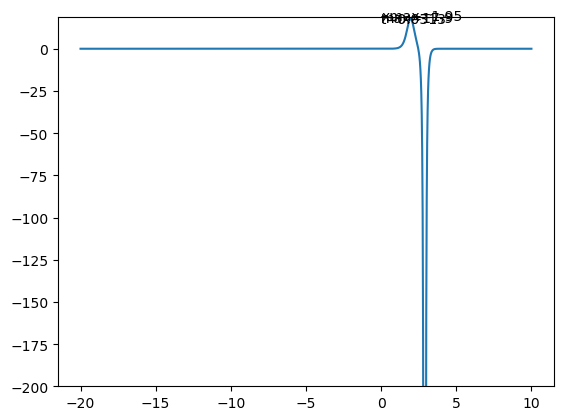

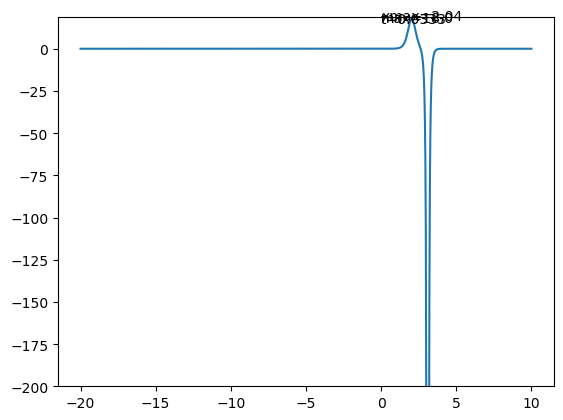

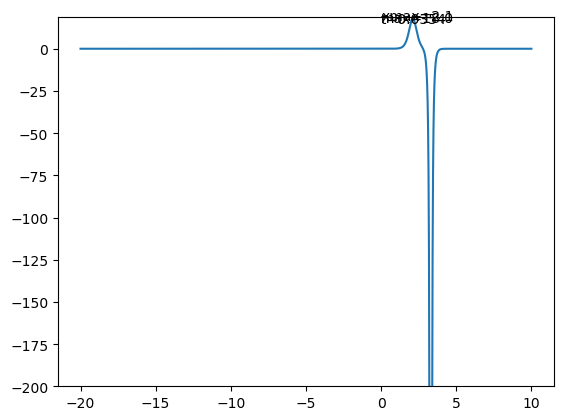

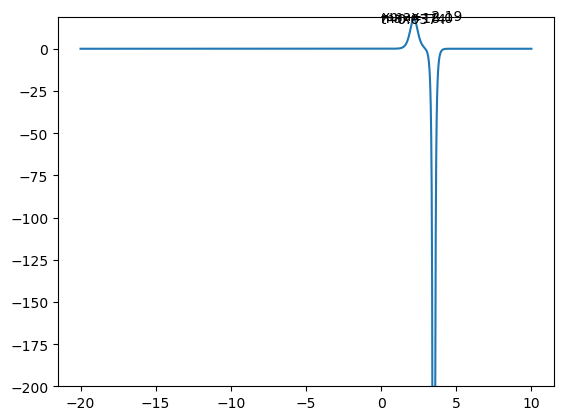

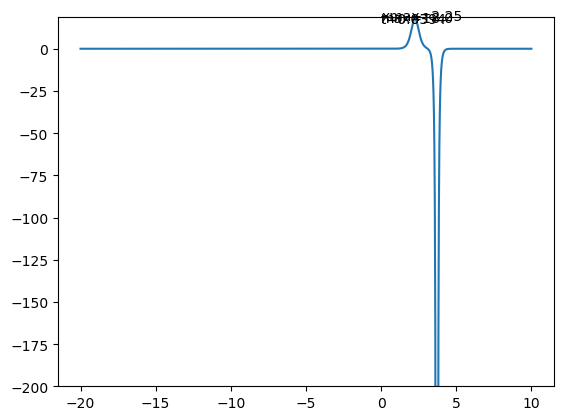

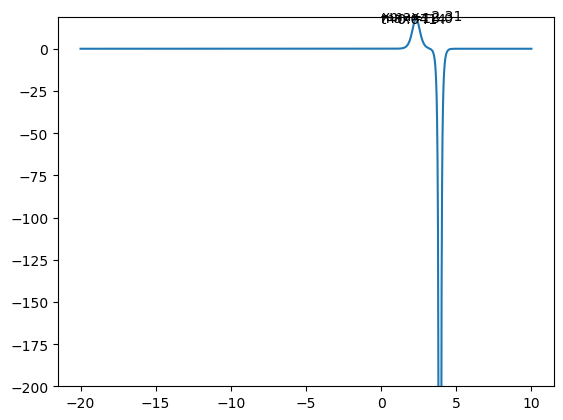

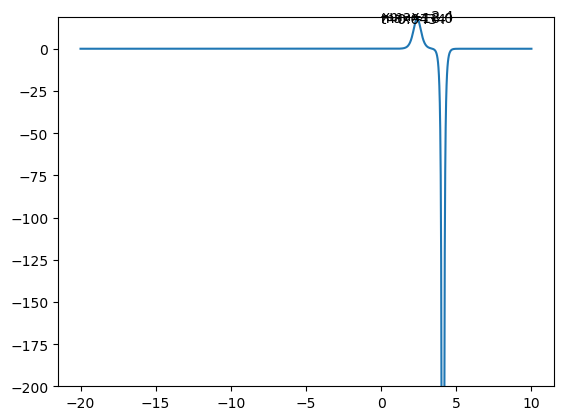

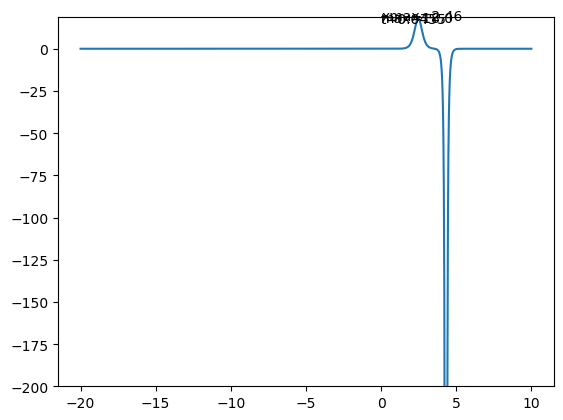

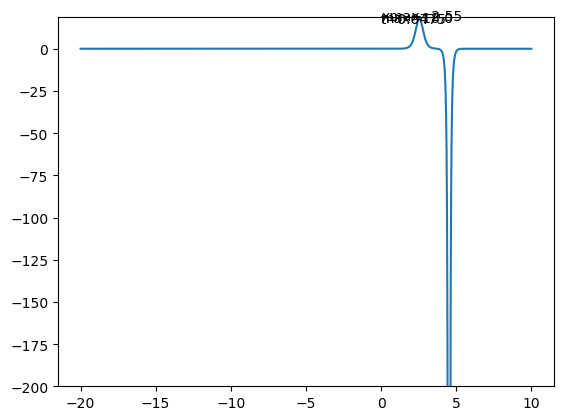

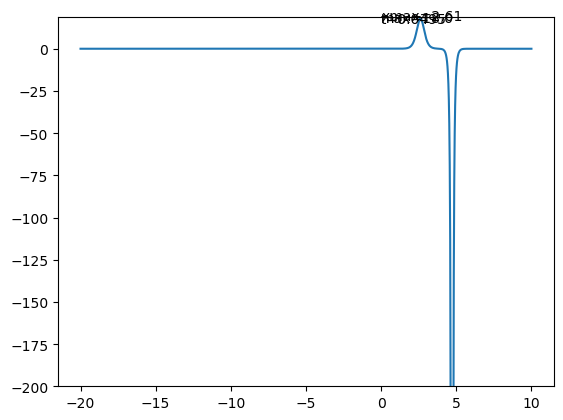

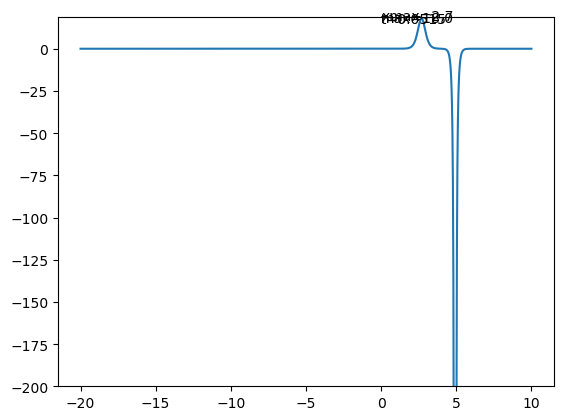

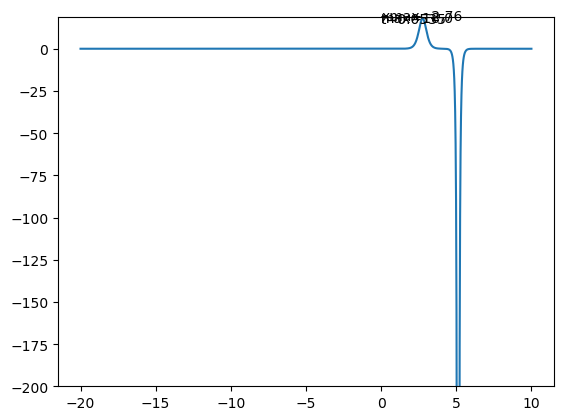

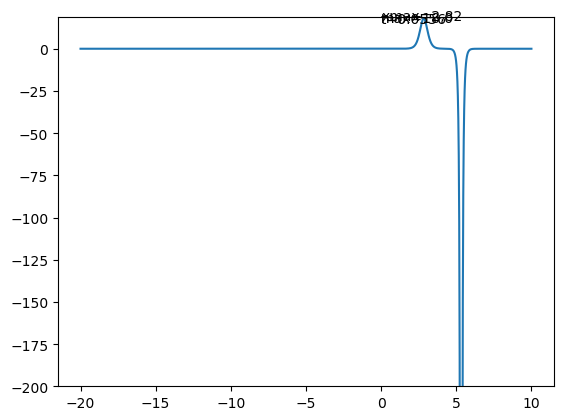

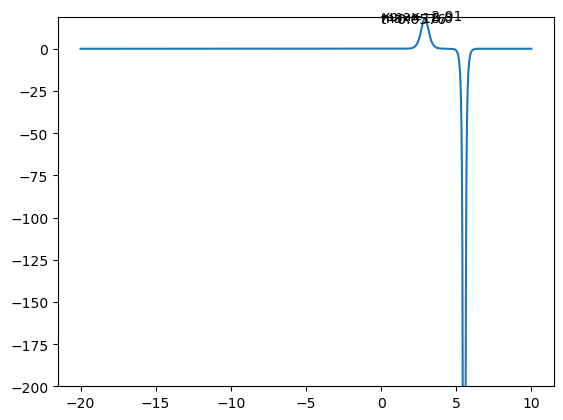

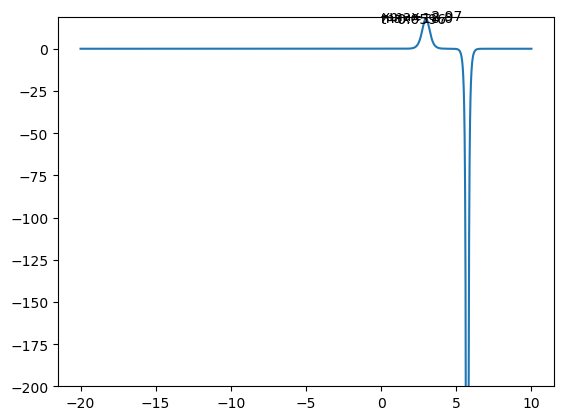

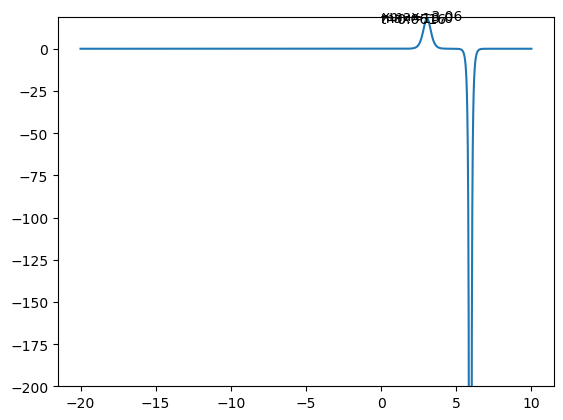

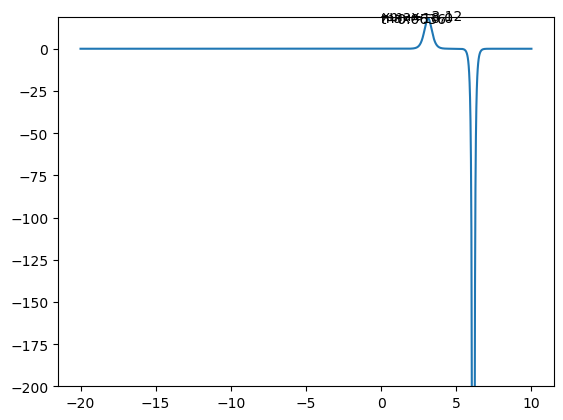

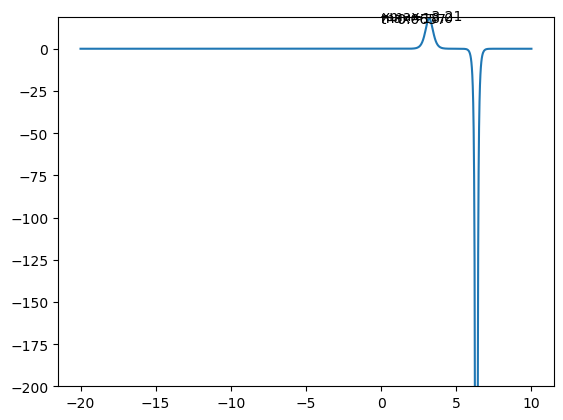

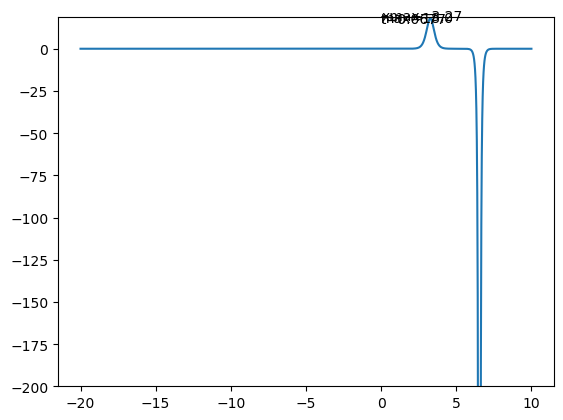

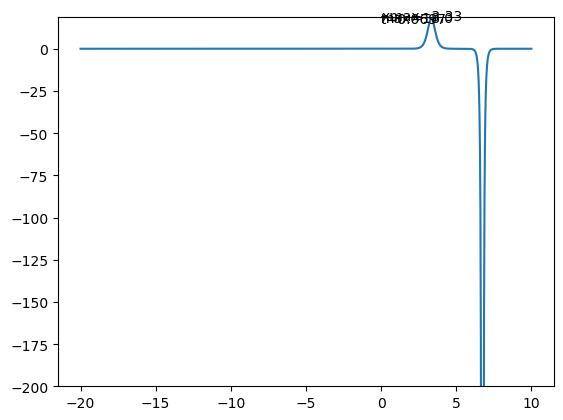

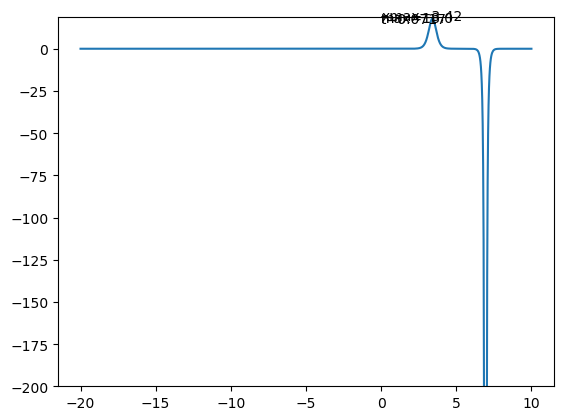

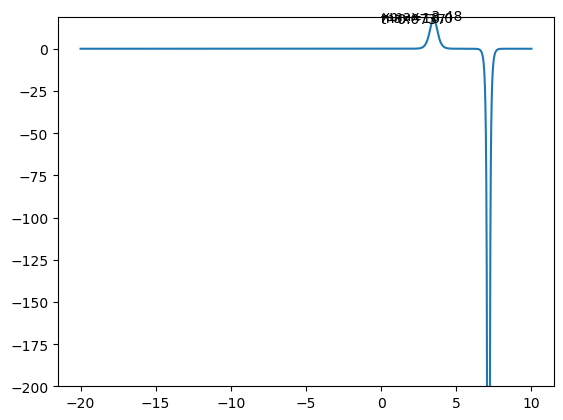

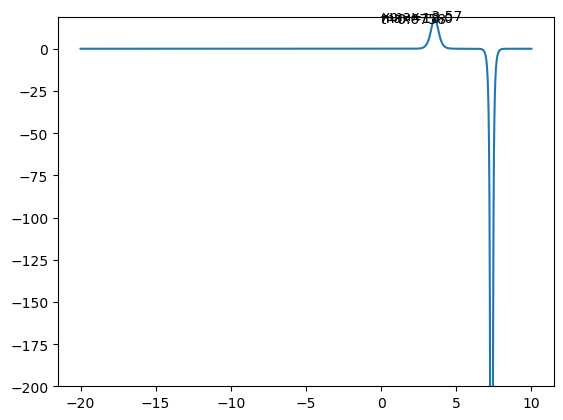

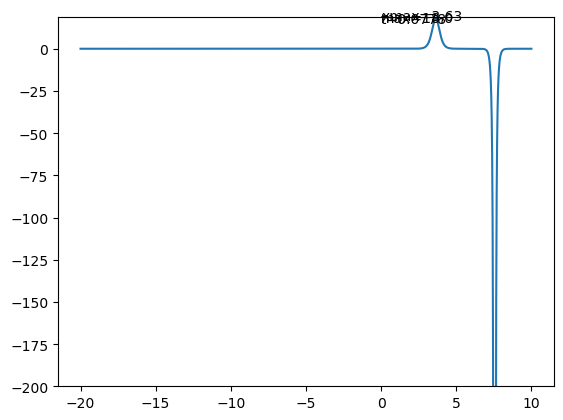

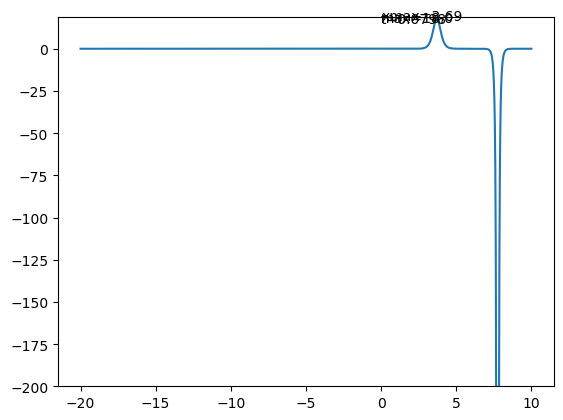

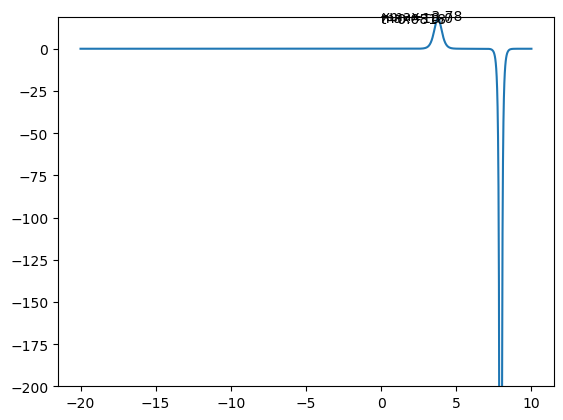

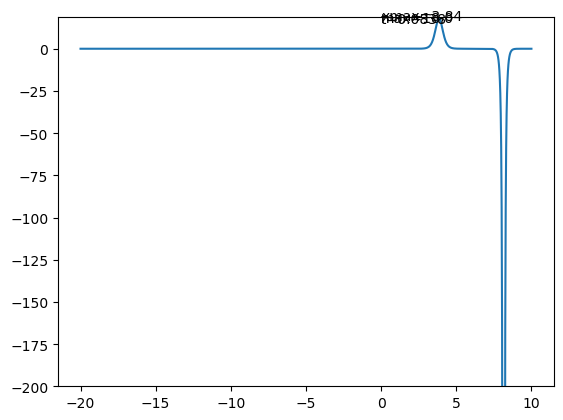

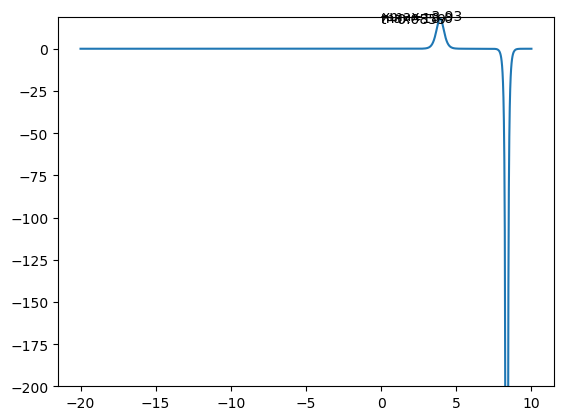

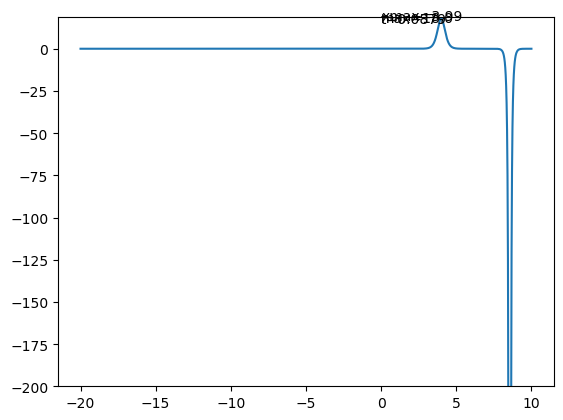

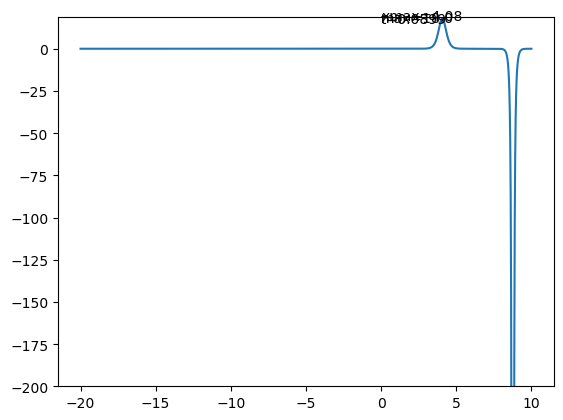

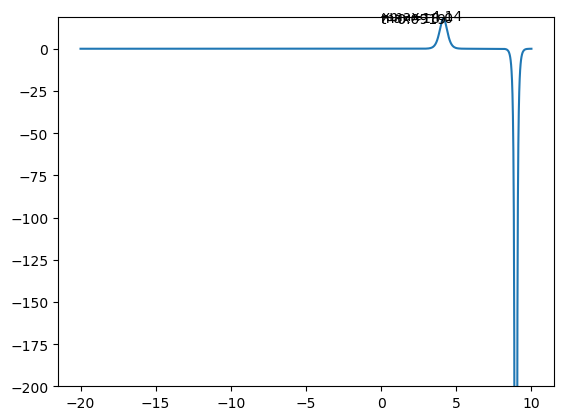

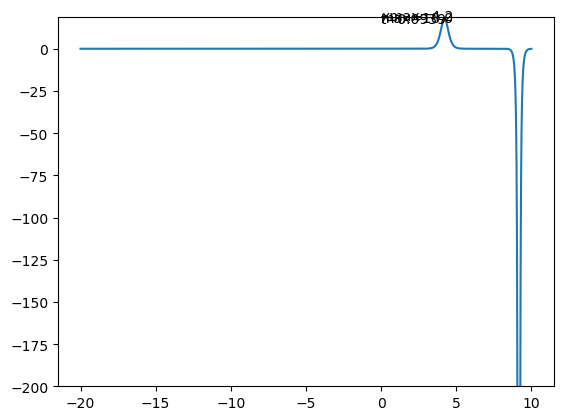

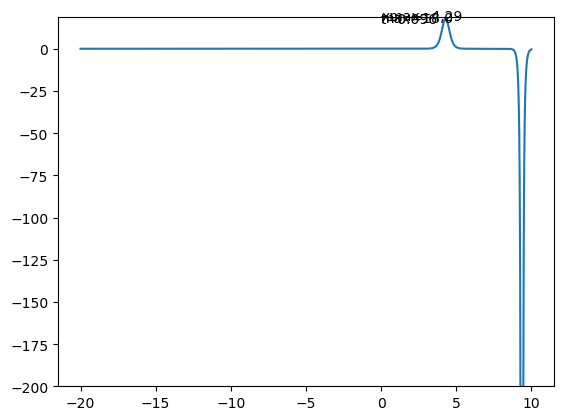

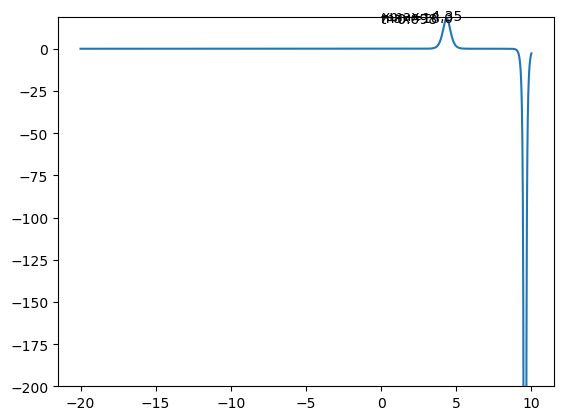

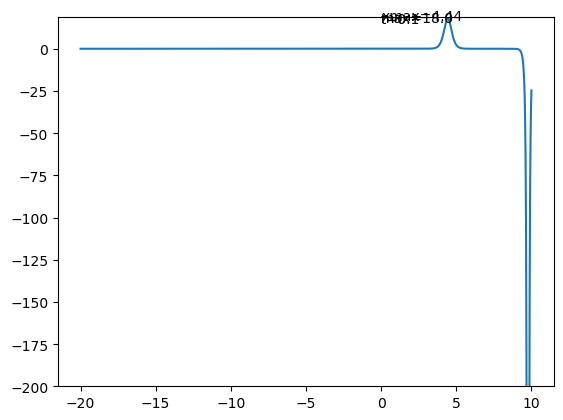

In [59]:
kappa1 = -5; gamma1 = -10;
kappa2 = 3; gamma2 = -30;

tarr = np.linspace(-0.1, 0.1, 100)

umaxarr = []
xmaxarr = []


Nx = 1000
xarr = np.linspace(-20, 10, Nx)
uarr = np.zeros(Nx)

for t in tarr:
    j = 0
    for x in xarr:
        matrix_size = 2

        Mat = np.zeros((2,3), dtype=float)

        theta1 = np.real(2j*theta(x, t, 1j*kappa1))
        if ( theta1 <= 0):
            exp1 = np.exp(theta1)
            Mat[0][0] = 1 + exp1 * gamma1**2 / (2*kappa1)
            Mat[0][1] = exp1 * gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2 * exp1
        else:
            exp1 = np.exp(-theta1)
            Mat[0][0] = exp1 + gamma1**2 / (2*kappa1)
            Mat[0][1] = gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2

        theta2 = np.real(2j*theta(x, t, 1j*kappa2))
        if (theta2 <= 0):
            exp2 = np.exp(theta2)
            Mat[1][0] = exp2 * gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = 1 + exp2 * gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2 * exp2
        else:
            exp2 = np.exp(-theta2)
            Mat[1][0] = gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = exp2 + gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2
    
        alphas = np.linalg.solve(Mat[:, :2], Mat[:, 2])
        alphas

        u = 4 * (alphas[0] * kappa1 + alphas[1] * kappa2) - 2 * (alphas[0] + alphas[1])**2
        uarr[j] = u
        j += 1
    plt.plot(xarr, uarr)    
    plt.ylim((-200, 19))
    plt.text(0, 15, "t={:.3}".format(t))
    plt.text(0, 16, "max={:.3}".format(np.max(uarr)))
    plt.text(0, 17, "xmax={:.3}".format(xarr[np.argmax(uarr)]))
    plt.show()

    umaxarr.append(np.max(uarr))
    xmaxarr.append(xarr[np.argmax(uarr)])

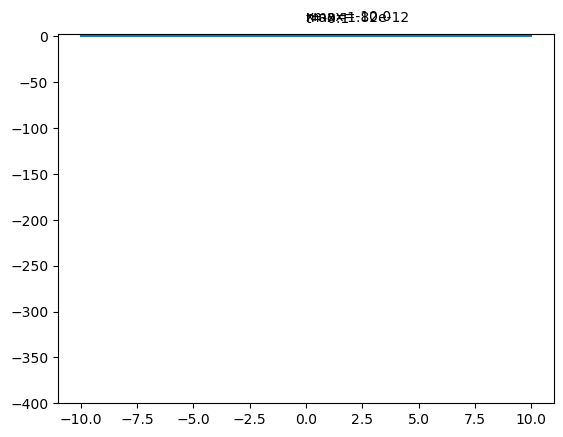

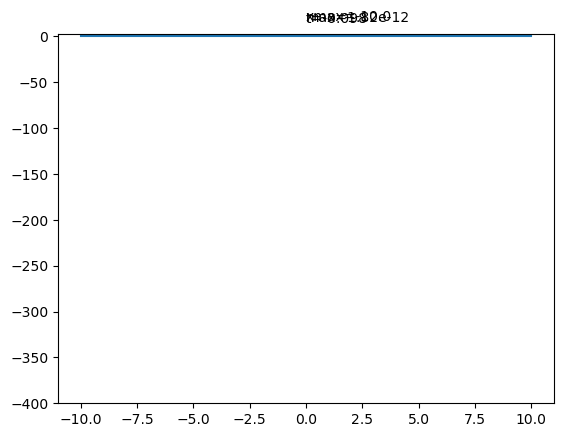

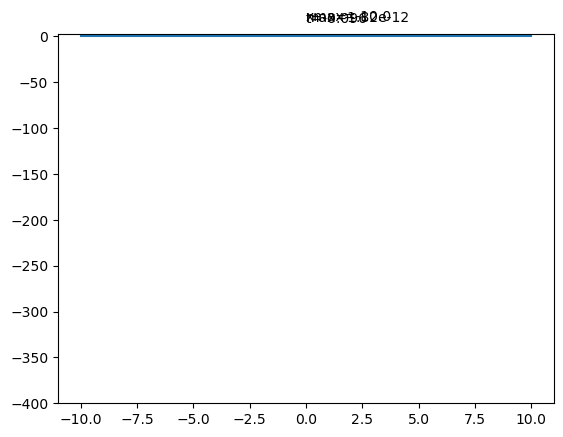

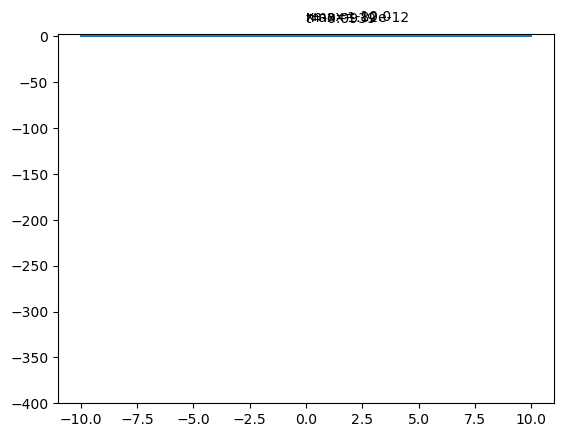

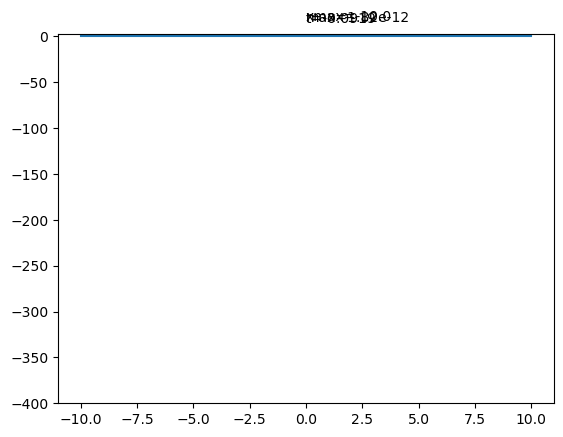

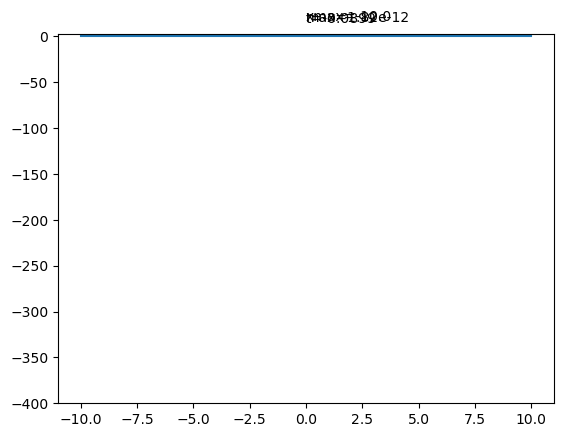

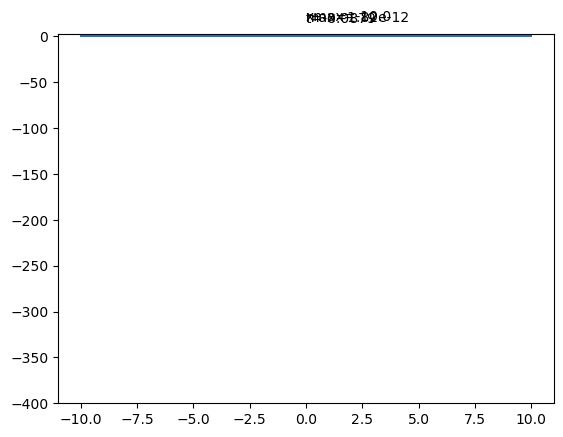

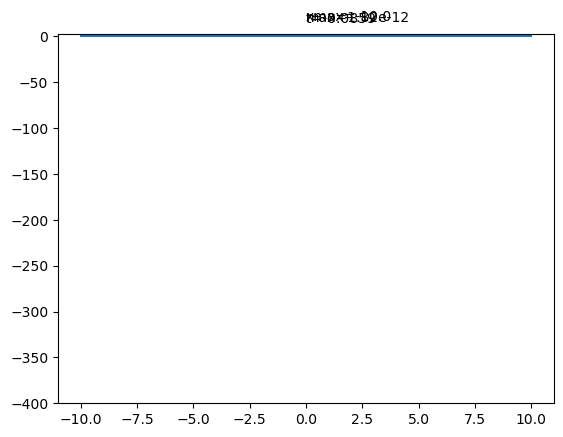

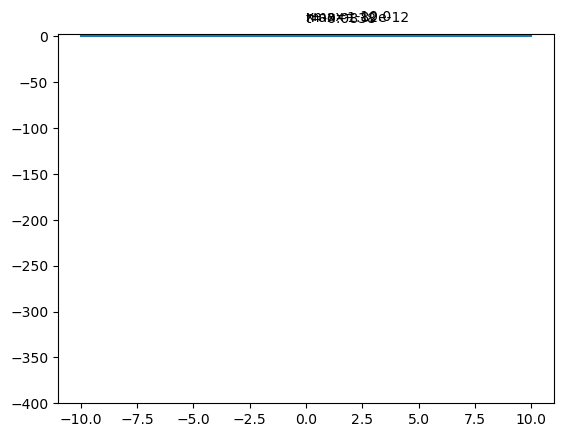

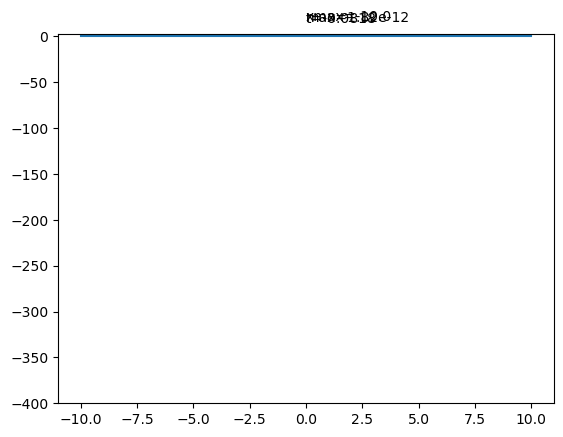

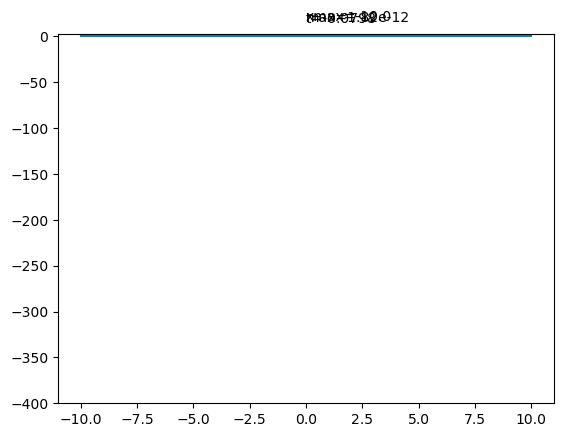

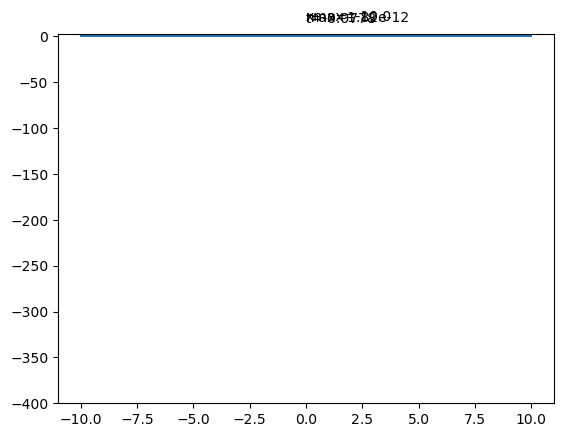

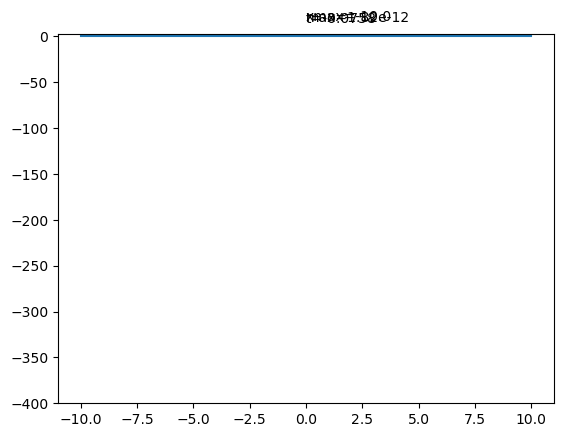

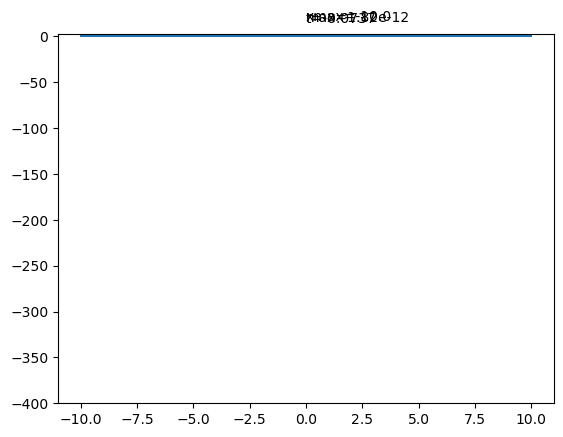

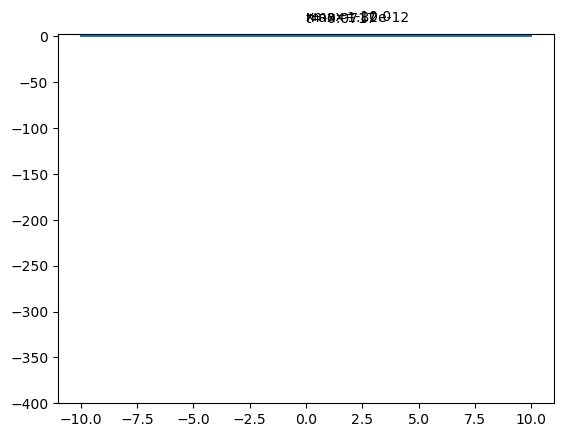

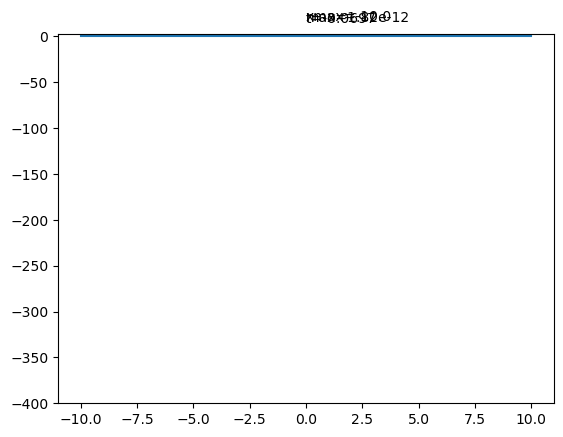

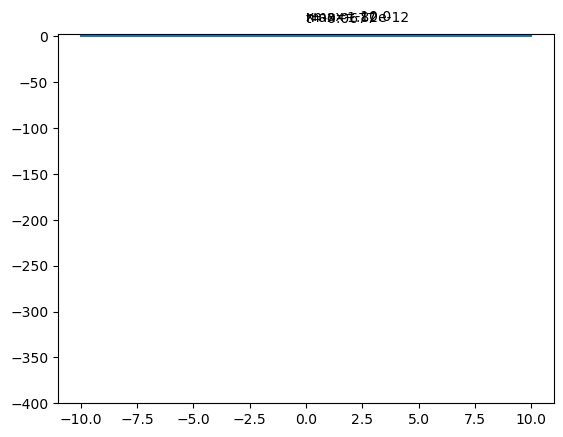

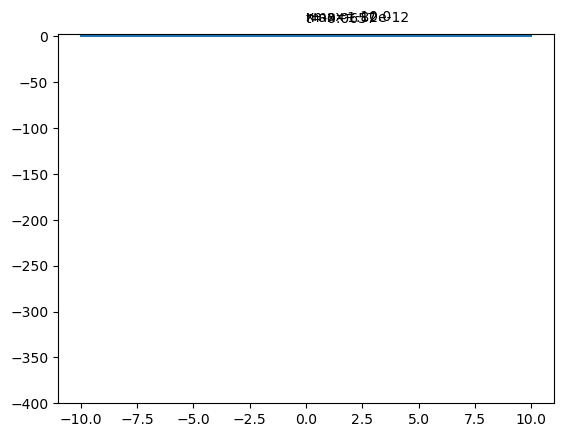

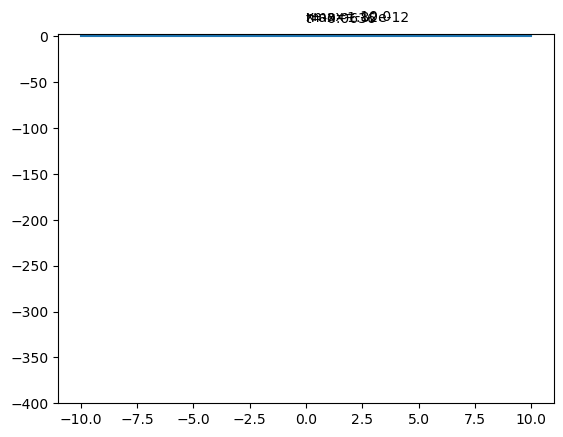

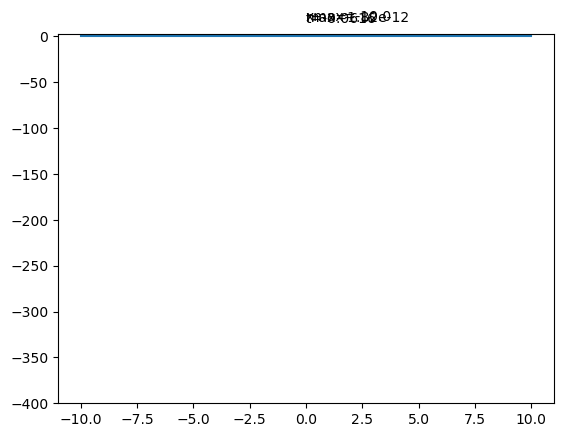

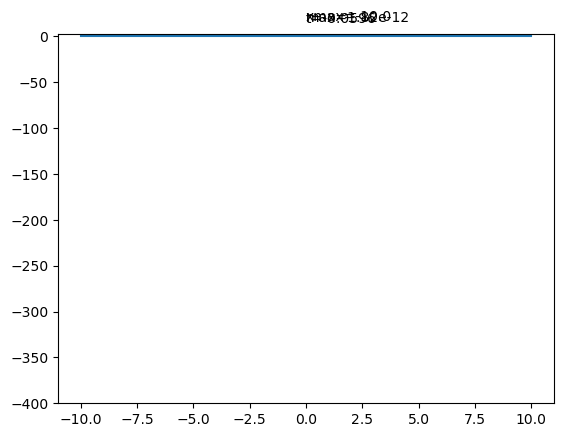

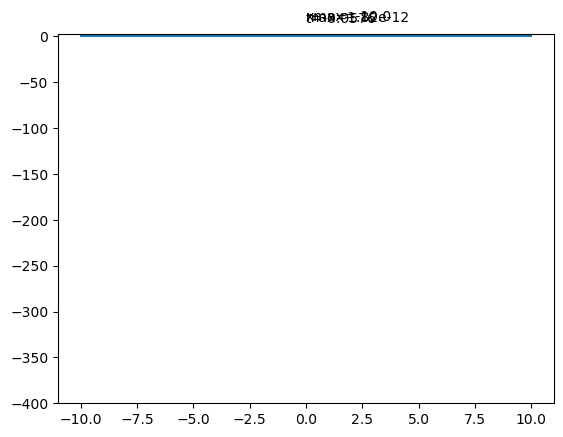

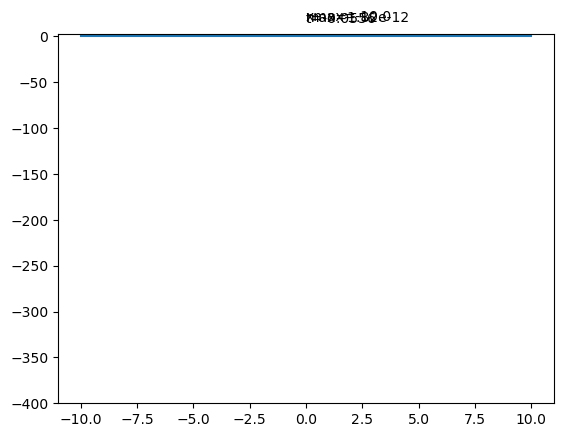

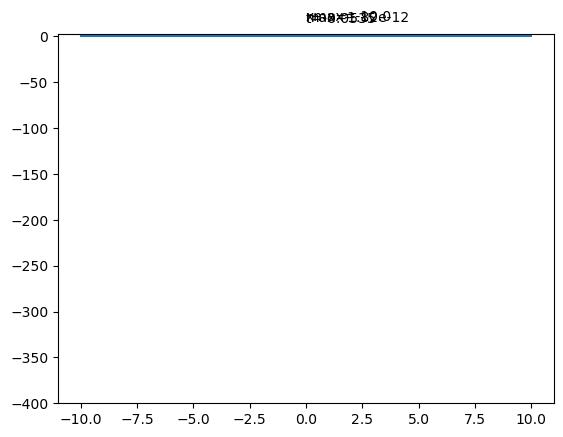

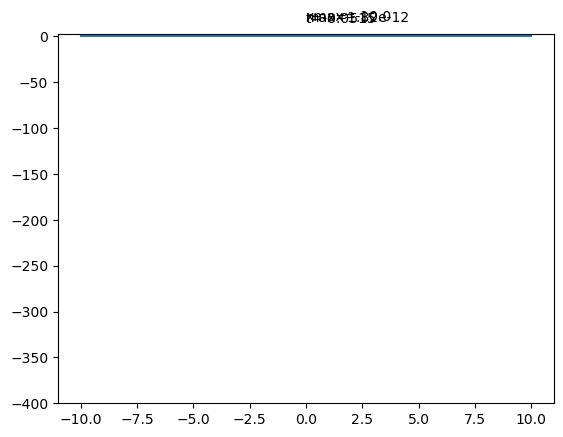

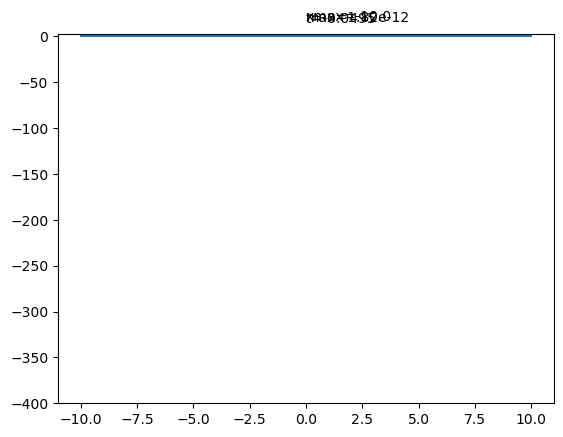

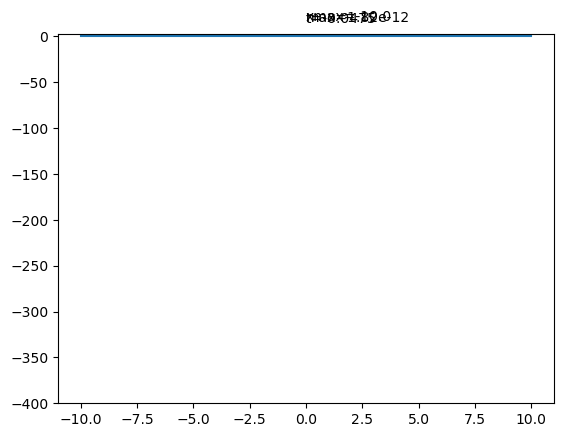

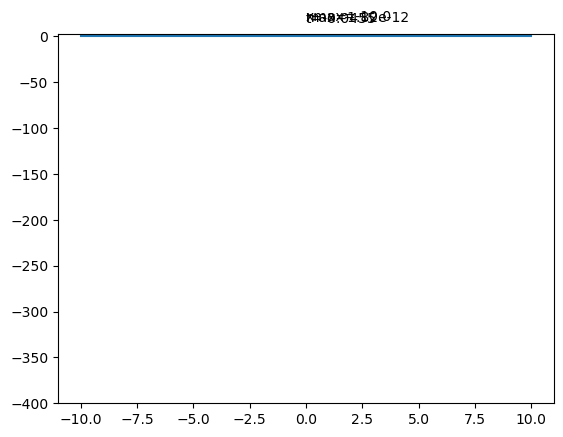

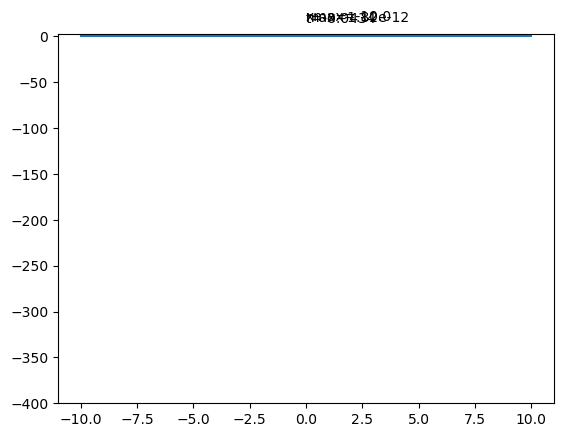

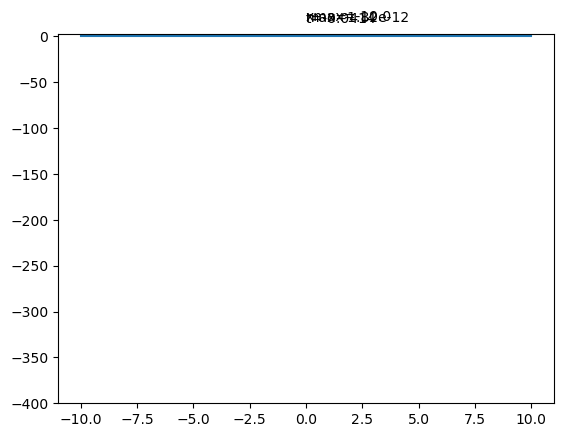

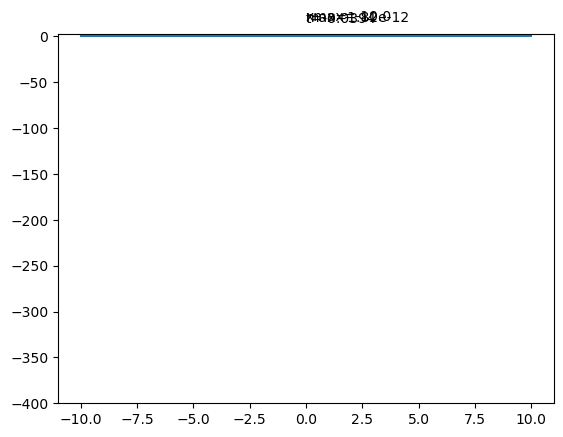

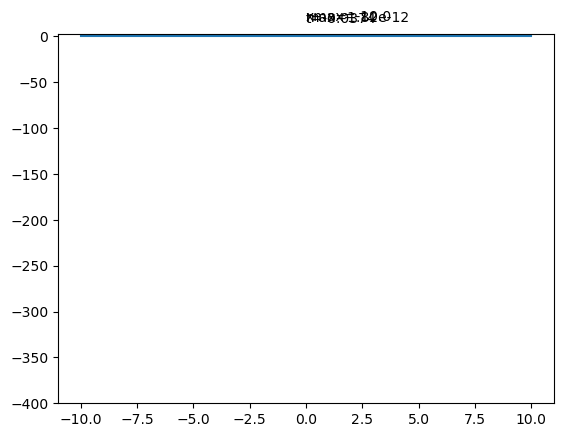

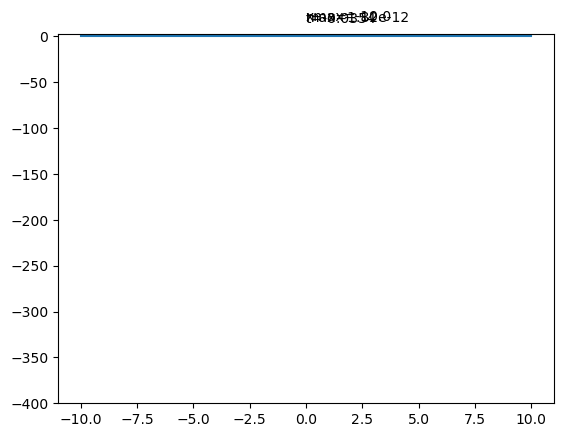

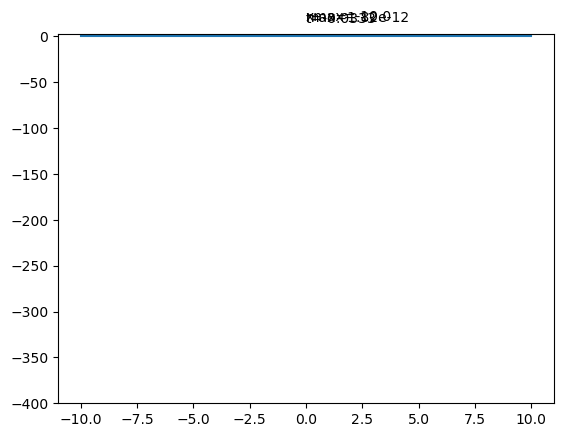

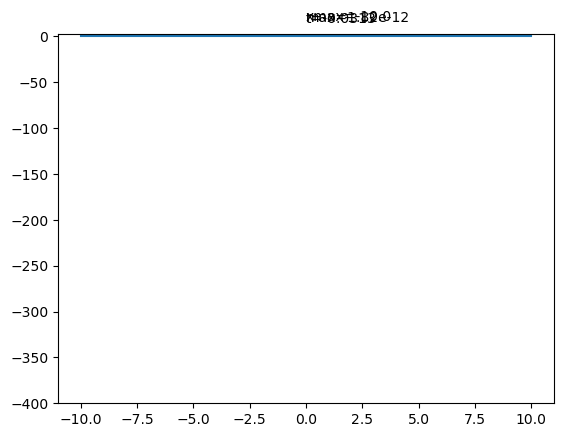

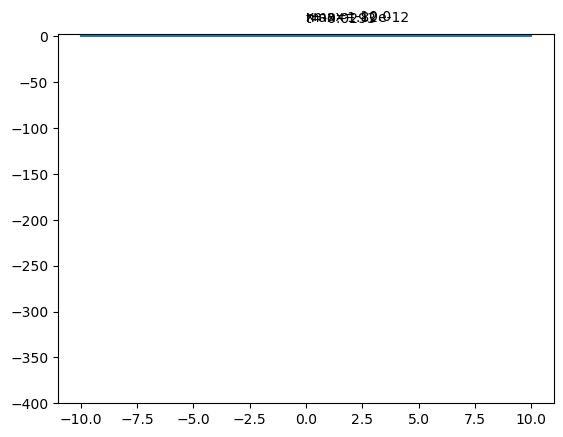

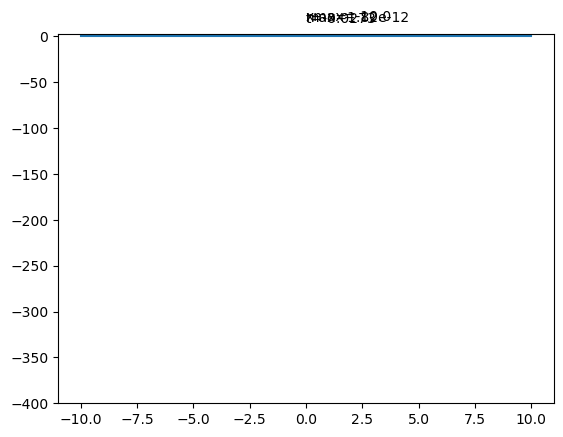

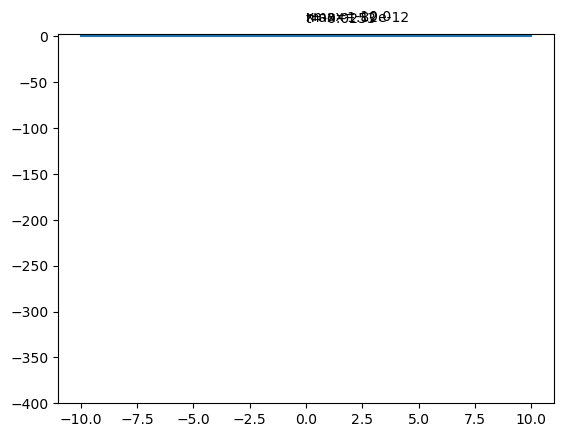

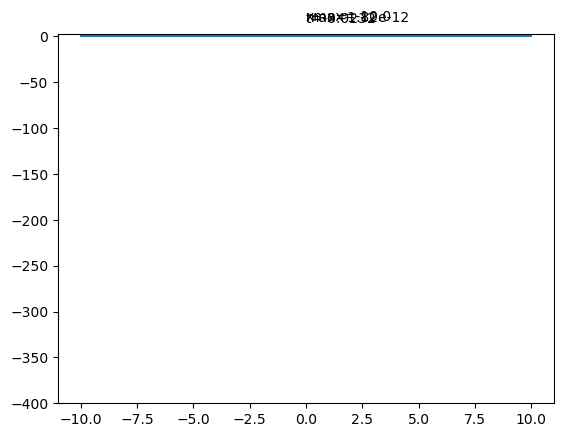

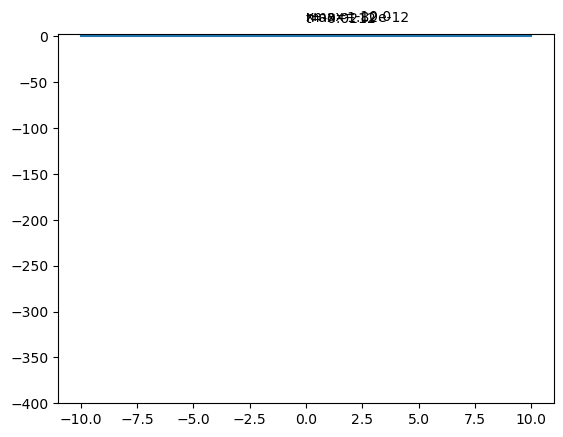

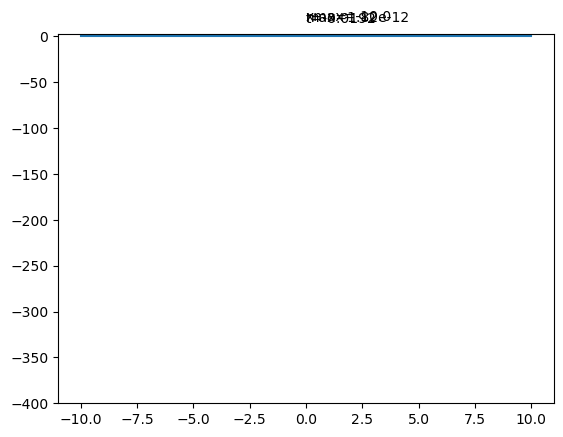

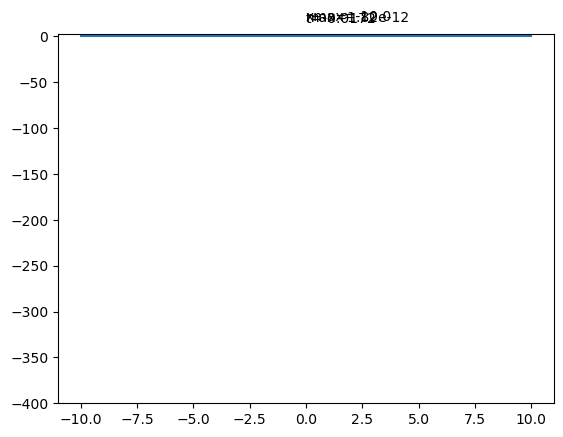

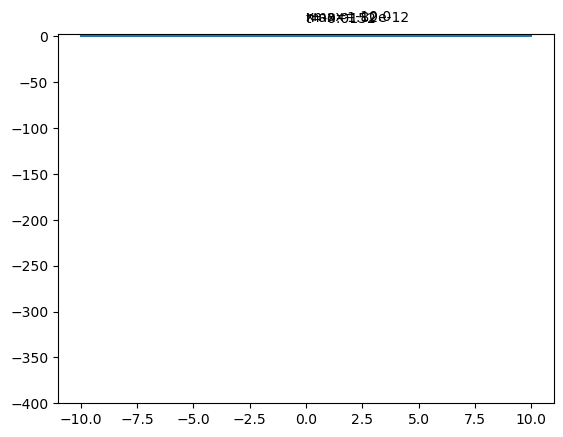

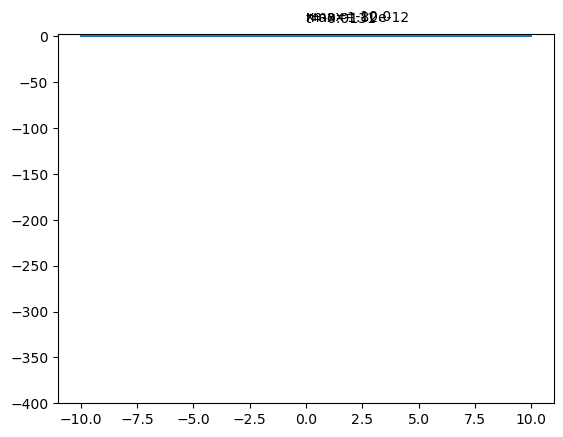

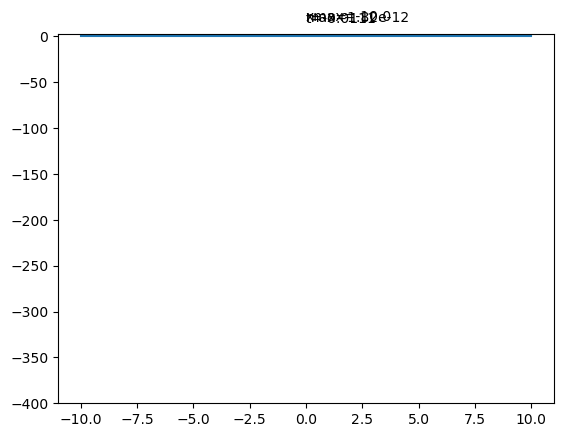

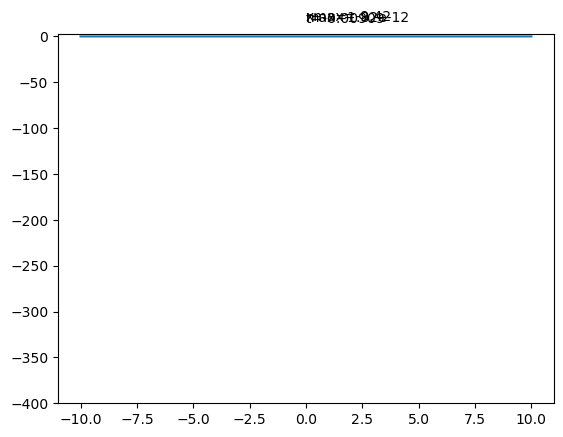

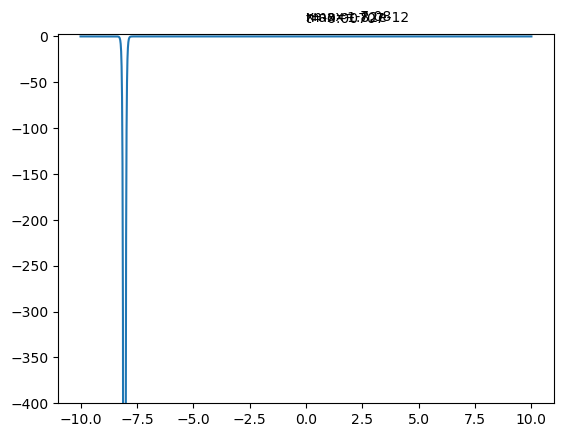

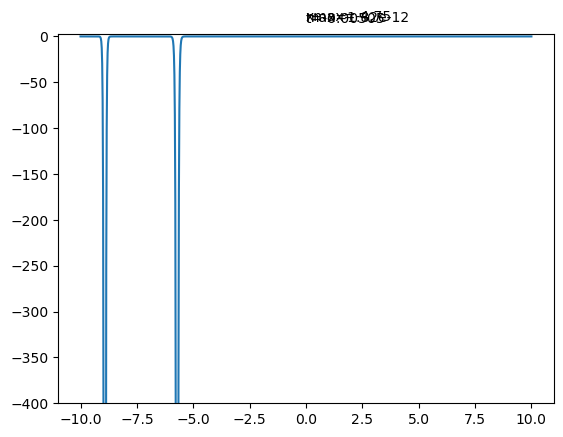

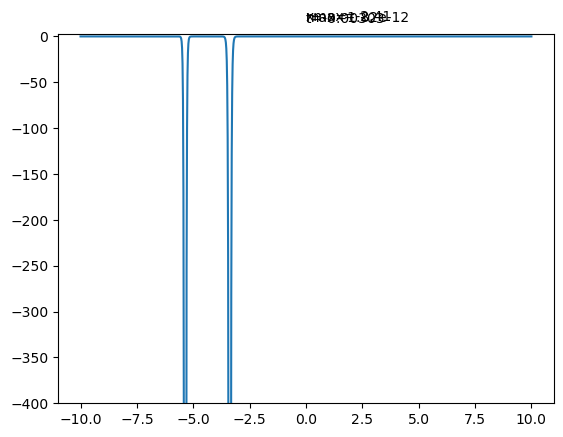

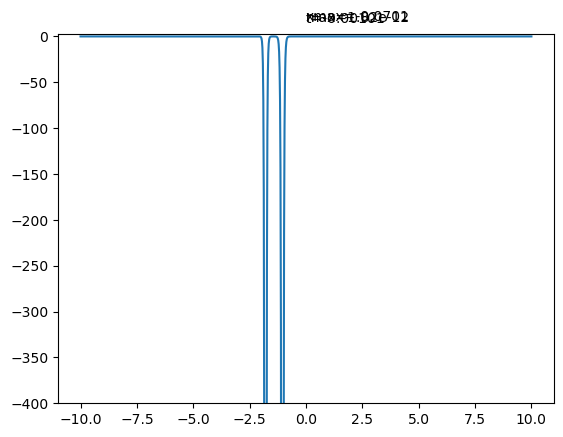

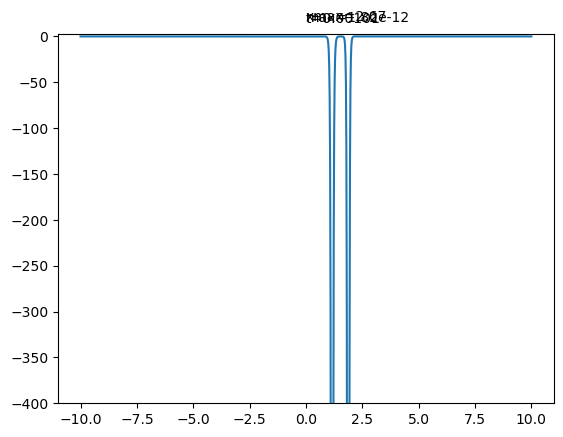

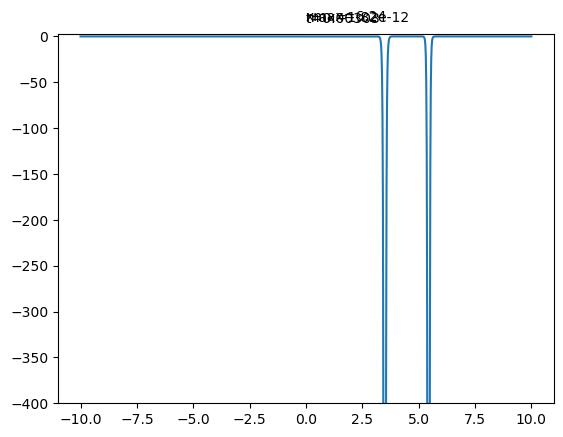

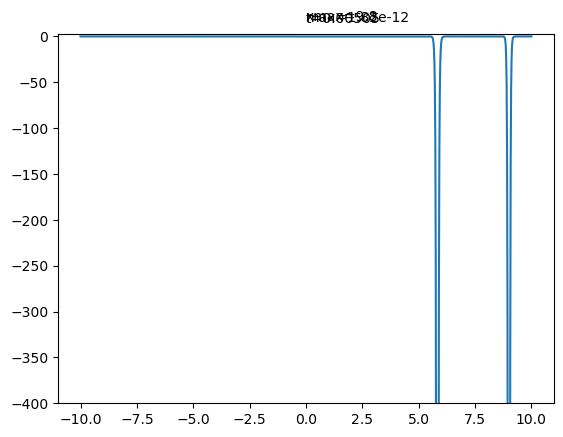

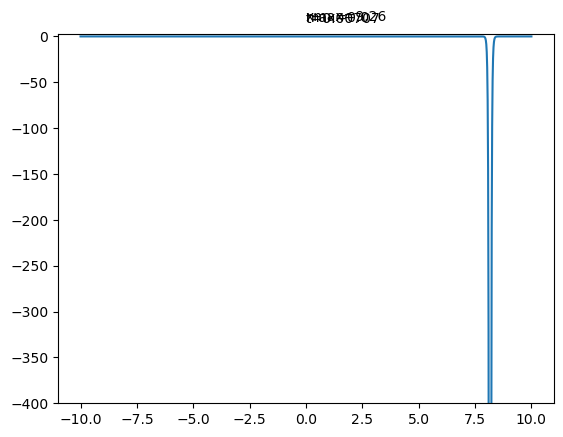

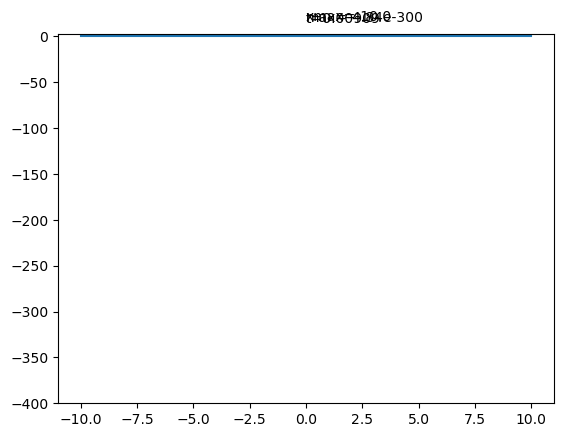

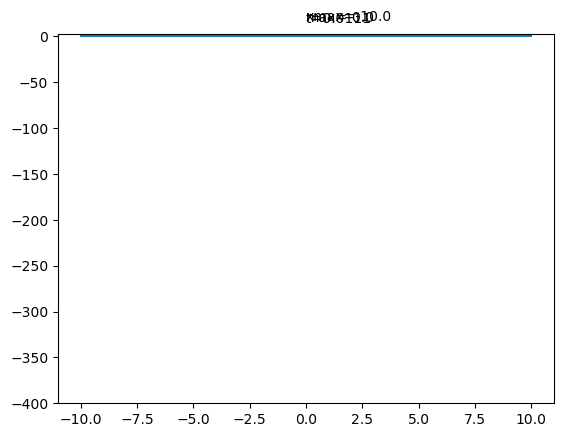

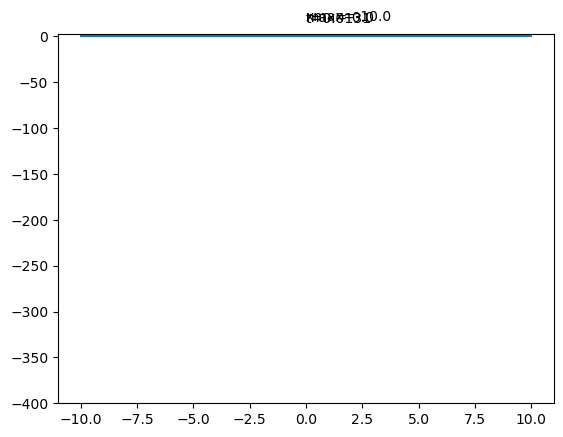

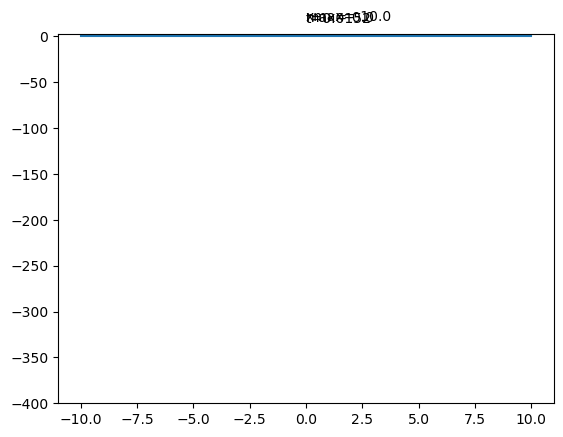

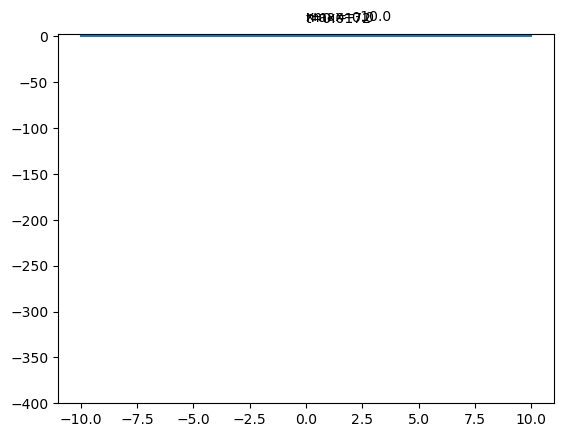

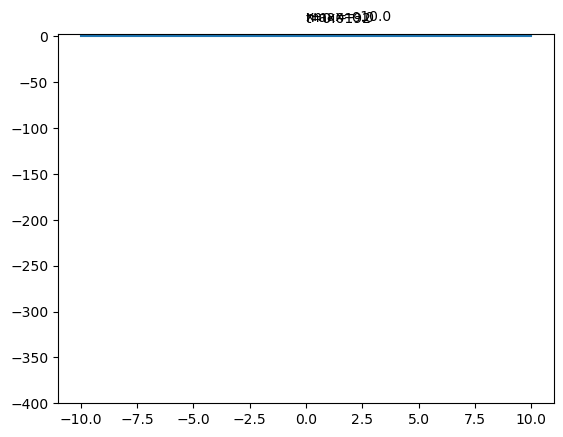

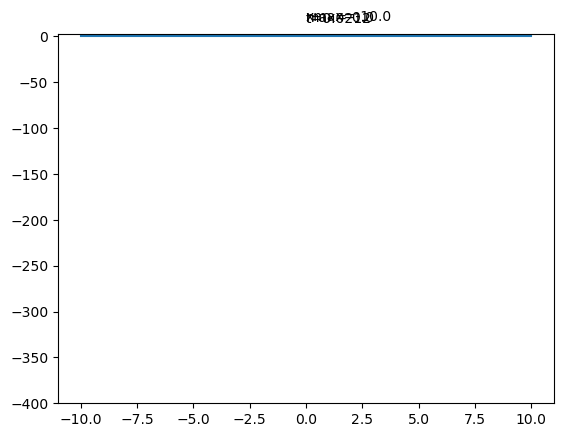

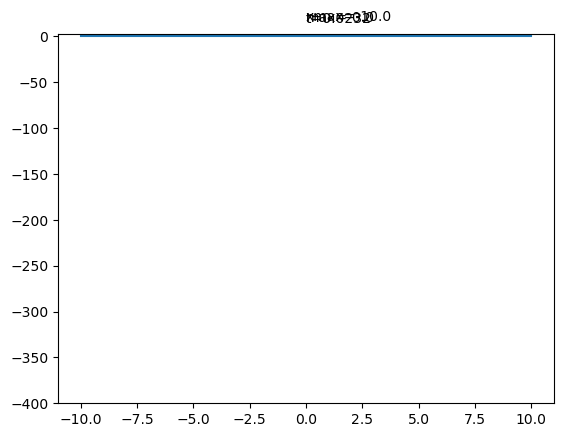

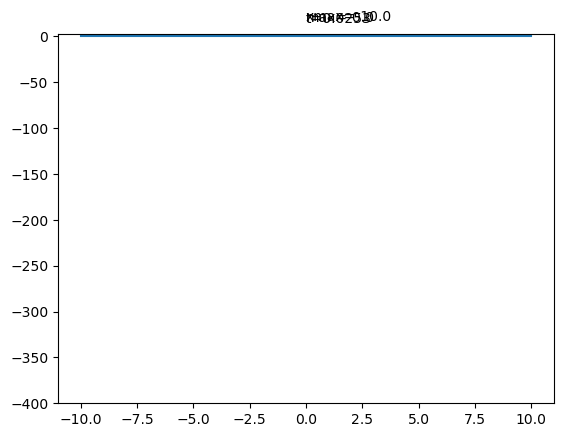

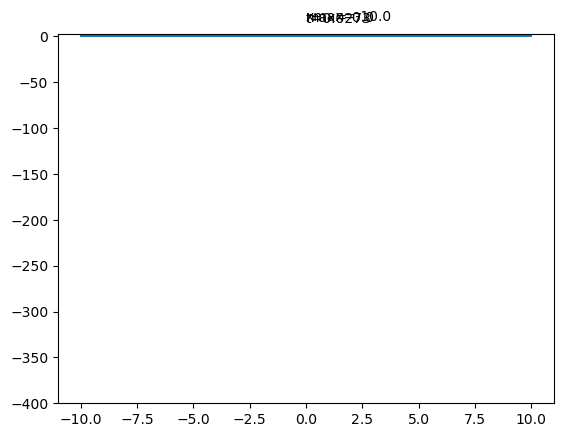

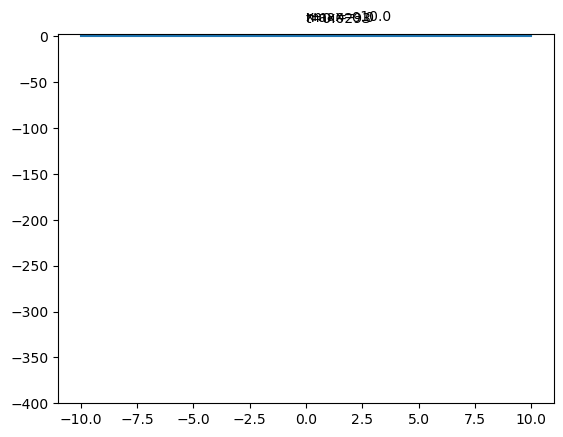

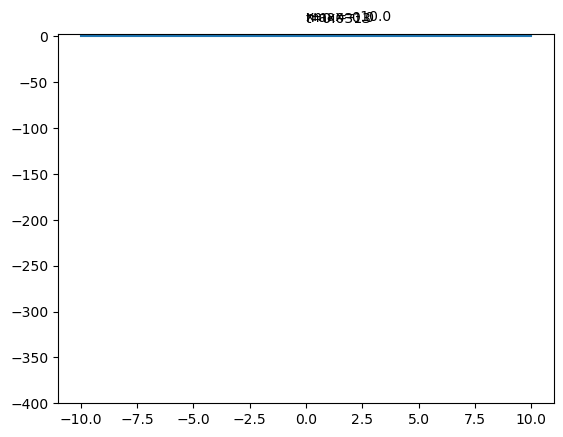

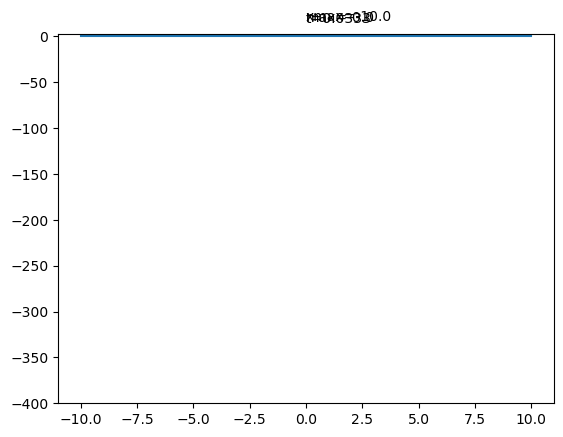

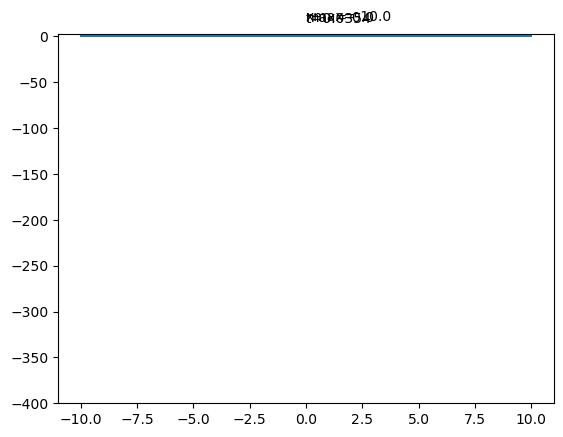

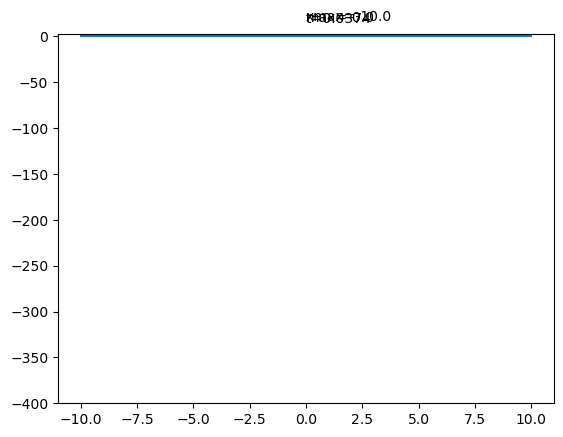

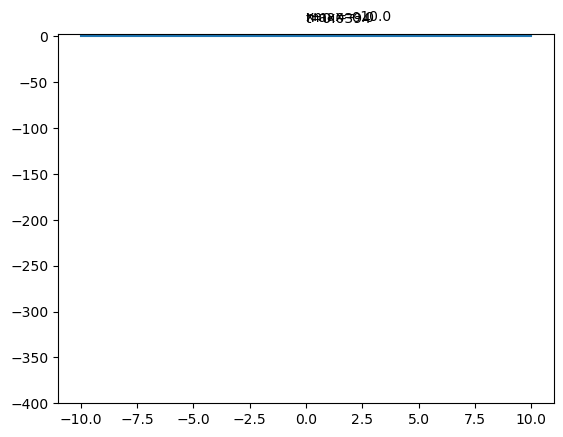

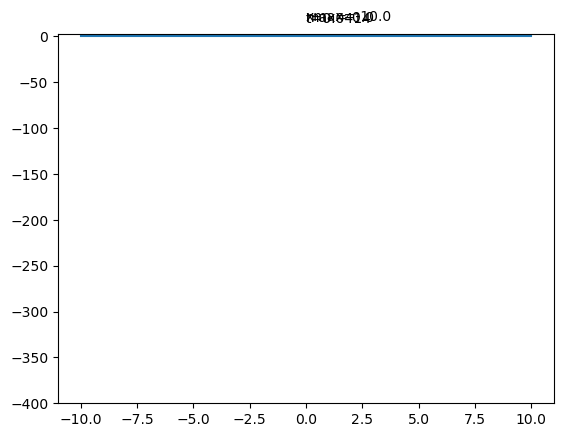

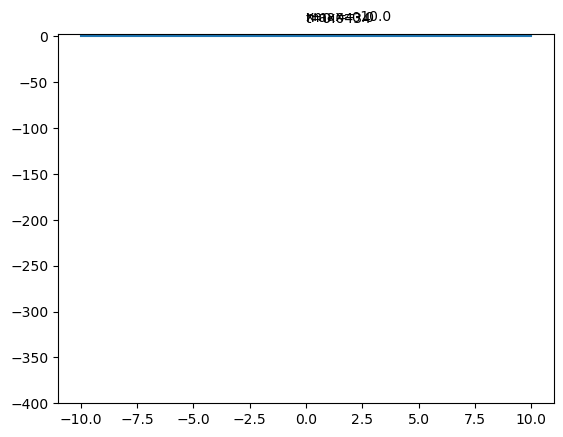

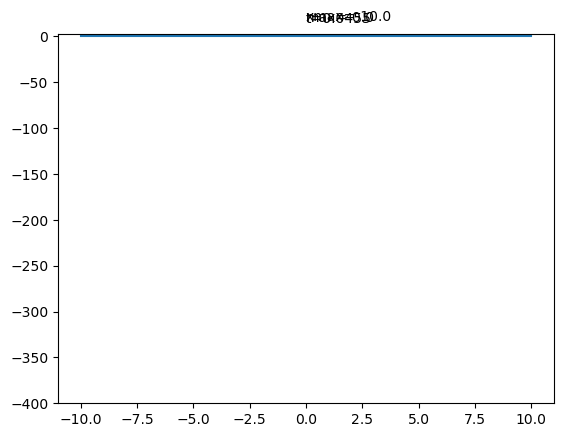

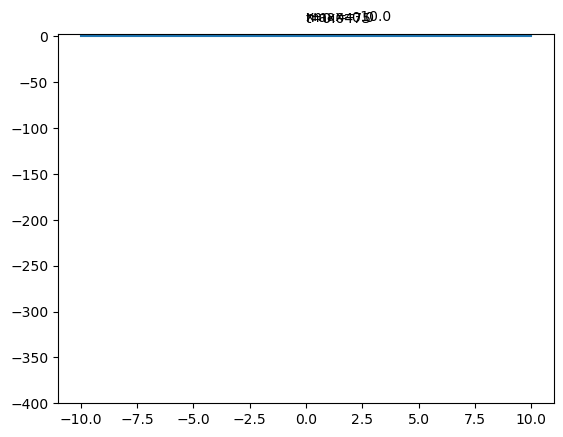

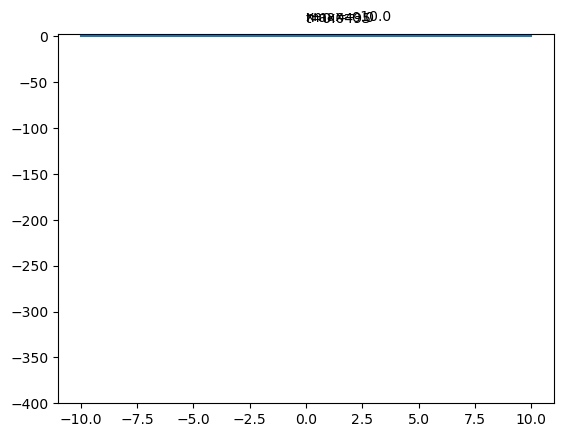

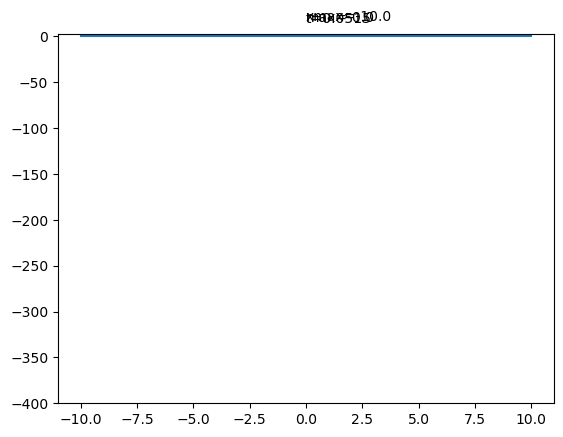

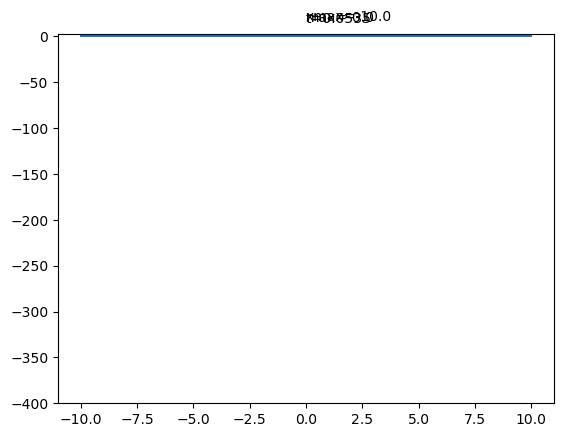

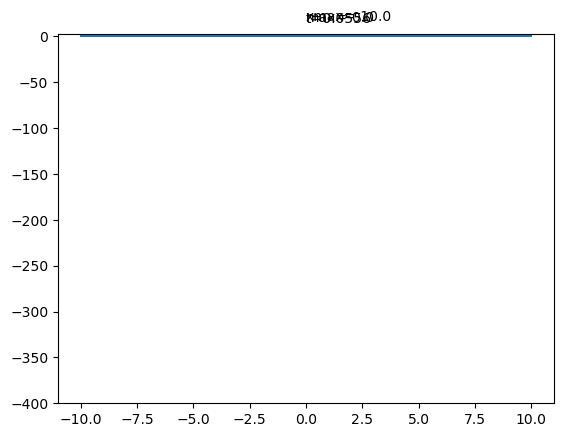

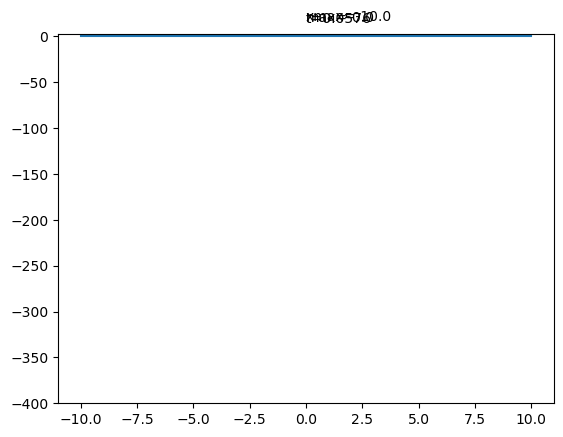

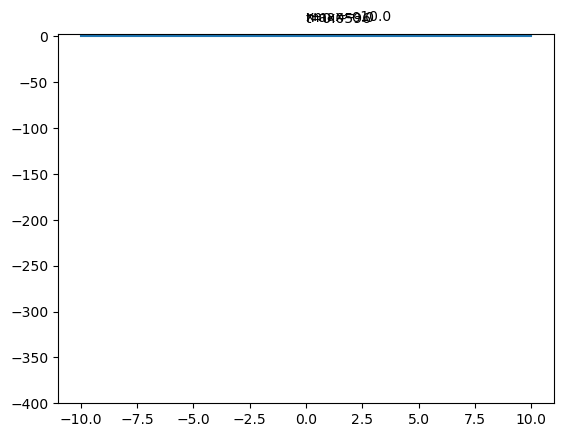

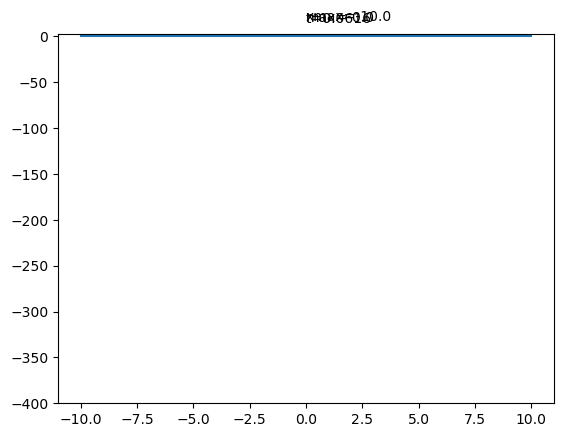

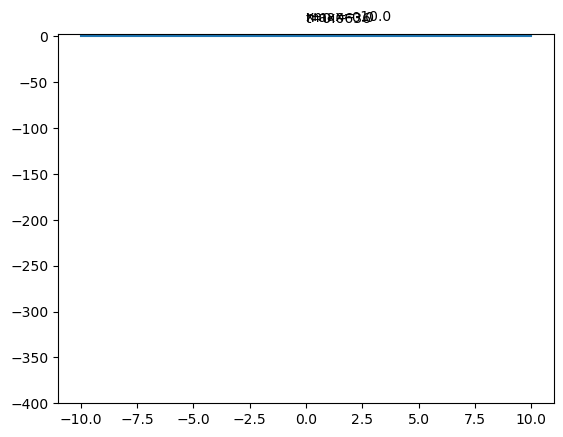

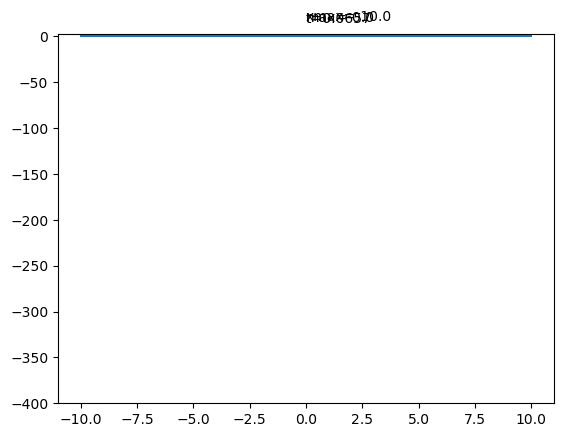

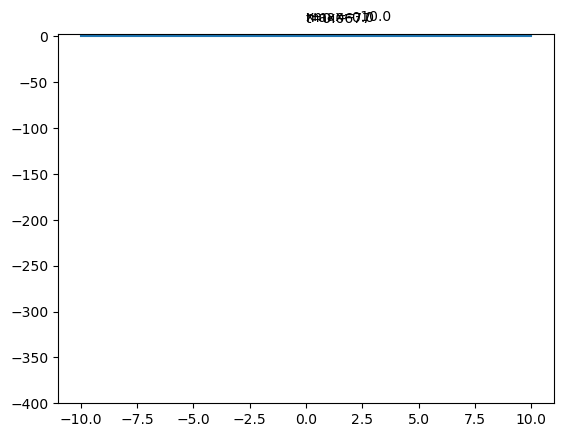

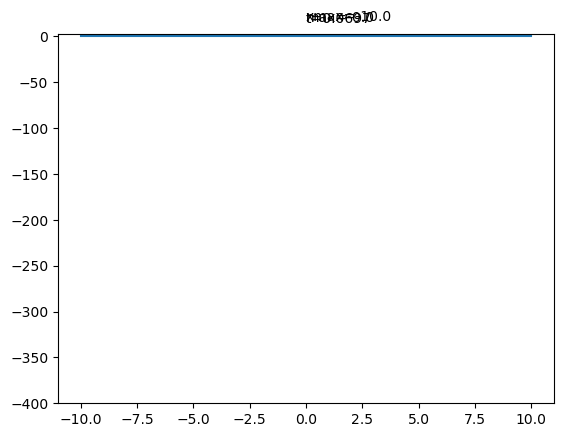

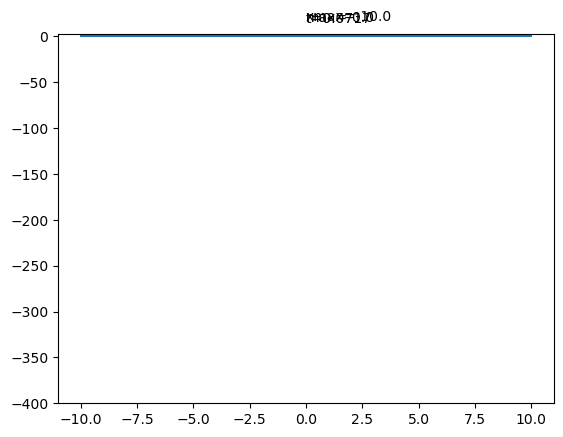

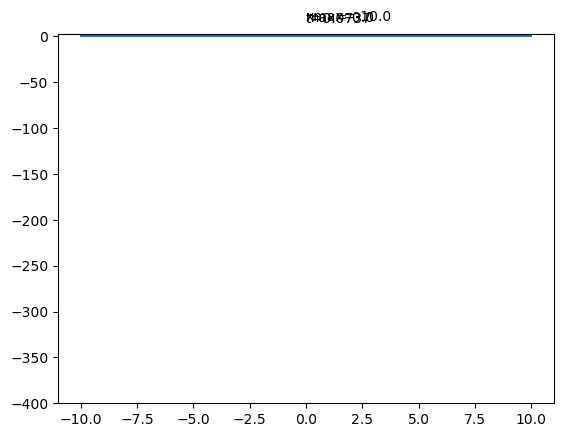

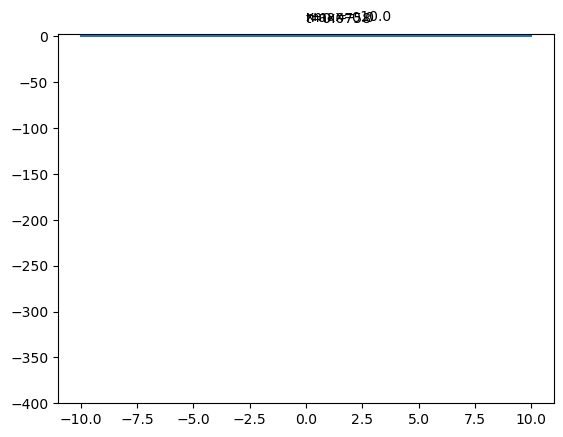

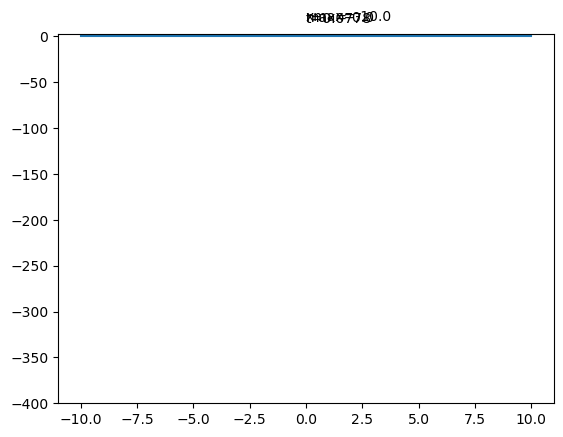

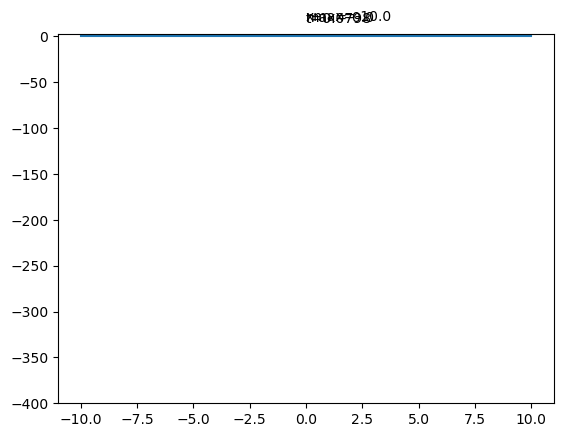

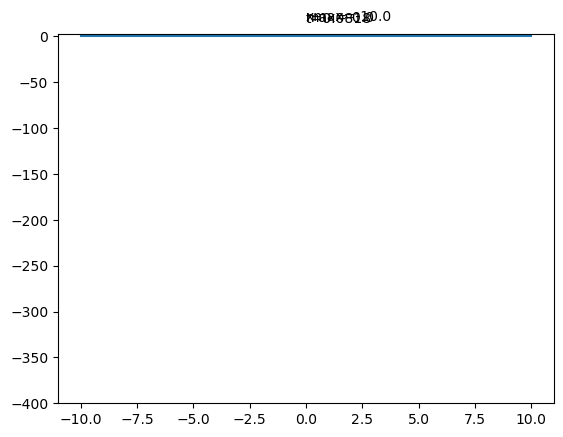

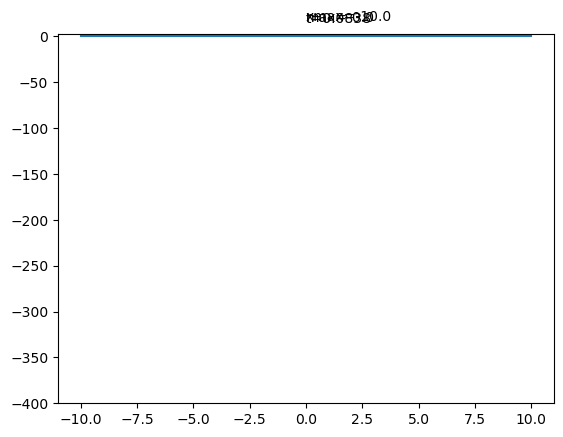

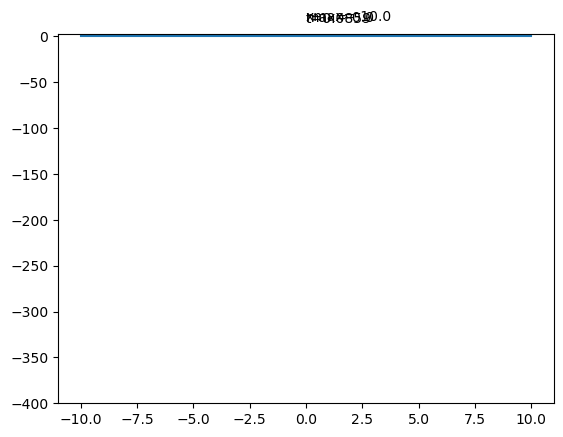

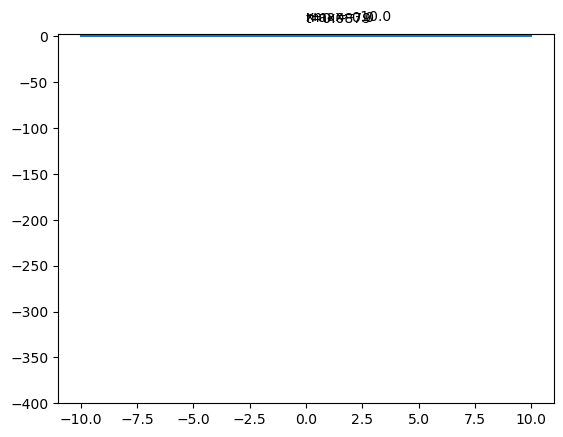

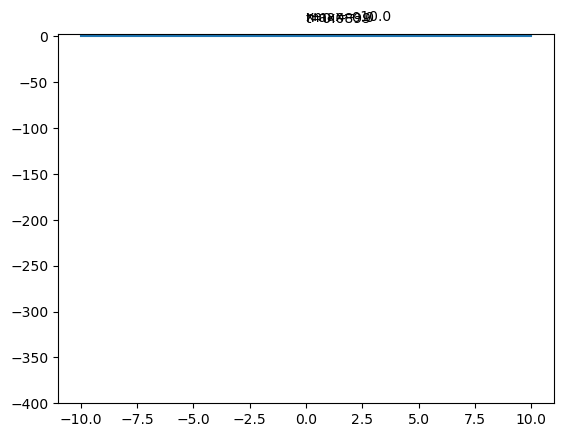

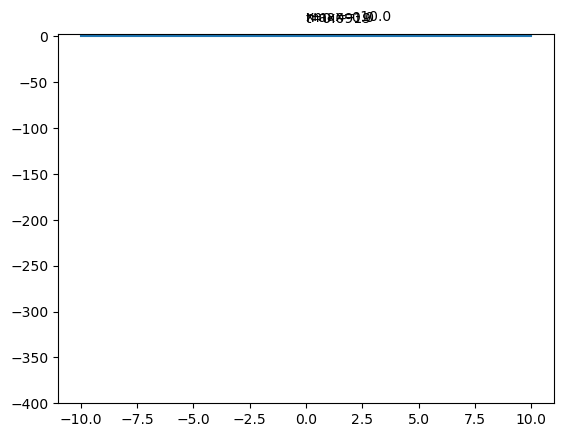

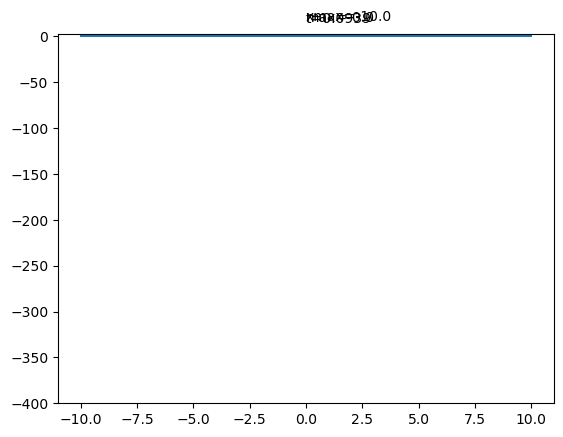

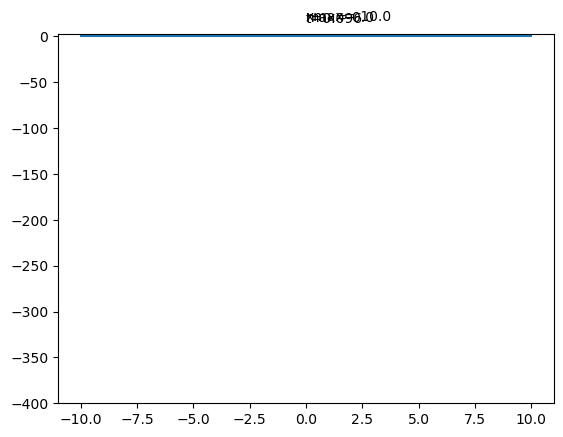

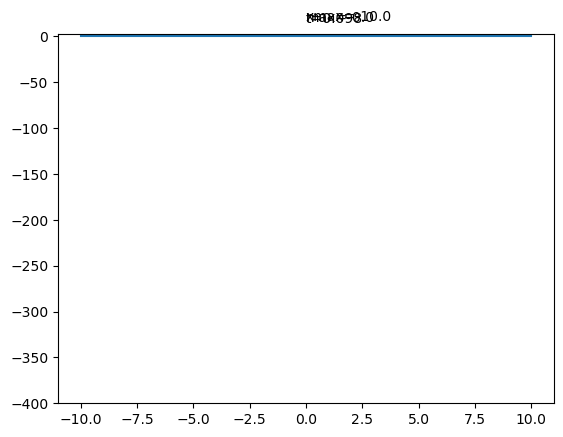

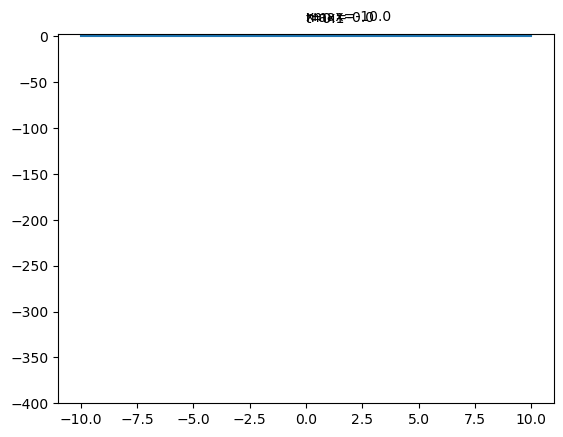

In [52]:
kappa1 = -17; gamma1 = -7;
kappa2 = -21; gamma2 = -9;

tarr = np.linspace(-0.1, 0.1, 100)

umaxarr = []
xmaxarr = []


Nx = 1000
xarr = np.linspace(-10, 10, Nx)
uarr = np.zeros(Nx)

for t in tarr:
    j = 0
    for x in xarr:
        matrix_size = 2

        Mat = np.zeros((2,3), dtype=float)

        theta1 = np.real(2j*theta(x, t, 1j*kappa1))
        if ( theta1 <= 0):
            exp1 = np.exp(theta1)
            Mat[0][0] = 1 + exp1 * gamma1**2 / (2*kappa1)
            Mat[0][1] = exp1 * gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2 * exp1
        else:
            exp1 = np.exp(-theta1)
            Mat[0][0] = exp1 + gamma1**2 / (2*kappa1)
            Mat[0][1] = gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2

        theta2 = np.real(2j*theta(x, t, 1j*kappa2))
        if (theta2 <= 0):
            exp2 = np.exp(theta2)
            Mat[1][0] = exp2 * gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = 1 + exp2 * gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2 * exp2
        else:
            exp2 = np.exp(-theta2)
            Mat[1][0] = gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = exp2 + gamma2**2 / (2*kappa2)
            Mat[1][2] = gamma2**2
    
        alphas = np.linalg.solve(Mat[:, :2], Mat[:, 2])
        alphas

        u = 4 * (alphas[0] * kappa1 + alphas[1] * kappa2) - 2 * (alphas[0] + alphas[1])**2
        uarr[j] = u
        j += 1
    plt.plot(xarr, uarr)    
    plt.ylim((-400, 3))
    plt.text(0, 15, "t={:.3}".format(t))
    plt.text(0, 16, "max={:.3}".format(np.max(uarr)))
    plt.text(0, 17, "xmax={:.3}".format(xarr[np.argmax(uarr)]))
    plt.show()
